# Introduction



##### For any questions or inquiry, please email the authors: 

Floor Broekgaarden: fsbroekgaarden@gmail.com


### set path to directory 
full path to the directory with all data files   


In [5]:
# change this to your path with the data directory
path_to_file = '/Users/floorbroekgaarden/Projects/GitHub/Rates_of_Formation_Channels/plottingCode/Fig_comparison/Data_formation_channels_intrinsic/'

### import libraries
the following lines import the `common_code` files that contains some global code / settings that are used throughout this jupyter notebook <br>
if for some reason the python script is not working, or not importing, one can copy paste the code in the script and run it in a cell above/below this block  <br>
Not all codes / libraries loaded are strictly needed. <br>


In [3]:
import sys
# import common_code/PostProcessingScripts which contains default python code used in this jupyter notebook (such as plotting etc.)
sys.path.append('/Users/floorbroekgaarden/Projects/GitHub/common_code/.')
from PostProcessingScripts import * 

# just to make the cells appear wider: comment these lines if needed. 
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


import pandas as pd
import seaborn as sns # only used for nice colors



In [4]:


def obtain_channels_list(complete_path='complete/path/to/data.csv'):
    """ returns list with channel column headers """
    df = pd.read_csv(complete_path)
    return df.columns.values[1:-1] # -1 because the last column is total rates. 


def obtain_total_header(complete_path='complete/path/to/data.csv'):
    """ returns column header for total """
    df = pd.read_csv(complete_path)
    return df.columns.values[-1] # -1 because the last column is total rates.     


def obtain_formation_channel_colors():
    channel_color_names = ['channel I intrinsic (z=0) classic', 'channel II intrinsic (z=0) OSMT', 'channel III intrinsic (z=0) SCCE',  'channel IV intrinsic (z=0) DCCE', 'channel V intrinsic (z=0) other']
    channel_colors = ['#118AB2',  'orange', '#EF476F','#073B4C',  'gray'] #['#118AB2',  '#FFD166', '#EF476F','#073B4C',  'gray']
    fc_color_dict = {channel_color_names[i]: channel_colors[i] for i in range(len(channel_color_names))}
    
    return fc_color_dict


def draw_hlines(axe, v_values, list_h_values=[1E-3, 1E5]):
    """ draws lightgray custom vertical grid lines at values in the v_values list 
    these are drawn between the horizontal values given by list_h_values
    """
    for v_ in v_values:
        axe.plot(list_h_values, [v_, v_], lw=0.5, c='gray', ls=':', zorder=0)
        
    return 


def plot_observed_GWrate(axe, DCOlabel='BH-BH', lenmodels=10):
    # plot observed rates (make this a better function )
    dict_rates_from_DCOlabel = {"BH-BH":[10.3, 61.0], "BH-NS":[8,  140.0], "NS-NS":[10.0, 1700.0]}
    # NSNS rates Gpc-3 yr-1 from:GWTC3 min & max rates 
    # BHBH rates for minimum and maximum of possible local merger rates estimates,  and https://ui.adsabs.harvard.edu/abs/2021arXiv210801045T/abstract
    # BHNS rate min and max range from the two estimates based on GW200115 and GW200105!! (OLD) ! 
    
    min_obs_rate, max_obs_rate = dict_rates_from_DCOlabel[DCOlabel][0], dict_rates_from_DCOlabel[DCOlabel][1]
    axe.fill_betweenx(y=[-1, lenmodels], x1=[min_obs_rate,min_obs_rate], x2=[max_obs_rate,max_obs_rate], alpha=0.8, color='lightgray', zorder=1)
        

    return


def plot_formation_channels_fraction(axe, complete_path='complete/path/to/data.csv', sort_column=None):
    """   
    
    """

    channel_headers = obtain_channels_list(complete_path=complete_path)
    total_header = obtain_total_header(complete_path=complete_path)
    
    fc_color_dict = obtain_formation_channel_colors() # obtain formation channel colors 
    if sort_column==None: sort_column=channel_headers[0] # if not specified, sort by Classic channel
    
    df = pd.read_csv(complete_path)
    df = df.sort_values(sort_column).reset_index(drop=True)  # can use df = df.sort_values([sort_column, sort_column2]) if needed to sort by second column 
    #.reset_index(drop=True) resets the index, so that index = 0 is the first element in the sorted list (not original list)
    
    
    models = df['model'] # models that are available 
    plot_size_normalizer = 1 # change to be related to figure size and number of models to keep figure consistent size

    for ind_m, model in enumerate(models):
        total_rate, fc_fraction_low, fc_fraction_up = df[total_header][ind_m], 0, 0
        for ind_c, channel in enumerate(channel_headers):
            color_c = fc_color_dict[channel]
            fc_fraction_up += df[channel].values[ind_m] 
            y_value        = ind_m / plot_size_normalizer # 
            
            axe.plot([fc_fraction_low, fc_fraction_up], [y_value,y_value], lw=10, color=color_c, zorder=5) #, marker='o') 
            fc_fraction_low += df[channel].values[ind_m]
    
    axe.set_ylim(-1, len(models)+0.25)
    axe.set_xlim(0, 1)
    axe.set_xticks(np.arange(0,1+0.1, 0.1))
    layoutAxesNoYlabel(ax=axe, nameX=r'$\textbf{fraction}$', nameY=False, noYticks=True, setMinor=False)
    
    axe.grid(True)
    
    return axe


def plot_total_rate(axe, complete_path='complete/path/to/data.csv', sort_column=None, DCOlabel='BH-BH'):
    """ plots total rates on provided axe plot 
    """


    channel_headers = obtain_channels_list(complete_path=complete_path)
    total_header = obtain_total_header(complete_path=complete_path)
    
    fc_color_dict = obtain_formation_channel_colors() # obtain formation channel colors 
    if sort_column==None: sort_column=channel_headers[0] # if not specified, sort by Classic channel
    
    df = pd.read_csv(complete_path)
    df = df.sort_values(sort_column).reset_index(drop=True)  # can use df = df.sort_values([sort_column, sort_column2]) if needed to sort by second column 
    #.reset_index(drop=True) resets the index, so that index = 0 is the first element in the sorted list (not original list)
    
    models = df['model'] # models that are available     
    plot_size_normalizer = 1 # change to be related to figure size and number of models to keep figure consistent size
    
    for ind_m, model in enumerate(models):
        
        total_rate = df[total_header][ind_m]
        y_value        = ind_m / plot_size_normalizer # 
        axe.scatter(total_rate, y_value, s=60, color=['k'], zorder=10, marker='d') 

        draw_hlines(axe=axe, v_values=[y_value]) # add custom grid lines
    
    axe.set_ylim(-1, len(models)+0.25)
    xlabel = r'$\mathcal{R}_{\rm{m}} \ [ \rm{Gpc}^{-3} \rm{yr}^{-1} ] $' #\rm{Gpc}^{-3}\,\rm{yr}^{-1}
    layoutAxesNoYlabel(ax=axe, nameX=xlabel, nameY=False, noYticks=True) #, fontsize=20)
    
    axe.set_xscale('log')
    dictDCOlabel_xlim = {"BH-BH":[2, 500], "BH-NS":[0.2,400], "NS-NS":[0.5, 2*1E3]} # limits for the x-axis range for each DCO type 
    axe.set_xlim(dictDCOlabel_xlim[DCOlabel][0], dictDCOlabel_xlim[DCOlabel][1])
    
    ## add observed merger rates
    lenmodels = len(models)+0.25
    plot_observed_GWrate(axe, DCOlabel, lenmodels)
    

    return axe




def plot_formation_channels_rate(axe, complete_path='complete/path/to/data.csv', sort_column=None): #, ind_channels=[0,1, 2, 3]):


    channel_headers = obtain_channels_list(complete_path=complete_path) 
    total_header = obtain_total_header(complete_path=complete_path)
    
    fc_color_dict = obtain_formation_channel_colors() # obtain formation channel colors 
    
    if sort_column==None: sort_column=channel_headers[0] # if not specified, sort by Classic channel
    
    
    df = pd.read_csv(complete_path)
    df = df.sort_values(sort_column).reset_index(drop=True)  # can use df = df.sort_values([sort_column, sort_column2]) if needed to sort by second column 
    #.reset_index(drop=True) resets the index, so that index = 0 is the first element in the sorted list (not original list)
    
    models = df['model'] # models that are available 
    plot_size_normalizer = 1 # change to be related to figure size and number of models to keep figure consistent size
    for ind_m, model in enumerate(models):
        total_rate = df[total_header][ind_m]
        for ind_c, channel in enumerate(channel_headers):
            color_c = fc_color_dict[channel]
            y_value        = ind_m / plot_size_normalizer # 
            channel_rate = df[channel].values[ind_m]*total_rate
            
            axe.scatter(channel_rate, y_value, s=50, color=[color_c], zorder=5, marker='s', facecolor='none') 
    
    return axe





def plot_simulation_properties(axe, specs_path='complete/path/to/simulation_specs.csv', complete_path='complete/path/to/simulation_specs.csv', sort_column=None):

    channel_headers = obtain_channels_list(complete_path=complete_path) 
    
    
    
    
    if sort_column==None: sort_column=channel_headers[0] # if not specified, sort by Classic channel
    df_rates = pd.read_csv(complete_path) # path with the rates 
    df_rates = df_rates.sort_values(sort_column)  # can use df = df.sort_values([sort_column, sort_column2]) if needed to sort by second column 
    
    # read in model specifications and order it the same way as the rate models (based on sort_column)
    df = pd.read_csv(specs_path)
    df = df.set_index('model')
    df = df.reindex(index=df_rates['model'])
    df = df.reset_index()
    
    models = df['model'] # models that are available 
    plot_size_normalizer = 1 # change in the future to be related to figure size and number of models to keep figure consistent size
    author_dict, code_dict, tracks_dict, labeli_dict, labelii_dict = obtain_models_colors(specs_path, "label_author", "husl"), obtain_models_colors(specs_path, "code", "husl"), obtain_models_colors(specs_path, "stellar_tracks", "husl"),\
    obtain_models_colors(specs_path, "label_1", "husl"), obtain_models_colors(specs_path, "label_1", "husl") # colors for label 1 are the same as label 2 
    
    
    xpositions = 0.02 + np.asarray([-0.2, 0, 0.3, 0.51, 0.8]) #, 0.75])
    for ind_m, model in enumerate(models[:]):
#         
        specs_labels = [df["label_author"][ind_m], df["code"][ind_m], df["stellar_tracks"][ind_m], df["label_1"][ind_m] , df["label_2"][ind_m]]
        colors_ = [author_dict[df["label_author"][ind_m]], code_dict[df["code"][ind_m]], tracks_dict[df["stellar_tracks"][ind_m]], labeli_dict[df["label_1"][ind_m]] , labelii_dict[df["label_2"][ind_m]]] # 
        y_value        = ind_m / plot_size_normalizer # 
        
        
        for ind_xpos, xpos in enumerate(xpositions):
            text = r'\textbf{%s}'%specs_labels[ind_xpos]
            axe.text(xpos, y_value, s=text, ha='left', va='center', fontsize=9, fontproperties='bold', color=colors_[ind_xpos])
    
    
    
    # add headers to the specs
    labels = [r'$\textbf{name}$', r'$\textbf{code}$', r'$\textbf{tracks}$', r'$\textbf{var1}$', r'$\textbf{var2}$']
    for ind_xpos, xpos in enumerate(xpositions):
        
        axe.text(xpos, y_value+1.2, s=labels[ind_xpos], ha='left', va='top', fontsize=12)
    
    axe.set_ylim((-1, len(models)+0.25))
    axe.set_xlim(0, 1)
#     layoutAxesNoXandYlabel(ax=axe, nameX=r'$\textbf{fraction rate}$', nameY=False, noYticks=True)
    axe.axis('off')
    return axe



def obtain_models_colors(path_to_data='complete/path/to/simulation_specs.csv', color_key="code_abbr", cmap="husl"):
    """ creates a colormap for set of provided parameters using given cmap
    
    path_to_data: path to csv file with the data that we want to use as keys
    color_key: header name of the values we want to use as keys
    cmap: colormap used 

    """
    
    data = pd.read_csv(path_to_data)[color_key].values 
    
    # if interested in the model labels, combine the two model labels to make them consistent
    if color_key == "label_1":
        data2 = pd.read_csv(path_to_data)["label_2"].values 
        data = np.concatenate((data, data2))
        del data2
        
    data = [str(data[i]) for i in range(len(data))] # to deal with nan and np.unique make everything a string. 
    models = np.unique(data) # get unique items, these will be assigned their own color. 
    colors =  sns.color_palette(cmap, len(models)) #make a color map 
    
    return dict(zip(models, colors))




### Run code to create plot
Below is the code that calls all the functions to create the formation channel overview for a given double compact object type `DCOlabel` choice from 'BH-BH', 'BH-NS' or 'NS-NS'



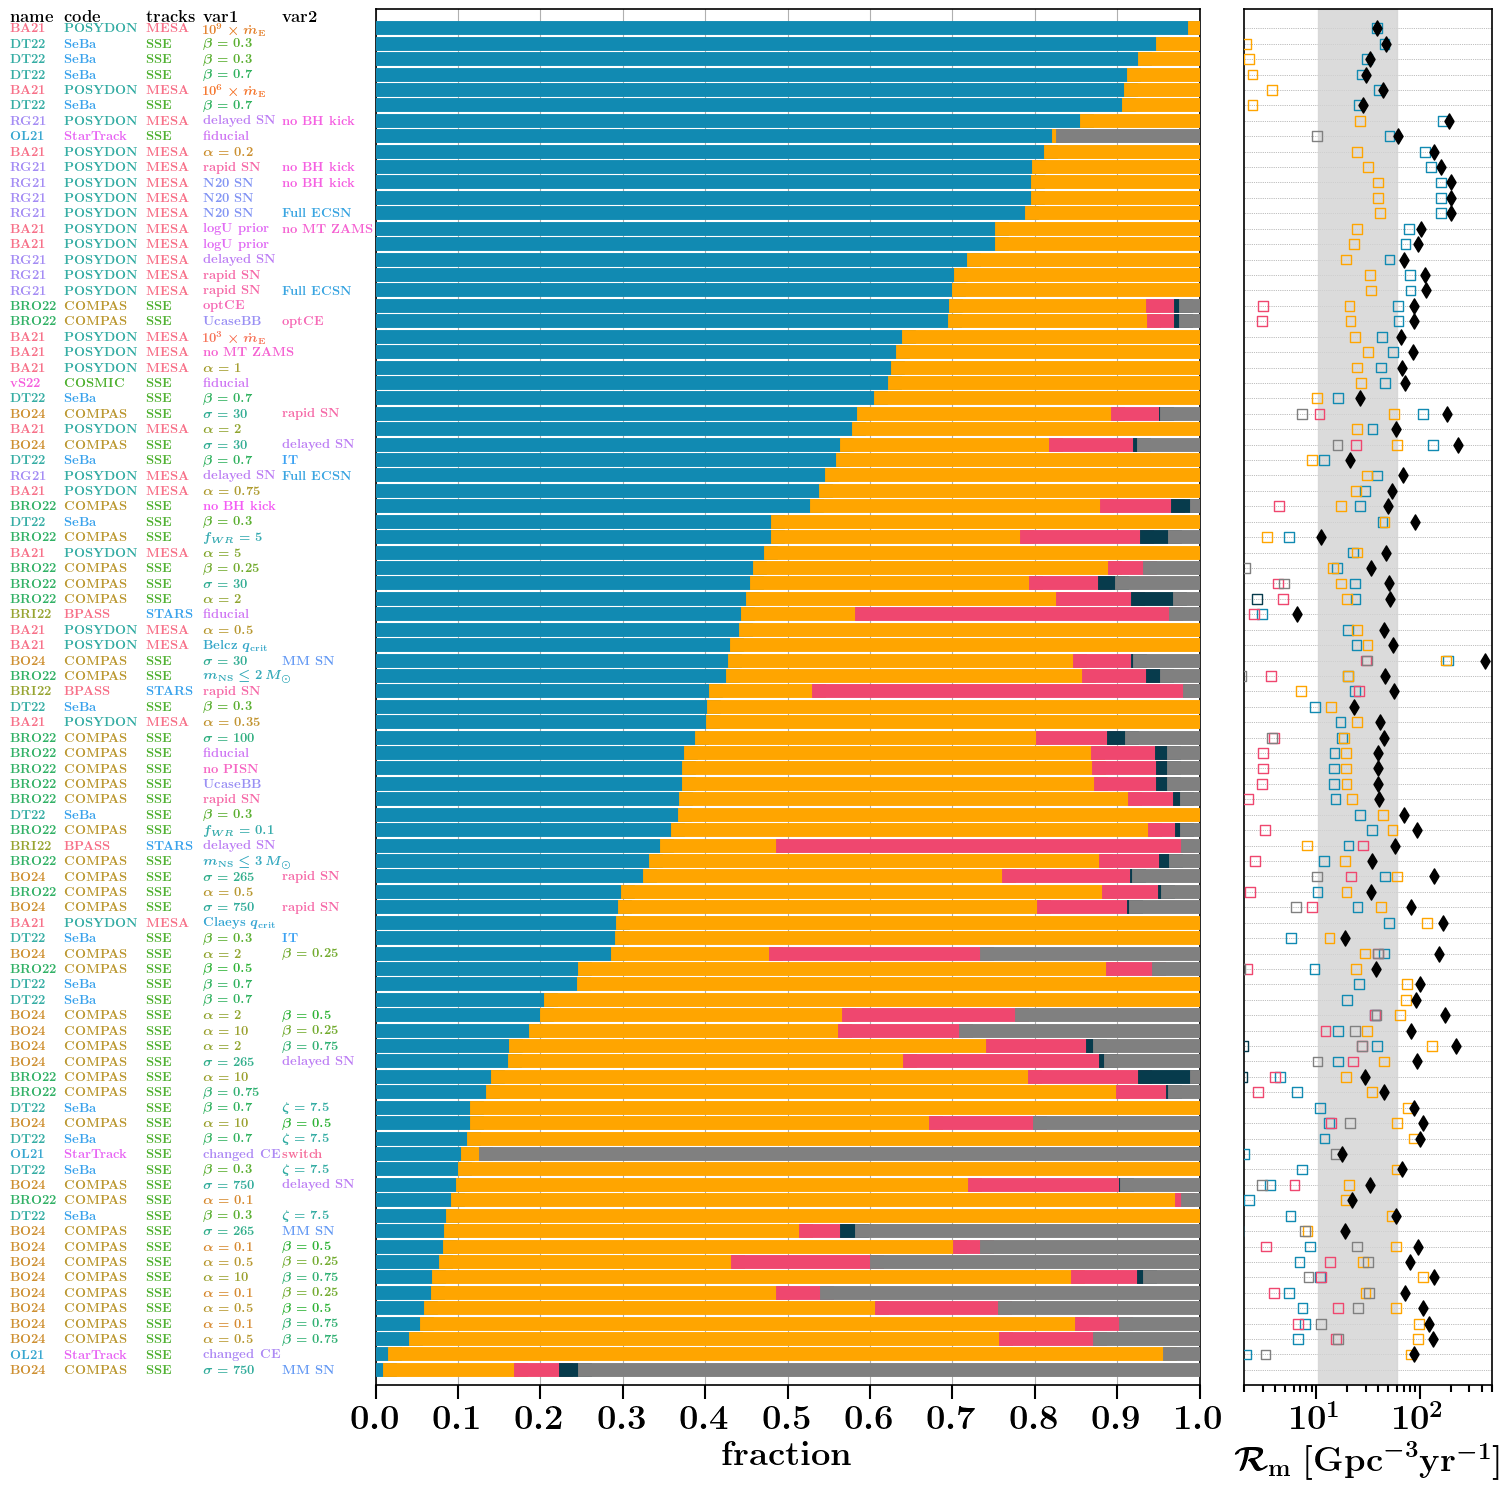

In [6]:

DCOlabel = 'BH-BH'
ordered = 'max'
file_name = DCOlabel + '_rates_review.csv'


# complete_path = path_to_file + file_name
specs_path = path_to_file + 'simulation_specs.csv'
csv_path = path_to_file + file_name

d1,d2 = 15,15 # overwrite 
w_small = 0.3
ncols, nrows = 3, 1
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(d1,d2), gridspec_kw={"width_ratios":[w_small*1.1, 1, w_small], "height_ratios":[1]})  



axe[0] = plot_simulation_properties(axe=axe[0], specs_path=specs_path, complete_path=csv_path) # plot the simulation specifics 
axe[1] = plot_formation_channels_fraction(axe=axe[1], complete_path=csv_path)
axe[2] = plot_total_rate(axe=axe[2], complete_path=csv_path, DCOlabel=DCOlabel)
axe[2] = plot_formation_channels_rate(axe=axe[2], complete_path=csv_path)

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.0)  
plt.savefig('./FormationRates_' +DCOlabel+ '_' + ordered + 'sorted' + '.png', dpi=300, transparent=False)#,\
plt.savefig('./FormationRates_' +DCOlabel+ '_' + ordered + 'sorted' + '.pdf')#,\
plt.show()




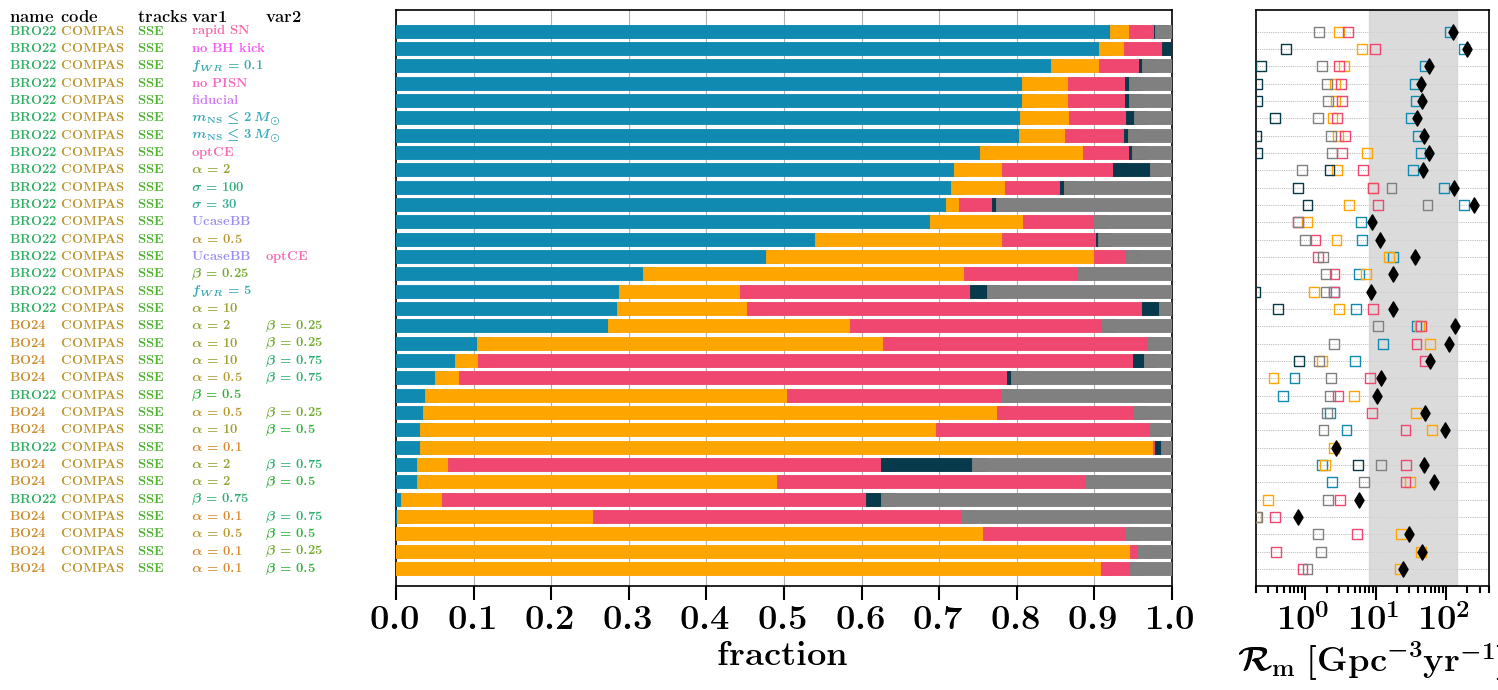

In [7]:

DCOlabel = 'BH-NS'
ordered = 'max'
file_name = DCOlabel + '_rates_review.csv'
path_to_file = '/Users/floorbroekgaarden/Projects/GitHub/Rates_of_Formation_Channels/plottingCode/Fig_comparison/Data_formation_channels_intrinsic/'

# complete_path = path_to_file + file_name
specs_path = path_to_file + 'simulation_specs.csv'
csv_path = path_to_file + file_name

d1,d2 = 15,7 # overwrite 
w_small = 0.3
ncols, nrows = 3, 1
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(d1,d2), gridspec_kw={"width_ratios":[w_small*1.1, 1, w_small], "height_ratios":[1]})  



axe[0] = plot_simulation_properties(axe=axe[0], specs_path=specs_path, complete_path=csv_path) # plot the simulation specifics 
axe[1] = plot_formation_channels_fraction(axe=axe[1], complete_path=csv_path)
axe[2] = plot_total_rate(axe=axe[2], complete_path=csv_path, DCOlabel=DCOlabel)
axe[2] = plot_formation_channels_rate(axe=axe[2], complete_path=csv_path)

plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.0)  
plt.savefig('./FormationRates_' +DCOlabel+ '_' + ordered + 'sorted' + '.png', dpi=300, transparent=False)#,\
plt.savefig('./FormationRates_' +DCOlabel+ '_' + ordered + 'sorted' + '.pdf')#,\
plt.show()


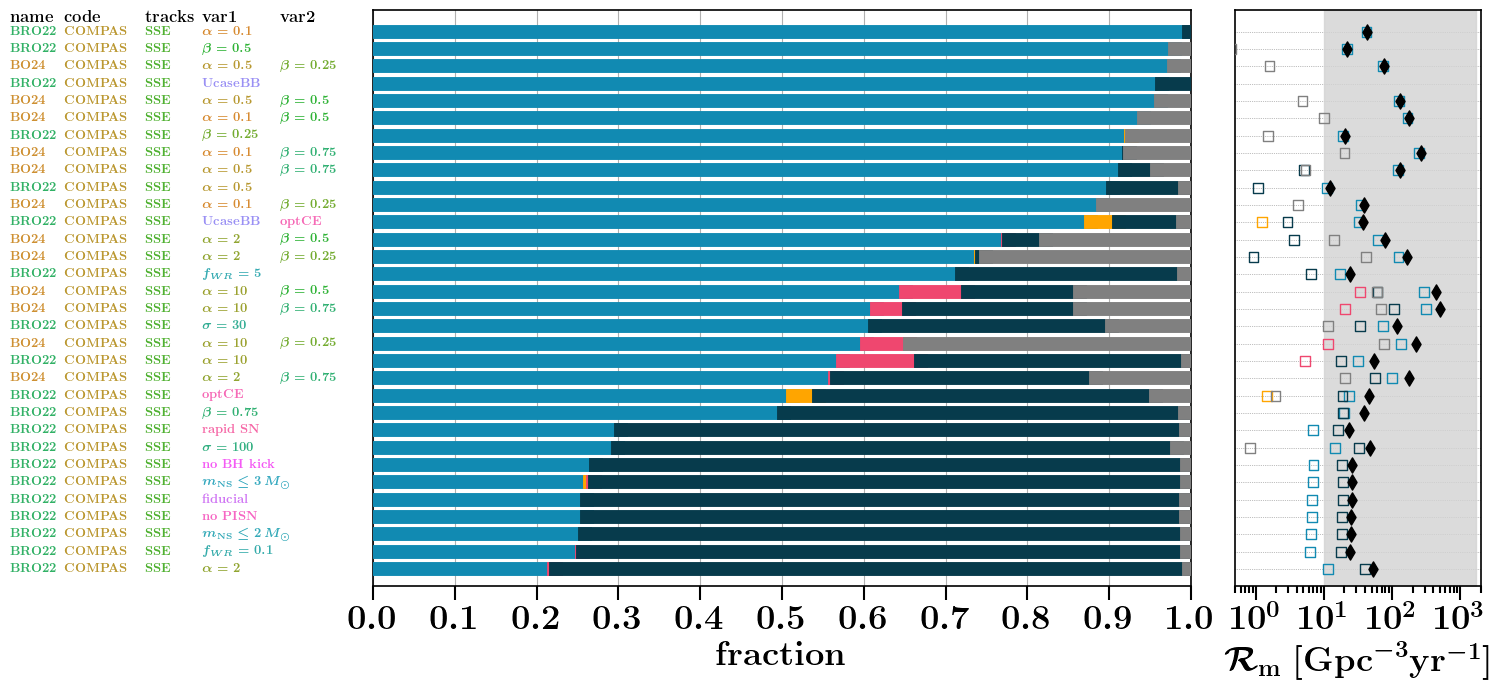

In [8]:

DCOlabel = 'NS-NS'
ordered = 'max'
file_name = DCOlabel + '_rates_review.csv'
path_to_file = '/Users/floorbroekgaarden/Projects/GitHub/Rates_of_Formation_Channels/plottingCode/Fig_comparison/Data_formation_channels_intrinsic/'

# complete_path = path_to_file + file_name
specs_path = path_to_file + 'simulation_specs.csv'
csv_path = path_to_file + file_name

d1,d2 = 15,7 # overwrite 
w_small = 0.3
ncols, nrows = 3, 1
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(d1,d2), gridspec_kw={"width_ratios":[w_small*1.1, 1, w_small], "height_ratios":[1]})  



axe[0] = plot_simulation_properties(axe=axe[0], specs_path=specs_path, complete_path=csv_path) # plot the simulation specifics 
axe[1] = plot_formation_channels_fraction(axe=axe[1], complete_path=csv_path)
axe[2] = plot_total_rate(axe=axe[2], complete_path=csv_path, DCOlabel=DCOlabel)
axe[2] = plot_formation_channels_rate(axe=axe[2], complete_path=csv_path)

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.0)  
plt.savefig('./FormationRates_' +DCOlabel+ '_' + ordered + 'sorted' + '.png', dpi=300, transparent=False)#,\
plt.savefig('./FormationRates_' +DCOlabel+ '_' + ordered + 'sorted' + '.pdf')#,\
plt.show()


In [142]:
def plot_legends(axe, csv_base='path/to/csv/files/',  parameters_list=['alpha'], headers_ind_to_plot='channel I intrinsic (z=0) classic', plot_rate=False, DCOtype='BH-BH'):
    #channel_color_names = ['channel I intrinsic (z=0) classic', 'channel II intrinsic (z=0) OSMT', 'channel III intrinsic (z=0) SCCE',  'channel IV intrinsic (z=0) DCCE', 'channel V intrinsic (z=0) other']

    path_to_fc_relationships_file = csv_base + DCOtype + '_fcRelations.csv'
    complete_path_to_fc_rates = csv_base + DCOtype + '_rates_review.csv'
    channel_headers_list_plotting=[headers_ind_to_plot]    

    df_rel = pd.read_csv(path_to_fc_relationships_file, header=0) #skiprows=[0,1,2,3,4,6,7], usecols=[2*i for i in range(10)])
    n_relations = df_rel['from_modelname'].size
    
    # for setting colors 
    color_codes = np.unique(df_rel['color code'])
    linecolors  = sns.color_palette("hls", len(color_codes))
    rel_colors_library = dict(zip(color_codes, linecolors))
    
    # for a legend:
    legend_label = df_rel['legend']
    

    if parameters_list==False:

        # add a legend 
        legend_label = df_rel['legend'].values
        dict_legend = {}
        for i, x in enumerate(legend_label):
            if x not in dict_legend:
                dict_legend[x] = i

        unique_legends = np.unique(legend_label)

        for ind_y, labels in enumerate(np.unique(unique_legends)):
            ind_l, y_pos = dict_legend[labels], (ind_y * 0.4) +0.05 # vertical location of the legend labels  
            color_l = rel_colors_library[df_rel['color code'].values[ind_l]]
            axe.annotate(r'$\textbf{%s}$'%labels, xy=(0.05, y_pos), xycoords='axes fraction', fontsize = fs-12, ha='left', va="bottom", zorder=100, color=color_l) 

            
    elif parameters_list!=False:
        for param in (parameters_list):

            mask_param = df_rel['using'] == param  # mask the relationships that are related to the user specified parameter
            
            # add a legend 
            legend_label = df_rel['legend'][mask_param].values
            dict_legend = {}
            for i, x in enumerate(legend_label):
                if x not in dict_legend:
                    dict_legend[x] = i

            unique_legends = np.unique(legend_label)

            for ind_y, labels in enumerate(np.unique(unique_legends)):
                ind_l, y_pos = dict_legend[labels], (ind_y * 0.4) +0.05 # vertical location of the legend labels  
                color_l = rel_colors_library[df_rel['color code'][mask_param].values[ind_l]]
                axe.annotate(r'$\textbf{%s}$'%labels, xy=(0.05, y_pos), xycoords='axes fraction', fontsize = fs-12, ha='left', va="bottom", zorder=100, color=color_l)             
            
            
    axe.axis('off') # do not show the axes for the last empty panel 

    return
    
    
    


In [89]:
def plot_relations(axe, csv_base='path/to/csv/files/',  parameters_list=['alpha'], headers_ind_to_plot='channel I intrinsic (z=0) classic', plot_rate=False, DCOtype='BH-BH'):
    #channel_color_names = ['channel I intrinsic (z=0) classic', 'channel II intrinsic (z=0) OSMT', 'channel III intrinsic (z=0) SCCE',  'channel IV intrinsic (z=0) DCCE', 'channel V intrinsic (z=0) other']

    path_to_fc_relationships_file = csv_base + DCOtype + '_fcRelations.csv'
    complete_path_to_fc_rates = csv_base + DCOtype + '_rates_review.csv'
    channel_headers_list_plotting=[headers_ind_to_plot]    
#     legend 
    
    
    df_rel = pd.read_csv(path_to_fc_relationships_file, header=0) #skiprows=[0,1,2,3,4,6,7], usecols=[2*i for i in range(10)])
    n_relations = df_rel['from_modelname'].size
    
    # for setting colors 
    color_codes = np.unique(df_rel['color code'])
    linecolors =  sns.color_palette("hls", len(color_codes))
    rel_colors_library = dict(zip(color_codes, linecolors))
    
    # for a legend:
    legend_label = df_rel['legend']
    
    df_rate = pd.read_csv(complete_path_to_fc_rates)
    
    total_header = obtain_total_header(complete_path=complete_path_to_fc_rates) # header for the total rates 
    
    
    for param in (parameters_list):
        print('plotting parameter', param)
        mask_param = df_rel['using'] == param  # mask the relationships that are related to the user specified parameter
        
        
        for ind_rel in range(df_rel['from_modelname'][mask_param].size): # loop through all relationships with this parameter
            if param in ['fryer']: # parameters that are not floats 
                paramvalue_start, paramvalue_end = (df_rel['from_option'][mask_param].values[ind_rel]), (df_rel['to_option'][mask_param].values[ind_rel]) # values of the parameter in relationship
            else:
                paramvalue_start, paramvalue_end = float(df_rel['from_option'][mask_param].values[ind_rel]), float(df_rel['to_option'][mask_param].values[ind_rel]) # values of the parameter in relationship
            modelname_start, modelname_end = df_rel['from_modelname'][mask_param].values[ind_rel], df_rel['to_modelname'][mask_param].values[ind_rel]  # model ID name for relationship 
            color_rel = rel_colors_library[df_rel['color code'][mask_param].values[ind_rel]]
            
            for ind_c, channel in enumerate(channel_headers_list_plotting):
                fcfraction_start, fcfraction_end = df_rate[channel][df_rate["model"].values == modelname_start], df_rate[channel][df_rate["model"].values == modelname_end]
                if plot_rate==True:
                    total_rate_start, total_rate_end = df_rate[total_header][df_rate["model"].values == modelname_start], df_rate[total_header][df_rate["model"].values == modelname_end]
                    fcfraction_start, fcfraction_end = fcfraction_start*total_rate_start, fcfraction_end*total_rate_end
                axe.scatter([paramvalue_start, paramvalue_end], [fcfraction_start, fcfraction_end], s=60, color=[color_rel], zorder=6, marker='o') 
                axe.plot(   [paramvalue_start, paramvalue_end], [fcfraction_start, fcfraction_end], lw=3, color=color_rel  , zorder=5)
                
#         # add a legend 
#         legend_label = df_rel['legend'][mask_param].values
#         dict_legend = {}
#         for i, x in enumerate(legend_label):
#             if x not in dict_legend:
#                 dict_legend[x] = i
        
#         unique_legends = np.unique(legend_label)
        
#         for ind_y, labels in enumerate(np.unique(unique_legends)):
#             ind_l, y_pos = dict_legend[labels], ind_y * 0.2
#             color_l = 'k' # =  rel_colors_library[df_rel['color code'][mask_param].values[ind_l]
#             axe.annotate(r'$\textbf{%s}$'%labels, xy=(0.1, y_pos), xycoords='axes fraction', fontsize = fs-12, ha='left', va="top", zorder=100) #, color=channelColorDict['stable B no CEE'])

        
    return
    
    
    


In [90]:
def make_up_axes_param(axe, param_list, plot_rate=False):
    if plot_rate==False: ylabel = r'$\textbf{fraction rate}$'
    else: ylabel = r'$\mathcal{R}_{\rm{m}} \ [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
    
    
    if param_list[0]=='alpha':
        layoutAxesNoYlabel(ax=axe, nameX=r'$\alpha$', nameY=ylabel, noYticks=False)
        axe.set_xscale('log')
        axe.tick_params(labelleft=False)
    elif param_list[0]=='beta':
        axe.set_xlim(0.2,0.8)
        layoutAxes(ax=axe, nameX=r'$\beta$', nameY=ylabel)
    elif param_list[0]=='gamma':
        layoutAxes(ax=axe, nameX=r'$\gamma$', nameY=ylabel)
        axe.tick_params(labelleft=False)
    elif param_list[0]=='fryer':
        layoutAxesNoYlabel(ax=axe, nameX=r'$\textbf{remnant mass prescription}$', nameY=ylabel, noXticks=True, setMinor=False)
        axe.tick_params(labelleft=False)
        label_names=[r'$\textbf{delayed}$', r'$\textbf{rapid}$']
        axe.set_xticks(range(len(label_names)))
        axe.set_xticklabels(label_names, fontsize=fs-6, rotation=0)
        axe.yaxis.set_minor_locator(AutoMinorLocator())
     
    
    
    if plot_rate==False: # plotting fc fraction
        axe.set_ylim(0,1)    
    else:
        axe.set_yscale('log')
        axe.set_ylim(2E0,3E2)
        
    axe.grid(True)   
        
    return

In [91]:
def plot_parameter_comparisons(axe, plot_rate=False, headers_ind_to_plot=0, csv_base='path/to/csv/files/', DCOtype='BH-BH'):
    

    
    for axe_ind, param_ in enumerate(['beta', 'alpha', 'fryer']):
    
        plot_relations(axe=axe[1,axe_ind], csv_base=csv_base, parameters_list=[param_], plot_rate=plot_rate, headers_ind_to_plot=headers_ind_to_plot, DCOtype=DCOtype)
        
        make_up_axes_param(axe=axe[1,axe_ind], param_list=[param_], plot_rate=plot_rate)
        
        plot_legends(axe=axe[0,axe_ind], csv_base=csv_base, parameters_list=[param_], plot_rate=plot_rate,  DCOtype=DCOtype)

    
    return
    
    
def plot_parameter_plots(channel_label, headers_ind_to_plot, csv_base, DCOtype):

    
    fraction_labels = ['fraction', 'rate']
    for ind_plot, plot_rate in enumerate([False, True]):
        fraction_label = fraction_labels[ind_plot]
        
    
        d1,d2, w_small = 18,6, 1 # overwrite 
        ncols, nrows = 3, 2
        f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(d1,d2), gridspec_kw={"width_ratios":[w_small]*ncols, "height_ratios":[0.1, 1]}) 

        # main function 
        plot_parameter_comparisons(axe=axe, plot_rate=plot_rate, csv_base=csv_base, headers_ind_to_plot=headers_ind_to_plot, DCOtype=DCOtype) # classic channel

        plt.tight_layout()
        plt.subplots_adjust(hspace=0.)
#         plt.savefig('./Parameter_impact_FC_'+fraction_label + '_' +channel_label + '.png', dpi=300, transparent=False)#,\
        plt.savefig('./Parameter_impact_FC_'+fraction_label + '_' +channel_label + DCOtype+ '.pdf')#,\

    return


    


plotting parameter beta
plotting parameter alpha
plotting parameter fryer
plotting parameter beta
plotting parameter alpha
plotting parameter fryer
-----
plotting parameter beta
plotting parameter alpha
plotting parameter fryer
plotting parameter beta
plotting parameter alpha
plotting parameter fryer


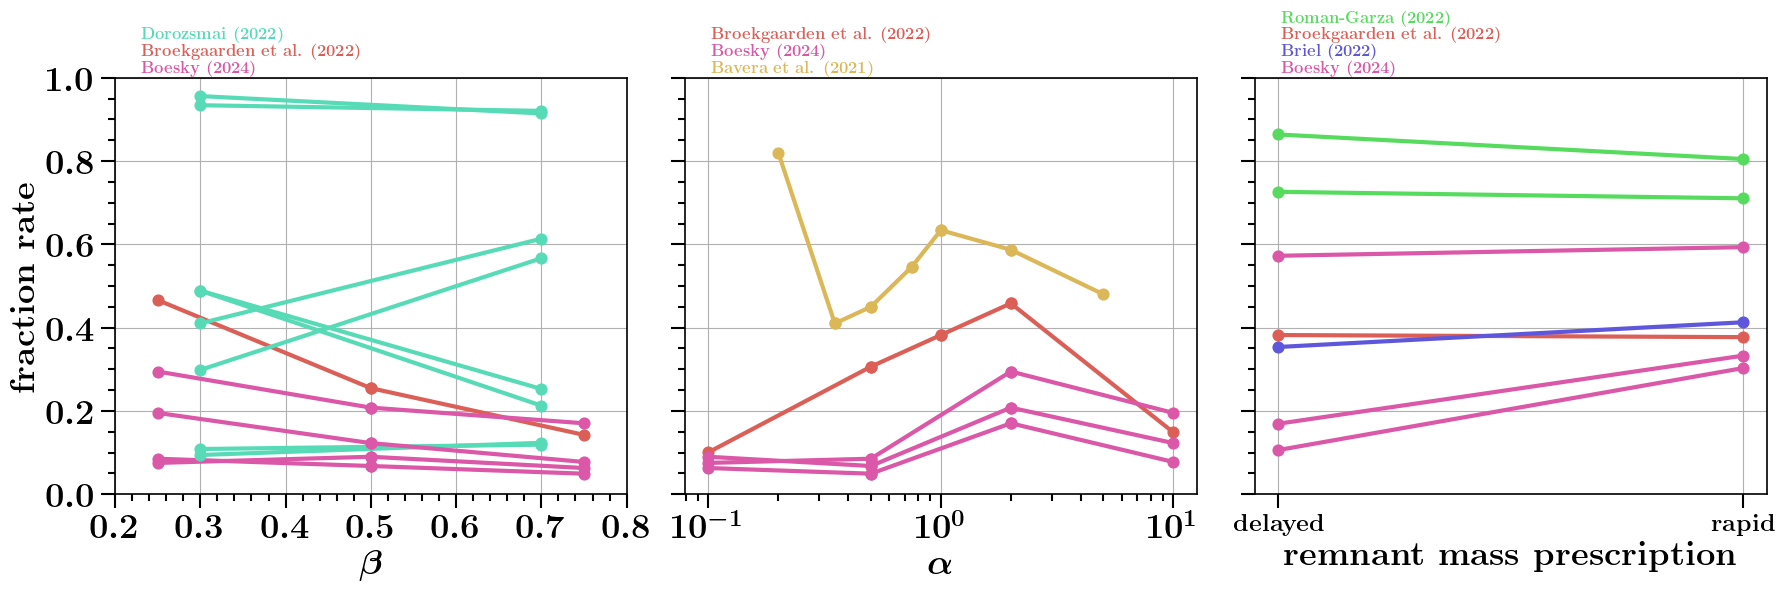

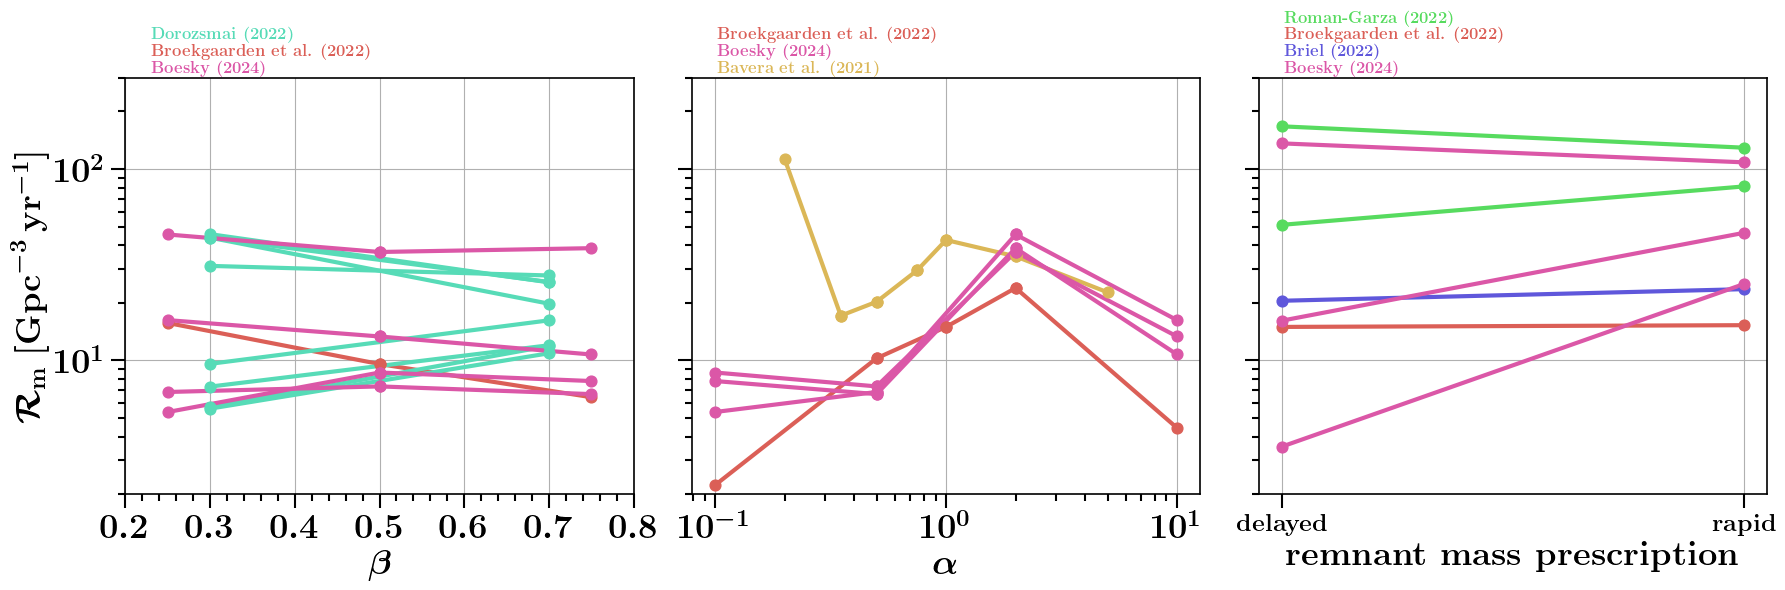

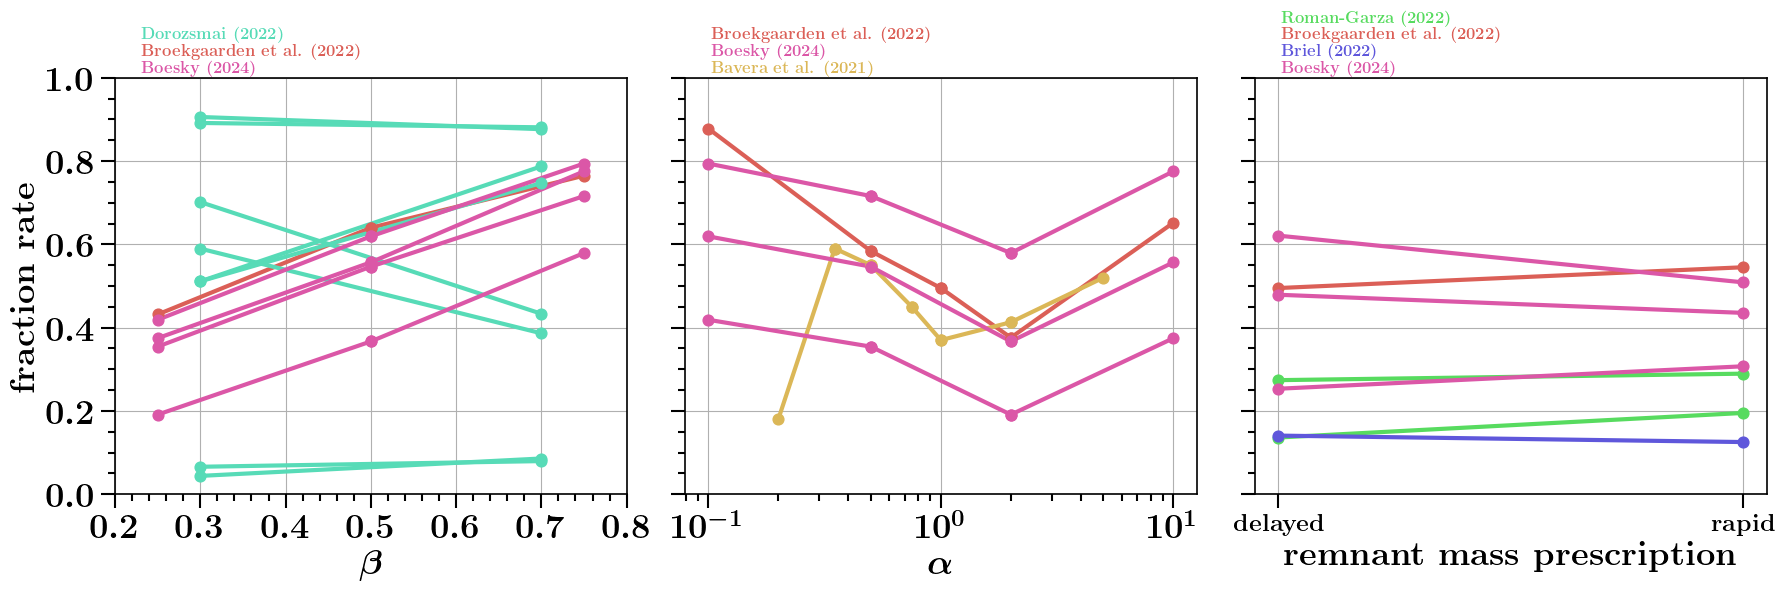

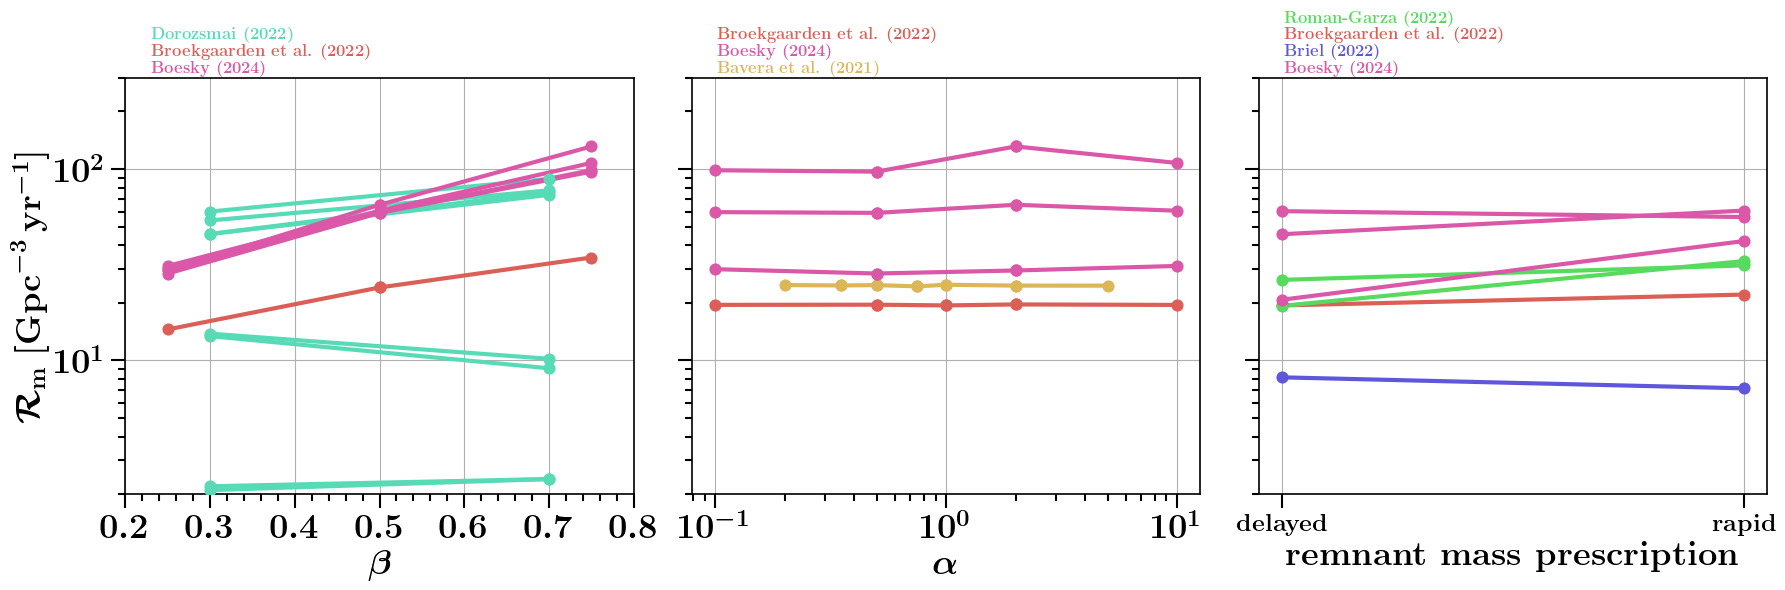

In [93]:


DCOtype = 'BH-BH'
csv_base = '/Users/floorbroekgaarden/Projects/GitHub/Rates_of_Formation_Channels/plottingCode/Fig_comparison/Data_formation_channels_intrinsic/'

####
plot_parameter_plots(channel_label='classic',  headers_ind_to_plot = 'channel I intrinsic (z=0) classic', csv_base=csv_base, DCOtype=DCOtype)
print('-----')
plot_parameter_plots(channel_label='OSMT',  headers_ind_to_plot = 'channel II intrinsic (z=0) OSMT', csv_base=csv_base, DCOtype=DCOtype)






plotting parameter beta
plotting parameter alpha
plotting parameter fryer
plotting parameter beta
plotting parameter alpha
plotting parameter fryer
-----
plotting parameter beta
plotting parameter alpha
plotting parameter fryer
plotting parameter beta
plotting parameter alpha
plotting parameter fryer


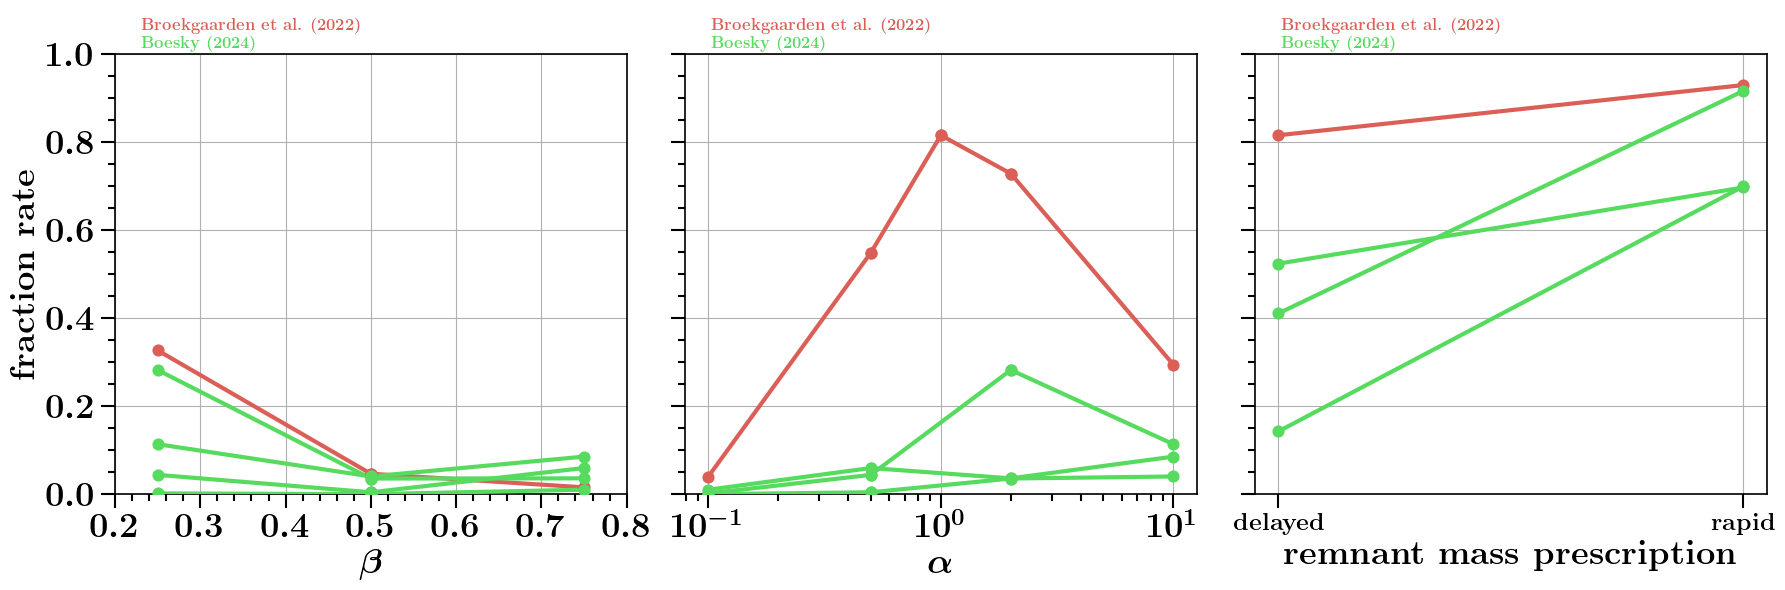

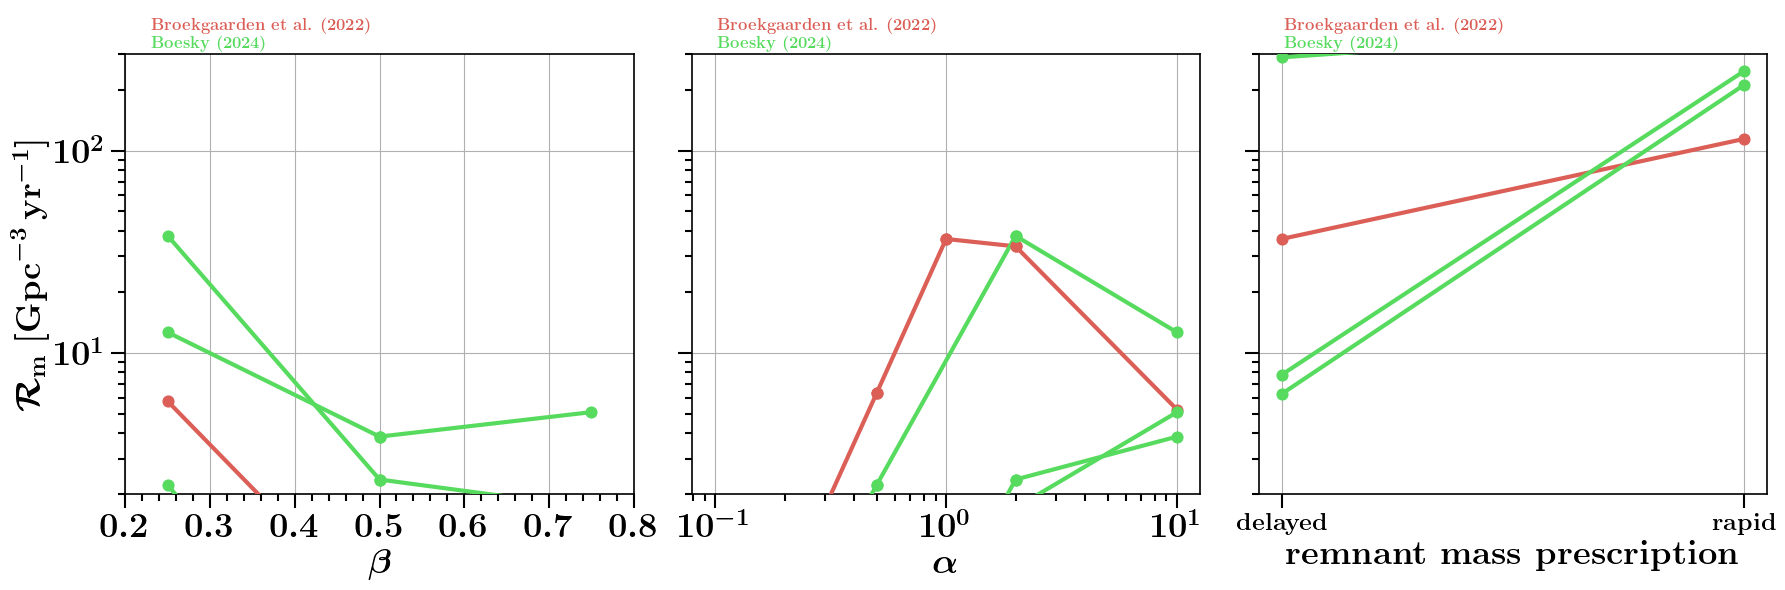

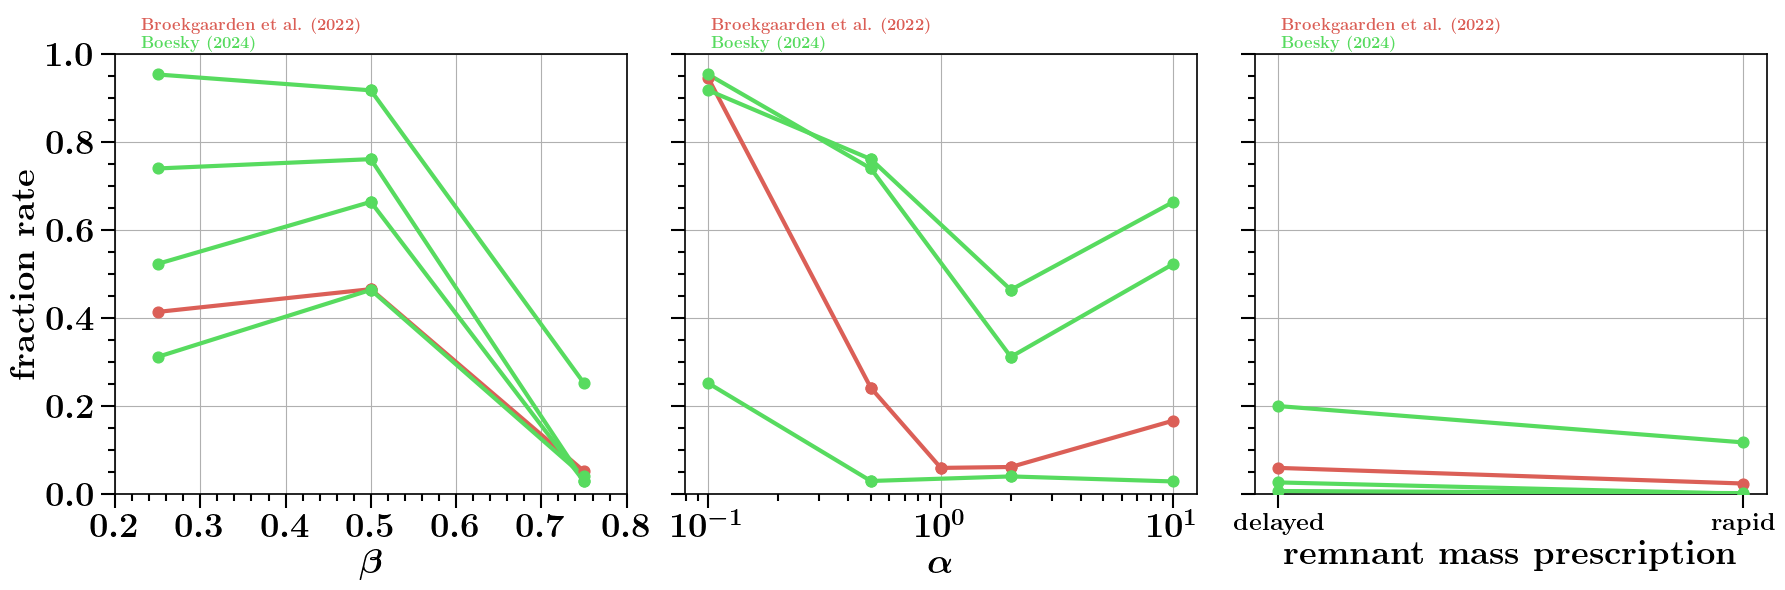

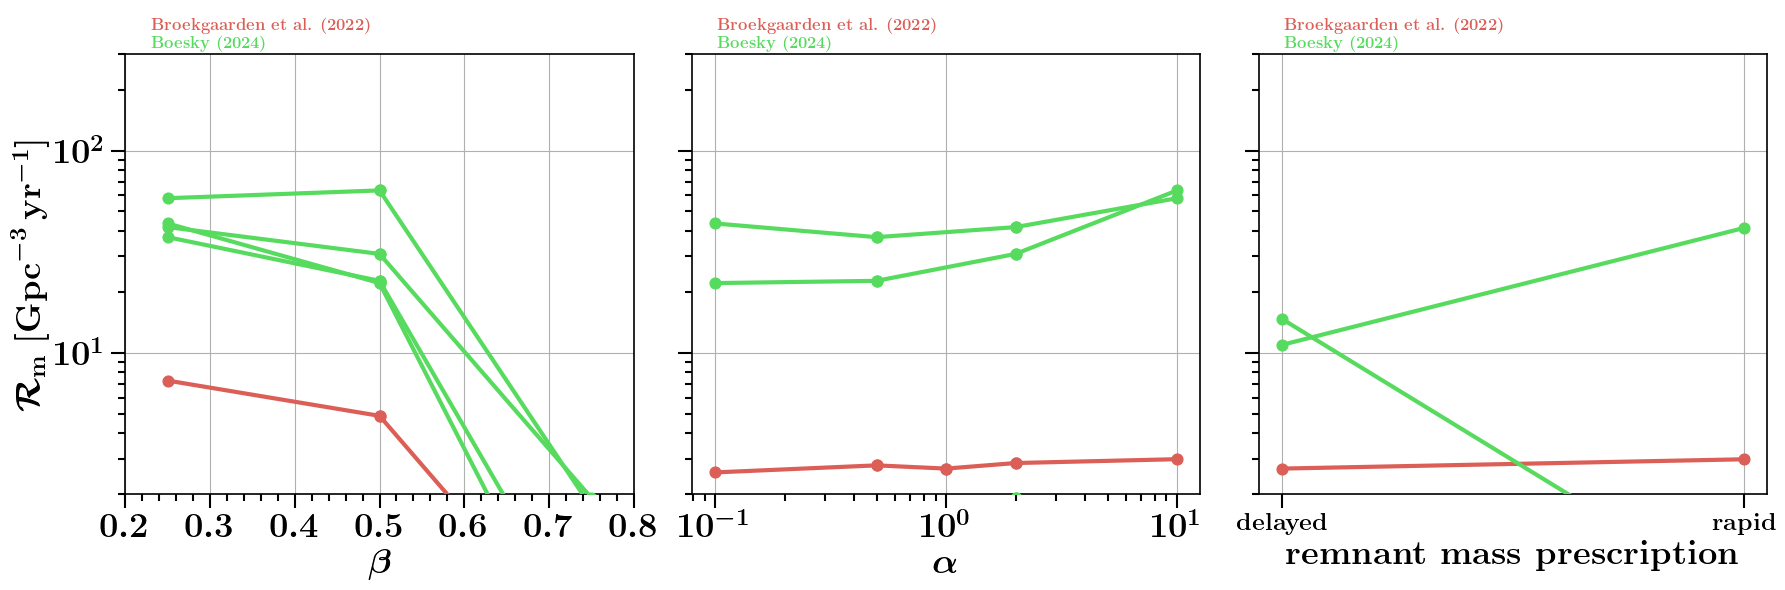

In [95]:


DCOtype = 'BH-NS'
csv_base = '/Users/floorbroekgaarden/Projects/GitHub/Rates_of_Formation_Channels/plottingCode/Fig_comparison/Data_formation_channels_intrinsic/'

####
plot_parameter_plots(channel_label='classic',  headers_ind_to_plot = 'channel I intrinsic (z=0) classic', csv_base=csv_base, DCOtype=DCOtype)
print('-----')
plot_parameter_plots(channel_label='OSMT',  headers_ind_to_plot = 'channel II intrinsic (z=0) OSMT', csv_base=csv_base, DCOtype=DCOtype)






plotting parameter beta
plotting parameter alpha
plotting parameter fryer
plotting parameter beta
plotting parameter alpha
plotting parameter fryer
-----


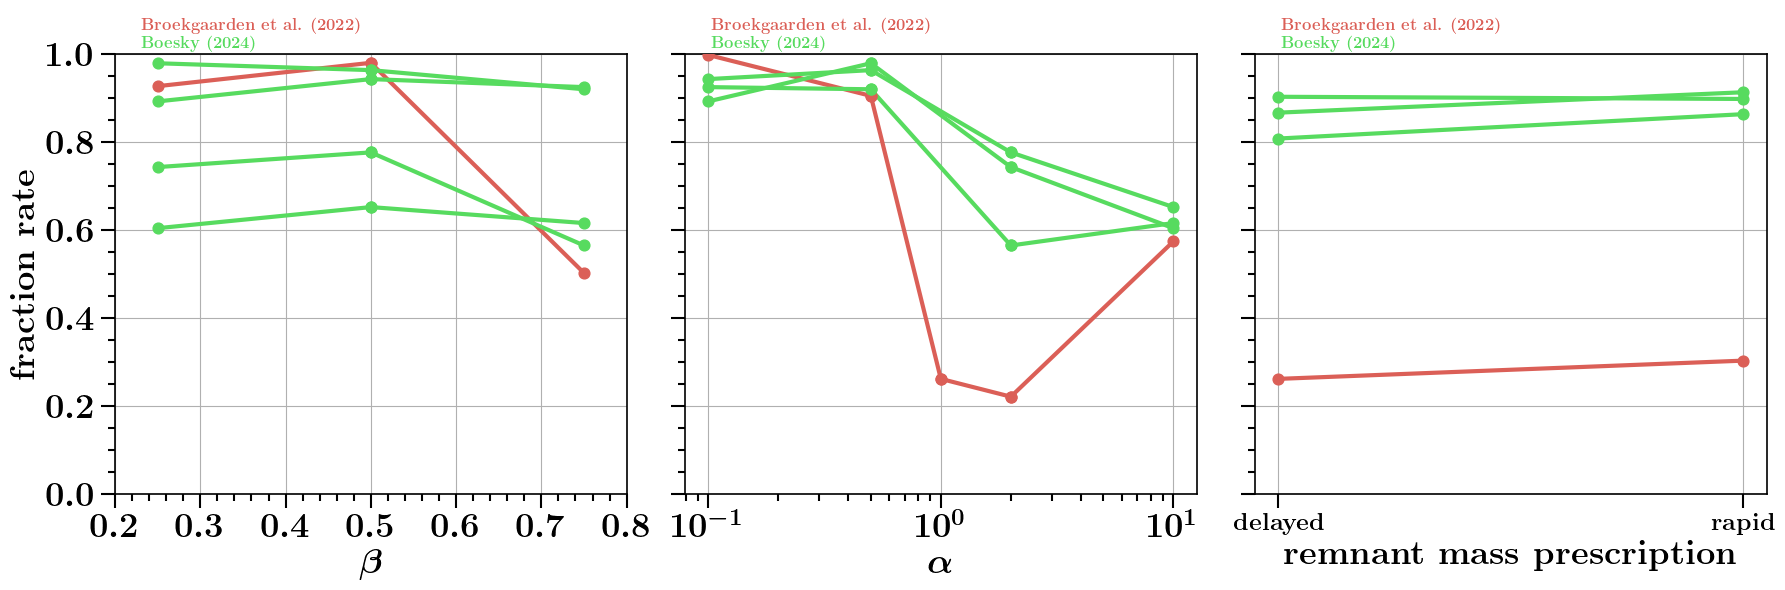

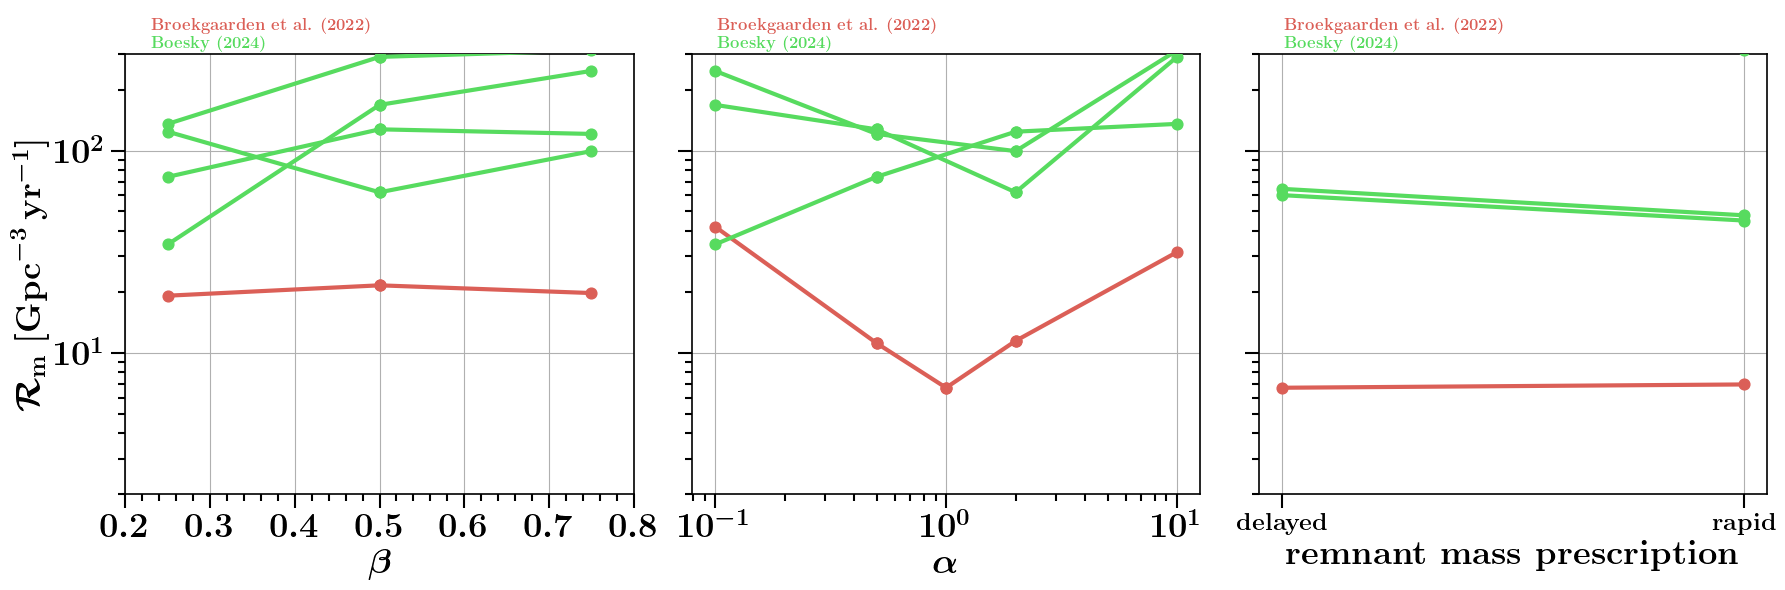

In [97]:


DCOtype = 'NS-NS'
csv_base = '/Users/floorbroekgaarden/Projects/GitHub/Rates_of_Formation_Channels/plottingCode/Fig_comparison/Data_formation_channels_intrinsic/'

####
plot_parameter_plots(channel_label='classic',  headers_ind_to_plot = 'channel I intrinsic (z=0) classic', csv_base=csv_base, DCOtype=DCOtype)
print('-----')
# plot_parameter_plots(channel_label='OSMT',  headers_ind_to_plot = 'channel II intrinsic (z=0) OSMT', csv_base=csv_base, DCOtype=DCOtype)





In [148]:
def plot_relations_review(axe, csv_base='path/to/csv/files/',  headers_ind_to_plot='channel I intrinsic (z=0) classic', DCOtype='BH-BH'):
    #channel_color_names = ['channel I intrinsic (z=0) classic', 'channel II intrinsic (z=0) OSMT', 'channel III intrinsic (z=0) SCCE',  'channel IV intrinsic (z=0) DCCE', 'channel V intrinsic (z=0) other']

    path_to_fc_relationships_file = csv_base + DCOtype + '_fcRelations.csv'
    complete_path_to_fc_rates = csv_base + DCOtype + '_rates_review.csv'
    channel_headers_list_plotting=[headers_ind_to_plot]    
#     legend 
    
    
    df_rel = pd.read_csv(path_to_fc_relationships_file, header=0) #skiprows=[0,1,2,3,4,6,7], usecols=[2*i for i in range(10)])
    n_relations = df_rel['from_modelname'].size
    
    # for setting colors 
    color_codes = np.unique(df_rel['color code'])
    linecolors =  sns.color_palette("hls", len(color_codes))
    rel_colors_library = dict(zip(color_codes, linecolors))
    
    # for a legend:
    legend_label = df_rel['legend']
    
    df_rate = pd.read_csv(complete_path_to_fc_rates)
    
    total_header = obtain_total_header(complete_path=complete_path_to_fc_rates) # header for the total rates 
    
    
#     for param in (parameters_list):
#         print('plotting parameter', param)
#         mask_param = df_rel['using'] == param  # mask the relationships that are related to the user specified parameter
        
        
    for ind_rel in range(df_rel['from_modelname'].size): # loop through all relationships with this parameter
#         if param in ['fryer']: # parameters that are not floats 
        paramvalue_start, paramvalue_end = (df_rel['from_option'].values[ind_rel]), (df_rel['to_option'].values[ind_rel]) # values of the parameter in relationship
#         else:
#         paramvalue_start, paramvalue_end = float(df_rel['from_option'][mask_param].values[ind_rel]), float(df_rel['to_option'][mask_param].values[ind_rel]) # values of the parameter in relationship
        
    
        modelname_start, modelname_end = df_rel['from_modelname'].values[ind_rel], df_rel['to_modelname'].values[ind_rel]  # model ID name for relationship 
        color_rel = rel_colors_library[df_rel['color code'].values[ind_rel]]

        for ind_c, channel in enumerate(channel_headers_list_plotting):
            fcfraction_start, fcfraction_end = df_rate[channel][df_rate["model"].values == modelname_start], df_rate[channel][df_rate["model"].values == modelname_end]
            
            total_rate_start, total_rate_end = df_rate[total_header][df_rate["model"].values == modelname_start], df_rate[total_header][df_rate["model"].values == modelname_end]
            fc_rate_start, fc_rate_end = fcfraction_start*total_rate_start, fcfraction_end*total_rate_end
            
            axe.scatter([fcfraction_start, fcfraction_end], [fc_rate_start, fc_rate_end], s=60, color=[color_rel], zorder=6, marker='o') 
            axe.plot(   [fcfraction_start, fcfraction_end], [fc_rate_start, fc_rate_end], lw=3, color=color_rel  , zorder=5)


        
    return
    
    
def make_up_axes_param_review(axe):
    xlabel = r'$\textbf{fraction rate}$'
    ylabel = r'$\mathcal{R}_{\rm{m}} \ [\rm{Gpc}^{-3} \, \rm{yr}^{-1}]$'
    
    
    layoutAxes(ax=axe, nameX=xlabel, nameY=ylabel, noYticks=False)
    axe.set_yscale('log')
    axe.set_xlim(0,1)
    axe.grid(True)   
    

        
    return
    

    
def construct_full_relations_review_plot(channel_label, headers_ind_to_plot, csv_base, DCOtype):
    """
    
    
    """

    
    d1,d2, w_small = 10,12, 0.1 # overwrite 
    ncols, nrows = 1, 2
    f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(d1,d2), gridspec_kw={"width_ratios":[w_small]*ncols, "height_ratios":[0.1, 1]}) 

    # main function 
    plot_relations_review(axe=axe[1], csv_base=csv_base, headers_ind_to_plot=headers_ind_to_plot, DCOtype=DCOtype)
    make_up_axes_param_review(axe=axe[1])
    plot_legends(axe=axe[0], csv_base=csv_base, DCOtype=DCOtype, parameters_list=False)


    plt.tight_layout()
    plt.subplots_adjust(hspace=0.)
#         plt.savefig('./Parameter_impact_FC_'+fraction_label + '_' +channel_label + '.png', dpi=300, transparent=False)#,\
    plt.savefig('./parameter_relations_review_' + channel_label + DCOtype+ '.pdf')#,\

    return



-----


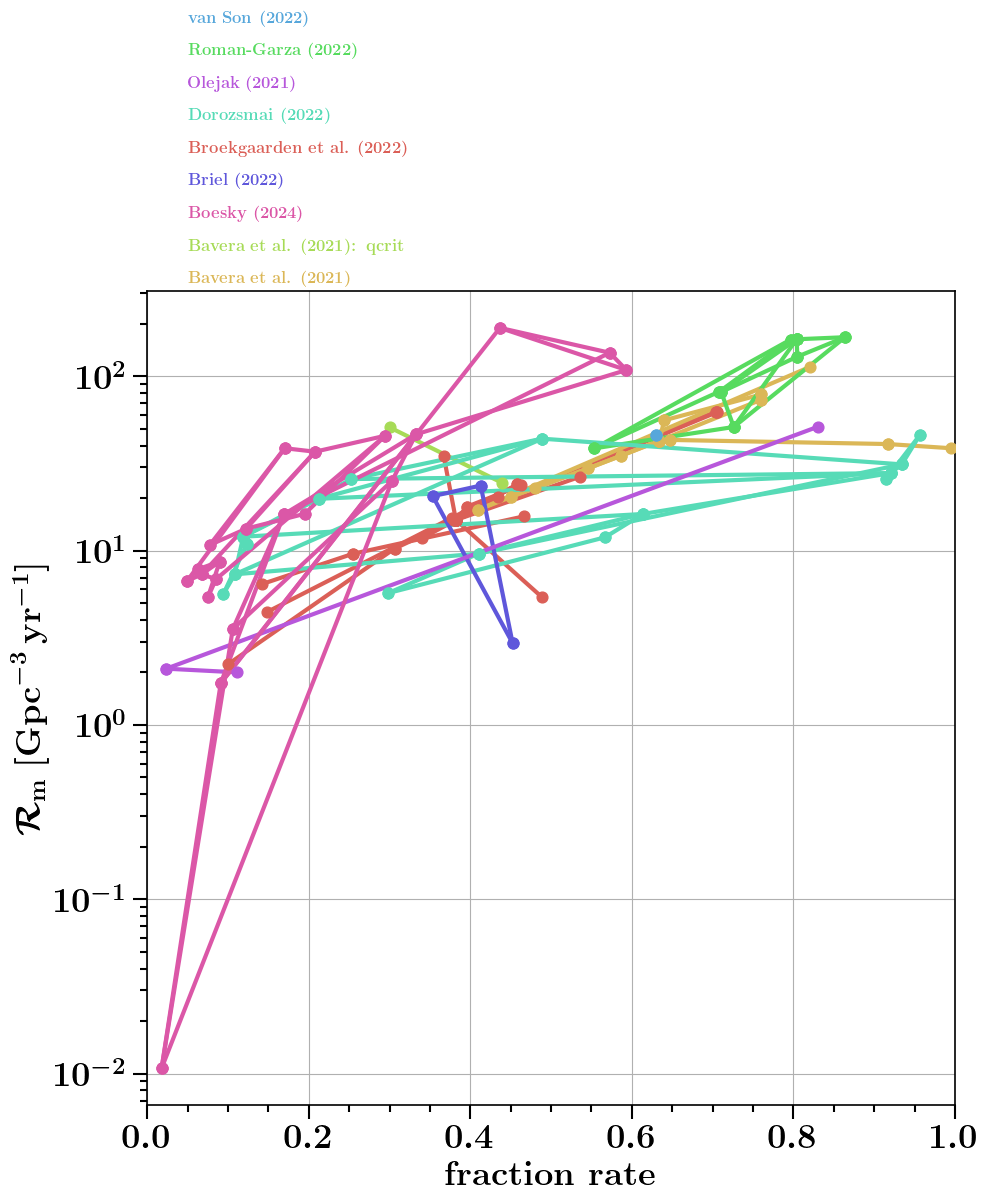

In [149]:


DCOtype = 'BH-BH'
csv_base = '/Users/floorbroekgaarden/Projects/GitHub/Rates_of_Formation_Channels/plottingCode/Fig_comparison/Data_formation_channels_intrinsic/'

####
construct_full_relations_review_plot(channel_label='classic',  headers_ind_to_plot = 'channel I intrinsic (z=0) classic', csv_base=csv_base, DCOtype=DCOtype)
print('-----')
# plot_relations_review(channel_label='OSMT',  headers_ind_to_plot = 'channel II intrinsic (z=0) OSMT', csv_base=csv_base, DCOtype=DCOtype)






In [63]:
pathData='/Volumes/SimonsFoundation/DataDCO/'
DCOtype='BNS'

BPSmodelName = "I"


# print(alphabetDirDict[BPSmodelName])
full_data_path  = pathData + alphabetDirDict[BPSmodelName] +'/COMPASOutput.h5'
# header = "rate_" + "total" + "_" + MSSFRname
fdata = h5.File(full_data_path,'r')
# totals_z =  fdata[fparam_key][header][...].squeeze()[which_z_ind] # [which_z_ind = 0] gives at lowest redshift
# # 
# print(totals_z)
# fdata.close()

In [62]:
! ls /Volumes/SimonsFoundation/DataDCO/alpha0_5/

COMPASCompactOutput_BBH_H.h5  COMPASCompactOutput_BNS_H.h5
COMPASCompactOutput_BHNS_H.h5 COMPASOutput.h5


In [42]:
print(fdata['systems'].keys())

<KeysViewHDF5 ['Metallicity1', 'SEED', 'disbound', 'mass1', 'mass2', 'stellar_merger', 'weight']>


In [43]:
sys_stellar_merger_flag = fdata['systems']['stellar_merger'][...].squeeze()
print(sys_stellar_merger_flag)

[False False False ... False False False]


In [64]:
print(fdata['commonEnvelopes'].keys())

<KeysViewHDF5 ['EccentricityPostCEE', 'EccentricityPreCEE', 'MSAccretorDuringCEEFlag', 'SemiMajorAxisPostCEE', 'SemiMajorAxisPreCEE', 'Teff1', 'Teff2', 'alphaCE', 'bEFixed1', 'bEFixed2', 'bEKruckow1', 'bEKruckow2', 'bELoveridge1', 'bELoveridge2', 'bELoveridgeWinds1', 'bELoveridgeWinds2', 'bENanjing1', 'bENanjing2', 'bindingEnergy1', 'bindingEnergy2', 'counterCEE', 'doubleCoreCommonEnvelopeFlag', 'finalStellarType1', 'finalStellarType2', 'flagRLOF1', 'flagRLOF2', 'immediateRLOFAfterCEE', 'lambda1', 'lambda2', 'lambdaFixed1', 'lambdaFixed2', 'lambdaKruckow1', 'lambdaKruckow2', 'lambdaLoveridge1', 'lambdaLoveridge2', 'lambdaLoveridgeWinds1', 'lambdaLoveridgeWinds2', 'lambdaNanjing1', 'lambdaNanjing2', 'luminosity1', 'luminosity2', 'm_EccentricityRLOF', 'mass1', 'mass1ZAMS', 'mass2', 'mass2ZAMS', 'massCore1', 'massCore2', 'massEnvelope1', 'massEnvelope2', 'massTransferTrackerHistory', 'optimisticCommonEnvelopeFlag', 'radius1', 'radius1AfterStripping', 'radius2', 'radius2AfterStripping', 'r

In [53]:
seeds_sys  = fdata['systems']['SEED'][...].squeeze()
all_rlof_seeds = fdata['RLOF']["randomSeed"][...].squeeze()
RLOF_companion_type1 = fdata['RLOF']['type1'][...].squeeze()
RLOF_companion_type2 = fdata['RLOF']['type2'][...].squeeze()

mask_CO = (RLOF_companion_type1==13) | (RLOF_companion_type1==14) |(RLOF_companion_type2==13) | (RLOF_companion_type2==14) 
seeds_CO_RLOF = all_rlof_seeds[mask_CO]

# stable onto Compact object
rlof_mask = np.isin(seeds_sys, seeds_CO_RLOF)

print(seeds_sys[rlof_mask])


seed_test = seeds_sys[rlof_mask][0]

[   5007735    5008888    5010836 ... 5285011458 5285011469 5285011475]


In [54]:
mask_test = (all_rlof_seeds == seed_test)
print(mask_test)

print(RLOF_companion_type1[mask_test])
print(RLOF_companion_type2[mask_test])
print(all_rlof_seeds[mask_test])

[ True  True  True ... False False False]
[ 7 13 13]
[ 7  7 13]
[5007735 5007735 5007735]


In [56]:
seeds_sys  = fdata['systems']['SEED'][...].squeeze()
all_rlof_seeds = fdata['commonEnvelopes']["randomSeed"][...].squeeze()
RLOF_companion_type1 = fdata['RLOF']['type1'][...].squeeze()
RLOF_companion_type2 = fdata['RLOF']['type2'][...].squeeze()

mask_CO = (RLOF_companion_type1==13) | (RLOF_companion_type1==14) |(RLOF_companion_type2==13) | (RLOF_companion_type2==14) 
seeds_CO_RLOF = all_rlof_seeds[mask_CO]

# stable onto Compact object
rlof_mask = np.isin(seeds_sys, seeds_CO_RLOF)

print(seeds_sys[rlof_mask])


seed_test = seeds_sys[rlof_mask][0]

1


## Code to write intrinsic formation channels rates from Broekgaarden simulations to a single CSV file for a given MSSFR choice. 

/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/produceDataCode/write_formation_channel_rates_to_CSV.py run this code, which produces CSV files for each MSSFR and DCOtype for the fractions

# OLD CODE 

In [ ]:
path_to_data_directory = '/Users/floorbroekgaarden/Projects/GitHub/Rates_of_Formation_Channels/plottingCode/Fig_comparison/Data_formation_channels_intrinsic/'

In [ ]:
# Basic scripts / code for plotting compact coalescence rates 


import numpy as np
import matplotlib.pyplot as plt
# for e.g., minor ticks 
from matplotlib.ticker import (FormatStrFormatter,
                               AutoMinorLocator)

import matplotlib
import seaborn as sns # only used for sns colors 
import pandas as pd # to read in the csv files 


from astropy import units as u
from astropy import constants as const

from matplotlib import rc                                                                                                                                                                                                                    
from matplotlib import rcParams
#Set latex environment for plots/labels
rc('font', family='serif', weight = 'bold')
rc('text', usetex=True)
# matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
# matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
rc('axes', linewidth=2)

matplotlib.rcParams['xtick.major.size'] = 12
matplotlib.rcParams['ytick.major.size'] = 12
matplotlib.rcParams['xtick.minor.size'] = 8
matplotlib.rcParams['ytick.minor.size'] = 8
matplotlib.rcParams['font.weight']= 'bold'
matplotlib.rcParams.update({'font.weight': 'bold'})

fs = 24 # fontsize for plots
rc('axes', linewidth=2)


# Some global dictionaries to take care of labels and coloring:
all_names = [ 'channel_I', 'channel_II'] #, 'kilonovae', 'pulsars',\
                       # 'isolated binaries',  'CHE','pop-III','triples', 'dynamical: GC', 'dynamical: NC',  'dynamical: YSC',  'primordial']

# colors for each group
c_channel_I = 'orangered'
# c_GRB = sns.color_palette("husl", 12)[0] #  sns.color_palette("husl", 20)[1] 
# c_kn = sns.color_palette("husl", 12)[1] #'darkgoldenrod' #sns.color_palette("husl", 20)[3]
# c_psr =  sns.color_palette("husl", 12)[2]# "orange"

c_channel_II = sns.color_palette("husl", 12)[4] #  sns.color_palette("husl", 20)[6] #'limegreen'
# c_che = sns.color_palette("husl", 12)[5] #"forestgreen" #sns.color_palette("husl", 20)[8]
# c_popIII = sns.color_palette("husl", 12)[6] # "c" #"turquoise" # sns.color_palette("husl", 20)[12]
# c_trip = sns.color_palette("husl", 12)[7] #"royalblue" #sns.color_palette("husl", 20)[13]

# c_GC =  sns.color_palette("husl", 12)[9] #sns.color_palette("husl", 20)[15] 
# c_NC = sns.color_palette("husl", 12)[10] # "blueviolet" #
# c_YC =  sns.color_palette("husl", 12)[11] # "magenta"

# c_prim = "royalblue" #"brown"


colors = [c_channel_I, c_channel_II]

# automatic rainbow: 
# colors = sns.color_palette("husl", len(all_names))   

name_colors = dict(zip(all_names, colors))
name_labels = [ r'classic CE', r'Only Stable MT']
names_label_dict = dict(zip(all_names, name_labels))
dictDCOdirectory = {'BHBH':'BH-BH', 'BHNS': 'BH-NS', 'NSNS':'NS-NS'}










def draw_vlines(axe, v_values):
    """ draws vertical grid lines at values in the v_values list """
    
    for v_ in v_values:
        # draw vertical line that looks similar to grid line 
#         axe.plot([v_, v_], [-1E5, 2], lw=2, c='gray', ls='-', zorder=0)
        axe.plot([v_, v_], [-1E5, 1E5], lw=1.5, c='gray', ls=':', zorder=0)
        
    return 





def make_up_axes(axe=None, DCOtype='BHNS',  df_names=['a', 'b'], ordered=None, version='ArXiv'):
    """ creates several things that are axes related"""

    xmin,xmax = -0.025, 1.025
        
    # axes layout and mark up 
    # axe.set_xscale('log')
    DCOname_dict = {'BHNS':'NS-BH', 'BHBH':'BH-BH', 'NSNS':'NS-NS'}
    xlabel = r'$\textbf{Fraction } \ \textbf{of} \  \textbf{%s} \ $'%DCOname_dict[DCOtype] + r'$\textbf{mergers} $'
    xlabel = r'$\textbf{Channel } \ \textbf{contribution} $'
        
    
    bps_names = []
    codes_names = []
   

    v_height=0
    yticks=[]   
    for ind_file, csv_filename in enumerate([df_names[0]]):
        
        df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13])
        df = df.iloc[:,1::2]

        rate_max_list = []
        codes_list = []
        
        df_codes = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,8,9,10,11,12,13])
        df_codes = df_codes.iloc[:,1::2]
        codes = df_codes.columns

        v_height+= -1
        if ordered=='max':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]
                
                rate_max_list.append(np.max(rate))
                
                code = df_codes[name][0]
                codes_list.append(code)
            
            sorted_ind = np.argsort(np.asarray(rate_max_list))
        
            colum_list_sorted = df.columns[sorted_ind]
            codes_list_sorted = np.asarray(codes_list)[sorted_ind]
            
        elif ordered=='year':
            colum_list_sorted = df.columns 
            for ind_n, name in enumerate(df.columns):              
                code = df_codes[name][0]
                codes_list.append(code)
            codes_list_sorted = np.asarray(codes_list)
        
        
        elif ordered=='code':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]
                
                rate_max_list.append(np.max(rate))
                
                code = df_codes[name][0]
                codes_list.append(code)
            
            sorted_ind = np.argsort(np.asarray(codes_list))
        
            colum_list_sorted = df.columns[sorted_ind]
            codes_list_sorted = np.asarray(codes_list)[sorted_ind]     
        
        else:
            colum_list_sorted = df.columns        
            codes_list_sorted = codes 
            

        
        for ind_m, bps_model in enumerate(colum_list_sorted):
            bps_names.append(r'\textbf{%s}'%(bps_model) )
            codes_names.append(r'\textbf{%s}'%(codes_list_sorted[ind_m]) )
            yticks.append(v_height)
            v_height+=-1
        
        # add blank line after each channel 
        v_height+= -1 

    axe.set_yticks([])

    
    axe.set_xlim(xmin, xmax)
    axe.set_ylim(-len(bps_names) -2*len([df_names[0]])+0.5, 0.5)
    
    if version=='ArXiv':
        # add x labels on top
        ax2x = axe.twiny()
        # ax2x.set_xscale('log')   
        ax2x.set_xlim(xmin, xmax)
        ax2x = layoutAxesNoYlabel(ax2x, nameX=xlabel, nameY=r'NA', fontsize=fs+6, setMinor=False, second=True, labelpad=20)
    
    axe = layoutAxesNoYlabel(axe, nameX=xlabel, nameY=r'NA', fontsize=fs+6, setMinor=False, labelpad=4)


    return 
    
     
    




def plot_using_plotting_style(axe, ps, x_, y_, color):
    """ uses the plotting style (integer ps between 0 and 30) 
    to plot the data given the plottingstyle that is given in the csv file 
    the dictionary is: 

    1: only upper limit(s) 
    2: only lower limit(s) 
    3: interval without center value
    4: interval with center value   (90% confidence interval or so) 
    5: interval with range of simulation values 
    6: interval with range of simulation values last point is upper limit 
    7: interval with range of simulation values first point is lower limit 
    8: (two confidence intervals)  range + two center values (weird one) 
    9: interval with range of simulation values , first one is fiducial 
    10; interval with range of simulation values use ylim to add lower limit 
    11; interval with range of simulation values , first two are fiducial 
    12: single estimate without error bars 
    13; interval with range of simulation values , first three are fiducial 
    14; interval with range of simulation values use ylim to add upper limit 
    15: interval, upper 3 are upper limits 
    16: two upper limits 
    17: interval with range of simulation values first point is upper limit 
    18: interval with range of simulation values first point is upper limit  +   2 upper ones are upper limits
    19:
    20: 
    
    """ 
    
    # draw upper/lower limit: 
#     if ps in [1,2,6,7, 10, 12, 14, 15 , 16, 17 , 18, 19, 20 ]:
        
    if ps != 100:
            
            
        axe.plot([np.min(x_),np.max(x_)], [y_[0], y_[0]], lw=15, color=color, zorder=5)
        
            
        

    else:



        msize = 400
        if ps in [1,6,14]:
            mstyle = 4 # upper limit 
            axe.scatter(np.max(x_), np.max(y_), s=msize, c=np.asarray([color]), zorder=1E6, marker=mstyle)
        if ps in [20]:
            mstyle =  8 # upper limit but triangle more to the left 
            axe.scatter(1.05*np.max(x_), np.max(y_), s=msize, c='k', zorder=1E6, marker=mstyle)
        elif ps in [17, 18]:
            mstyle=4 # upper limit  (lower limit)
        # draw upper or lower limit
            axe.scatter(np.min(x_), np.min(y_), s=msize, c='k', zorder=1E6, marker=mstyle)            
        elif ps in [2,7]:
            mstyle=5 # lower limit 
        # draw upper or lower limit
            axe.scatter(np.min(x_), np.min(y_), s=msize, c='k', zorder=1E6, marker=mstyle)
        elif ps in [14]:
            mstyle=4
            # 1E4 is upper limit 
            axe.scatter(0.99*1E5, np.max(y_), s=msize, c='cyan', zorder=1E6, marker=mstyle)
        elif ps in [15]:
            mstyle=4
            # top 3 are upper limit  
            axe.scatter(x_[-3:], y_[-3:], s=msize, c='k', zorder=1E6, marker=mstyle)
        elif ps in [18]:
            mstyle=4
            # top 2 are upper limit  
            axe.scatter(x_[-2:], y_[-2:], s=msize, c='k', zorder=1E6, marker=mstyle)
        elif ps in [16]:
            mstyle=4
            # top 3 are upper limit  
            axe.scatter(x_[-2:], y_[-2:], s=msize, c='k', zorder=1E6, marker=mstyle)
        elif ps in [10]:
            mstyle=5
            # 1E-3 is lower limit y axis 
            axe.scatter(1E-3, np.max(y_), s=msize, c='cyan', zorder=1E6, marker=mstyle)
        elif ps in [12]:
            msize = 125
            axe.scatter(x_, y_, s=msize, c=np.asarray([color]), zorder=1E2, marker='o') 
        elif ps in [19]:
            mstyle=4
            # 1E-3 is upper lower limit y axis 
            axe.scatter(1E-3, np.max(y_), s=msize, c='cyan', zorder=1E6, marker=mstyle)



        # draw error bar 
        msize = 125
        if ps in [3,4,5,6, 7, 8,9,10,11,13, 14, 15, 17, 18 ]:
#             axe.errorbar(x=[np.min(x_),np.max(x_)], y=[y_[0], y_[0]], yerr=2*[0.42], color=color, zorder=5, lw=5.5, ecolor=color)
#             axe.errorbar(x=[np.min(x_),np.max(x_)], y=[y_[0], y_[0]], yerr=2*[0.42], fmt='o', zorder=1E5, lw=3.5, ecolor='k', color='k')
            if ps==4:
                # plot center values
                axe.scatter(x_[1], y_[1], s=msize, c='k', zorder=1E2, marker='o')
            elif ps==3:
                # don't plot scatter points
                pass
            elif ps==15:
                axe.scatter(x_[0:3], y_[0:3], s=msize, color=[color], zorder=1E2, marker='o') 
            else:
                axe.scatter(np.mean(x_), np.mean(y_), s=msize, color=[color], zorder=1E2, marker='o') 


    return 




# some functions to make beautiful axes 

def layoutAxes(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 25, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax


def layoutAxesNoYlabel(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 25, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    # ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax


def layoutAxesNoXlabel(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 25, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    # ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    # ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax




def plot_using_plotting_styleRates(axe, ps, x_, y_, color, ind_channel=-1):
    """ uses the plotting style (integer ps between 0 and 30) 
    to plot the data given the plottingstyle that is given in the csv file 
    the dictionary is: 

    1: only upper limit(s) 
    2: only lower limit(s) 
    3: interval without center value
    4: interval with center value   (90% confidence interval or so) 
    5: interval with range of simulation values 
    6: interval with range of simulation values last point is upper limit 
    7: interval with range of simulation values first point is lower limit 
    8: (two confidence intervals)  range + two center values (weird one) 
    9: interval with range of simulation values , first one is fiducial 
    10; interval with range of simulation values use ylim to add lower limit 
    11; interval with range of simulation values , first two are fiducial 
    12: single estimate without error bars 
    13; interval with range of simulation values , first three are fiducial 
    14; interval with range of simulation values use ylim to add upper limit 
    15: interval, upper 3 are upper limits 
    16: two upper limits 
    17: interval with range of simulation values first point is upper limit 
    18: interval with range of simulation values first point is upper limit  +   2 upper ones are upper limits
    19:
    20: 
    
    """ 
    
    
    if ind_channel==-1:
        mstyle = 'P'
    else:
        mstyle = 'o'
    # draw upper/lower limit: 
    if ps in [1,2,6,7, 10, 12, 14, 15 , 16, 17 , 18, 19, 20 ]:
        msize = 400
        if ps in [1,6,14]:
#             mstyle = 'o' # upper limit 
            axe.scatter(np.max(x_), np.max(y_), s=msize, c=np.asarray([color]), zorder=1E6, marker=mstyle)


    # draw error bar 
    msize = 125
    if ps in [3,4,5,6, 7, 8,9,10,11,13, 14, 15, 17, 18 ]:
#         axe.errorbar(x=[np.min(x_),np.max(x_)], y=[y_[0], y_[0]], yerr=2*[0.42], color=color, zorder=5, lw=5.5, ecolor=color)
#         axe.errorbar(x=[np.min(x_),np.max(x_)], y=[y_[0], y_[0]], yerr=2*[0.42], fmt='o', zorder=1E5, lw=3.5, ecolor='k', color='k')
        axe.scatter(np.median(x_), np.median(y_), s=msize, color=[color], zorder=1E2, marker='o') 

 
    return 





def plotDCOrates(axe, df_names, df_colordict, df_labels, DCOtype='BHNS', ordered=None, plotmedians=False, version='ArXiv'):
    """    
    
    axe: axe to plot the figure on 
    df_names: names of the textfiles with the data  
    df_colordict: color map for the data files 
    df_labels: map to the label names of the data files  
    DCOtype: Double Compact object type, options are 'BHNS', 'BHBH' or 'NSNS'  
    ordered: way to order the different studies within a sub group. 
    Ordered Options are 'year', 'code' (based on code names) and 'max' (based on maximum rates; under construction)
    
    
    """    

    """    
    
    axe: axe to plot the figure on 
    df_names: names of the textfiles with the data  
    df_colordict: color map for the data files 
    df_labels: map to the label names of the data files  
    DCOtype: Double Compact object type, options are 'BHNS', 'BHBH' or 'NSNS'  
    ordered: way to order the different studies within a sub group. 
    Ordered Options are 'year', 'code' (based on code names) and 'max' (based on maximum rates; under construction)
    
    
    """    

    



    v_height=0
    for ind_file, csv_filename in enumerate([df_names[0]]):
        
        v_height_top = int(v_height) +.5

        
        medians_list = [] # list where we will save the medians of each rate estimate

        
        df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
        df = df.iloc[:,1::2]
        
        # plotting style 
        df_ps = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,8])
        df_ps = df_ps.iloc[:,2::2]

        rate_max_list = []
        codes_list = []
        
        df_codes = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,7,8])
        df_codes = df_codes.iloc[:,2::2]
        
        labelname = df_labels[ind_file]
        
        rate_max_list = []
        plot_styles   = []
        
        if ordered=='max':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]

                
                
                if len(rate)>1:
#                     print(rate)
                    median_ind = np.argsort(rate)[len(rate)//2]
                    rate = rate[median_ind]
                
                
                rate_max_list.append(np.max(rate))
            
            sorted_ind = np.argsort(np.asarray(rate_max_list))
        
            colum_list = df.columns[sorted_ind]
            colum_list_sorted = df.columns[sorted_ind]
        
        
        elif ordered=='code':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]

                rate_max_list.append(np.max(rate))
                code = df_codes[name][0]
                codes_list.append(code)
            
            sorted_ind = np.argsort(np.asarray(codes_list))
            colum_list = df.columns[sorted_ind]
        
            
            ##
            colum_list_sorted = df.columns[sorted_ind]
            codes_list_sorted = np.asarray(codes_list)[sorted_ind]
            
    
        

        elif ordered=='year':
            colum_list = df.columns
            colum_list_sorted = df.columns
            
        else:
            print('ERROR')
#             colum_list = df.columns
            

        
        channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
        channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}

        List_formationchannelOptions = ['classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']

        channel_colors = ['#118AB2', '#EF476F', '#FFD166', '#073B4C',  'gray']
        
        
        
        
        v_height+= -1
        for ind_n, name in enumerate(colum_list):
#             print('name', name)
            
            fix_name = name + '.1'

            rate_min, rate_max  = 0, 0
            for ind_file, csv_filename in enumerate(df_names):
                
                
#                 print('csv-filename', csv_filename)
                # read in data 
                df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
                df = df.iloc[:,2::2]
#                 print(df)
                
                rate = df[fix_name]

                mask_notna = (df[fix_name].notna())
                rate = rate[mask_notna]

                ps = df_ps[fix_name][0]
#                 print('ps of rate ', ps)

            
                plot_using_plotting_styleRates(axe, ps, x_=np.asarray(rate), y_=v_height*np.ones_like(rate), color='k') #df_colordict[labelname]                
                
                
                
        
            v_height+= -1  # height of rate to plot on vertical axes  


            
#         v_height+= -1

        v_height_bottom = int(v_height)+0.5

        
        if ind_file!=(len(df_names)-1):   
            axe.plot([1E-3, 1E5],  [v_height+0.5]*2, lw=1.5, c='gray', ls=':', zorder=0)
    

  

    return 



    


     
    




In [ ]:


def plotDCOrates_channel(axe, df_names, df_colordict, df_labels, DCOtype='BHNS', ordered=None, plotmedians=False, version='ArXiv', ind_channel=0, xlim=[0.2, 1E3]):
    
    """    
    
    axe: axe to plot the figure on 
    df_names: names of the textfiles with the data  
    df_colordict: color map for the data files 
    df_labels: map to the label names of the data files  
    DCOtype: Double Compact object type, options are 'BHNS', 'BHBH' or 'NSNS'  
    ordered: way to order the different studies within a sub group. 
    Ordered Options are 'year', 'code' (based on code names) and 'max' (based on maximum rates; under construction)
    
    
    """    
    
    
    
    v_height=0
    for ind_file, csv_filename in enumerate([df_names[0]]):
        
        v_height_top = int(v_height) +.5

        
        medians_list = [] # list where we will save the medians of each rate estimate

        
        df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
        df = df.iloc[:,1::2]
        
        # plotting style 
        df_ps = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,8])
        df_ps = df_ps.iloc[:,1::2]

        rate_max_list = []
        codes_list = []
        
        df_codes = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,7,8])
        df_codes = df_codes.iloc[:,1::2]
        
        labelname = df_labels[ind_file]
        
        rate_max_list = []
        plot_styles   = []
        
        if ordered=='max':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]

                
                
                if len(rate)>1:
#                     print(rate)
                    median_ind = np.argsort(rate)[len(rate)//2]
                    rate = rate[median_ind]
                
                
                rate_max_list.append(np.max(rate))
            
            sorted_ind = np.argsort(np.asarray(rate_max_list))
        
            colum_list = df.columns[sorted_ind]
            colum_list_sorted = df.columns[sorted_ind]
        
        
        elif ordered=='code':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]

                rate_max_list.append(np.max(rate))
                code = df_codes[name][0]
                codes_list.append(code)
            
            sorted_ind = np.argsort(np.asarray(codes_list))
            colum_list = df.columns[sorted_ind]
        
            
            ##
            colum_list_sorted = df.columns[sorted_ind]
            codes_list_sorted = np.asarray(codes_list)[sorted_ind]
            
    
        

        elif ordered=='year':
            colum_list = df.columns
            colum_list_sorted = df.columns
            
        else:
            print('ERROR')
#             colum_list = df.columns
            
            
        # obtain ordered:
        
        
        
        channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
        channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}

        List_formationchannelOptions = ['classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']

#         channel_colors = ['#118AB2', '#EF476F', '#FFD166', '#073B4C',  'gray']
        channel_colors = [ '#118AB2', '#EF476F'  , '#073B4C','gray', 'orange', '#FFD166']
        
        v_height+= -1
#         print('column list = ',colum_list)
        for ind_n, name in enumerate(colum_list):
            
            fix_name = name + '.1'
            rate_min_tot, rate_max_tot  = 0, 0
            
            rate_min, rate_max  = 0, 0
            for ind_file, csv_filename in enumerate([df_names[ind_channel]]):                


                
                ######
                
                # read in total rates data 
                df_tot = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
                df_tot = df_tot.iloc[:,2::2]
                rate_tot = df_tot[fix_name]
                mask_notna = (df_tot[fix_name].notna())
                rate_tot = rate_tot[mask_notna]

                    
                ########
                
                
                # read in data 
                df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
                df = df.iloc[:,1::2]   
                

                rate = df[name]

                ps = df_ps[name][0]

                mask_notna = (df[name].notna())
                rate = rate[mask_notna]
                
                rate = rate * rate_tot
                
                
#                 if (ps in [5]) & (ind_file==0):
# #                     print(rate)
#                     median_ind = np.argsort(rate)[len(rate)//2]
#                     min_ind = np.argsort(rate)[0]
# #                     max_ind = np.argsort(rate)[-1]
#                 if (ps in [5]):
# #                     print(median_ind)
#                     rate = rate[median_ind]



                plot_using_plotting_styleRates(axe, ps=1, x_=np.asarray(rate), y_=v_height*np.ones_like(rate), color=channel_colors[ind_channel], ind_channel=ind_channel)                
                
                xx_temp = np.logspace(np.log10(xlim[0]), np.log10(xlim[1]), 100)
                axe.plot(xx_temp, v_height*np.ones_like(xx_temp), lw=1, color='lightgray', ls='--', zorder=1)                
                                

            v_height+= -1  # height of rate to plot on vertical axes  



        v_height_bottom = int(v_height)+0.5


    
        if plotmedians==True:
        # add bar with median values of the medians from this channel/list 
            super_median = np.median(medians_list)
            axe.fill_between(x=[super_median/1.5, super_median*1.5], y1=[v_height_bottom]*2, y2=[v_height_top]*2, color=df_colordict[labelname], alpha=0.2, zorder=1)


    return 








    
    
    
    
    
    

In [ ]:






def plotDCOfractions(axe, df_names, df_colordict, df_labels, DCOtype='BHNS', ordered=None, plotmedians=False, version='ArXiv', xlim=[0.2, 1E3]):
    """    
    
    axe: axe to plot the figure on 
    df_names: names of the textfiles with the data  
    df_colordict: color map for the data files 
    df_labels: map to the label names of the data files  
    DCOtype: Double Compact object type, options are 'BHNS', 'BHBH' or 'NSNS'  
    ordered: way to order the different studies within a sub group. 
    Ordered Options are 'year', 'code' (based on code names) and 'max' (based on maximum rates; under construction)
    
    
    """    

    v_height=0
    for ind_file, csv_filename in enumerate([df_names[0]]):
        
        v_height_top = int(v_height) +.5

        
        medians_list = [] # list where we will save the medians of each rate estimate

        
        df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
        df = df.iloc[:,1::2]
        
        # plotting style 
        df_ps = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,8])
        df_ps = df_ps.iloc[:,1::2]

        rate_max_list = []
        codes_list = []
        
        df_codes = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,7,8])
        df_codes = df_codes.iloc[:,1::2]
        
        labelname = df_labels[ind_file]
        
        rate_max_list = []
        plot_styles   = []
        
        if ordered=='max':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]

                
                
                if len(rate)>1:
#                     print(rate)
                    median_ind = np.argsort(rate)[len(rate)//2]
                    rate = rate[median_ind]
                
                
                rate_max_list.append(np.max(rate))
            
            sorted_ind = np.argsort(np.asarray(rate_max_list))
        
            colum_list = df.columns[sorted_ind]
            colum_list_sorted = df.columns[sorted_ind]
        
        
        elif ordered=='code':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]

                rate_max_list.append(np.max(rate))
                code = df_codes[name][0]
                codes_list.append(code)
            
            sorted_ind = np.argsort(np.asarray(codes_list))
            colum_list = df.columns[sorted_ind]
        
            
            ##
            colum_list_sorted = df.columns[sorted_ind]
            codes_list_sorted = np.asarray(codes_list)[sorted_ind]
            
    
        

        elif ordered=='year':
            colum_list = df.columns
            colum_list_sorted = df.columns
            
        else:
            print('ERROR')
#             colum_list = df.columns
            
            
        # obtain ordered:
        
        
        
        channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
        channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}

        List_formationchannelOptions = ['classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']

#         channel_colors = ['#118AB2', '#EF476F', '#FFD166', '#073B4C',  'gray']
        channel_colors = [ '#118AB2', '#EF476F'  , '#073B4C','gray', 'orange', '#FFD166']
        
        v_height+= -1
        for ind_n, name in enumerate(colum_list):
            
            rate_min, rate_max  = 0, 0
            for ind_file, csv_filename in enumerate(df_names):
                
                
                
                # read in data 
                df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
                df = df.iloc[:,1::2]   
                

                    

                rate = df[name]

                ps = df_ps[name][0]

                mask_notna = (df[name].notna())
                rate = rate[mask_notna]
                
                
                if (ps in [5]) & (ind_file==0):
#                     print(rate)
                    median_ind = np.argsort(rate)[len(rate)//2]
                    min_ind = np.argsort(rate)[0]
#                     max_ind = np.argsort(rate)[-1]
                if (ps in [5]):
#                     print(median_ind)
                    rate = rate[median_ind]

                    
                rate_max += np.mean(rate)
        
                
                
                
                x_ = np.asarray([rate_min, rate_max])
                
#                 print('x_',x_)
#                 print(x_)
                y_=v_height*np.ones_like(x_)
#                 print(y_)
                
#                 if ps in range(100):
                plot_using_plotting_style(axe, ps, x_=x_, y_=y_, color=channel_colors[ind_file])
    
    
#                 xx_temp = np.logspace(np.log10(xlim[0]), np.log10(xlim[1]), 100)
#                 axe.plot(xx_temp, v_height*np.ones_like(xx_temp), lw=1, color='lightgray', ls='--', zorder=1)                
                
    
#                 else: # if undefined 
#                     plot_using_plotting_style(axe, ps=3, x_=np.asarray(rate), y_=v_height*np.ones_like(rate), color=channel_colors[ind_n])

                medians_list.append(np.median(rate))

                rate_min += np.mean(rate)  # new place to start from
                

            axe.text(-0.06-0.05, v_height, s=colum_list[ind_n], ha='right', va='center', fontsize=fs-5)
            v_height+= -1  # height of rate to plot on vertical axes  


            
#         v_height+= -1

        v_height_bottom = int(v_height)+0.5

        
        if ind_file!=(len(df_names)-1):   
            axe.plot([1E-3, 1E5],  [v_height+0.5]*2, lw=1.5, c='gray', ls=':', zorder=0)
    
        if plotmedians==True:
        # add bar with median values of the medians from this channel/list 
            super_median = np.median(medians_list)
            axe.fill_between(x=[super_median/1.5, super_median*1.5], y1=[v_height_bottom]*2, y2=[v_height_top]*2, color=df_colordict[labelname], alpha=0.2, zorder=1)

    print('the total vertical length of the %s plot reaches: %s'%(DCOtype, v_height), 'this is information floor uses for deciding the length of the figure - ignore this')

    return 



def make_up_axes_rates(axe=None, DCOtype='BHNS',  df_names=['a', 'b'], ordered=None, version='ArXiv', ind_channel=-1, xlim=[1.5, 1E3]):
    """ creates several things that are axes related"""
    
    
    

    NSNSrate0 = [13.0, 1900.0] # Gpc-3 yr-1 from: GWTC-2-z-independent Section 5.3  https://arxiv.org/abs/2010.14533 and https://ui.adsabs.harvard.edu/abs/2021arXiv210801045T/abstract
    BHBHrate0 = [16.0, 130.0] #for minimum and maximum of possible local merger rates estimates,  and https://ui.adsabs.harvard.edu/abs/2021arXiv210801045T/abstract
    BHNSrate0 = [7.4,  320.0] # min and max range from the two estimates based on GW200115 and GW200105
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    ind_obs = {'BHNS':1, 'BHBH':0, 'NSNS':2, 'BBH':0, 'BNS':2}
    
    xmin, xmax = xlim
        
    # axes layout and mark up 
    # axe.set_xscale('log')
    DCOname_dict = {'BHNS':'NS-BH', 'BHBH':'BH-BH', 'NSNS':'NS-NS'}
    
    dict_xlabel = {-1:r'$\mathcal{R}^{0}$', 0:r'$\mathcal{R}^{\rm{I}}$', 1:r'$\mathcal{R}^{\rm{III}}$',  2:r'$\mathcal{R}^{\rm{IV}}$', 3:r'$\mathcal{R}^{\rm{V}}$',  4:r'$\mathcal{R}^{\rm{II}}$', 5:r'$\mathcal{R}^{\rm{IIb}}$'}
#     dict_xlabel = {10:'0', 0:'I', 1:'III',  2:'IV', 3:'V', 5:'V',  4:'V'}
    
#     xlabel = r'$ \mathcal{R}^{%s} \  $' + r'$[\rm{Gpc}^{-3} \ \rm{yr}^{-1}] $'
    print(dict_xlabel[ind_channel])
    xlabel = dict_xlabel[ind_channel] +  r'$[\rm{Gpc}^{-3} \ \rm{yr}^{-1}] $'
    
    bps_names = []
    codes_names = []
   

    v_height=0
    yticks=[]   
    for ind_file, csv_filename in enumerate([df_names[0]]):
        
        df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8,9,10,11,12,13])
        df = df.iloc[:,1::2]

        rate_max_list = []
        codes_list = []
        
        df_codes = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,8,9,10,11,12,13])
        df_codes = df_codes.iloc[:,1::2]
        codes = df_codes.columns

        v_height+= -1
        if ordered=='max':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]
                
                rate_max_list.append(np.max(rate))
                
                code = df_codes[name][0]
                codes_list.append(code)
            
            sorted_ind = np.argsort(np.asarray(rate_max_list))
        
            colum_list_sorted = df.columns[sorted_ind]
            codes_list_sorted = np.asarray(codes_list)[sorted_ind]
            
        elif ordered=='year':
            colum_list_sorted = df.columns 
            for ind_n, name in enumerate(df.columns):              
                code = df_codes[name][0]
                codes_list.append(code)
            codes_list_sorted = np.asarray(codes_list)
        
        
        elif ordered=='code':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]
                
                rate_max_list.append(np.max(rate))
                
                code = df_codes[name][0]
                codes_list.append(code)
            
            sorted_ind = np.argsort(np.asarray(codes_list))
        
            colum_list_sorted = df.columns[sorted_ind]
            codes_list_sorted = np.asarray(codes_list)[sorted_ind]     
        
        else:
            colum_list_sorted = df.columns        
            codes_list_sorted = codes 
            

        
        for ind_m, bps_model in enumerate(colum_list_sorted):
            bps_names.append(r'\textbf{%s}'%(bps_model) )
            codes_names.append(r'\textbf{%s}'%(codes_list_sorted[ind_m]) )
            yticks.append(v_height)
            v_height+=-1
        
        # add blank line after each channel 
        v_height+= -1 

        
        
        
    # if plotting intrinsic, add the local detected merger rates inferred from obesrvations. 
#     if whichRate=='intrinsic':

    xx = np.linspace(-len(bps_names) -2*len([df_names[0]])+0.5, 10)
    min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_obs[DCOtype]][0]
    max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_obs[DCOtype]][1]
    axe.fill_betweenx(y=xx, x1=min_obs_rate, x2=max_obs_rate, alpha=0.8, color='lightgray', zorder=1)

        
        
        
    axe.set_yticks([])

    
    axe.set_xlim(xmin, xmax)
    axe.set_xscale('log')
    axe.set_ylim(-len(bps_names) -2*len([df_names[0]])+0.5, 0.5)
    
    if version=='ArXiv':
        # add x labels on top
        ax2x = axe.twiny()
        # ax2x.set_xscale('log')   
        ax2x.set_xlim(xmin, xmax)
        ax2x = layoutAxesNoYlabel(ax2x, nameX=xlabel, nameY=r'NA', fontsize=fs, setMinor=False, second=True, labelpad=20)
    
    axe = layoutAxesNoYlabel(axe, nameX=xlabel, nameY=r'NA', fontsize=fs, setMinor=False, labelpad=4)


    return 
    





    
    




In [ ]:

def make_figure(DCOtype='BHNS', ordered='max', plotmedians=False, path_to_data_directory='path/', version='ArXiv'):
    
    cm = 1/2.54
    ncols, nrows=4,1
    
    # all data files are structured (in path / file name ) to start with the following
    DCOdirectoryPath = path_to_data_directory + dictDCOdirectory[DCOtype]+'_rates_'
    
    v_height_BBH = 114  # obtained from the printed information, used to scale the length of the figures 

    if DCOtype in ['BHBH']:
        s_text = r'Fraction of local merging BH-BH rate' 
        
        names =   [DCOdirectoryPath+'classicCE-intrinsic.csv',\
                   DCOdirectoryPath+'channel-III-intrinsic.csv',\
                   DCOdirectoryPath+'channel-IV-intrinsic.csv', \
                  DCOdirectoryPath+'channel-V-intrinsic.csv',\
                   DCOdirectoryPath+'SMT-intrinsic.csv',\
                   DCOdirectoryPath+'channel-VII-intrinsic.csv' \
                   ]
        df_labels = ['channel_I', 'channel_III', 'channel_IV', 'channel_V',  'channel_II', 'channel_VII']
        
        ind_channel_panel_I=0
        ind_channel_panel_II=4
        d1_, d2_ = 18, 16
#         d_2 = 22
        # if version=='LRR':
        #     d1_, d2_ =  10, 12  #  11.9*cm, 19.5*cm
       

        
    elif DCOtype=='BHNS': 
        s_text = r'Local merging NS-BH rate' 
        
        names =   [DCOdirectoryPath+'classicCE-intrinsic.csv',\
                   DCOdirectoryPath+'channel-III-intrinsic.csv',\
                   DCOdirectoryPath+'channel-IV-intrinsic.csv', \
                  DCOdirectoryPath+'channel-V-intrinsic.csv',\
                   DCOdirectoryPath+'SMT-intrinsic.csv',\
                   DCOdirectoryPath+'channel-VII-intrinsic.csv' \
                   ]
        df_labels = ['channel_I', 'channel_III', 'channel_IV', 'channel_V',  'channel_II', 'channel_VII']    
        ind_channel_panel_I=0
        ind_channel_panel_II=4
        
        d1_ = 20 
        d2_ = 20*(67/v_height_BBH )+6
        if version=='LRR':
            d1_, d2_ =  17.7, 29* 0.3#(67/v_height_BBH )  #  11.9*cm, 19.5*cm
#         if version=='LRR':
#             d1_, d2_ = 11.9*cm, 19.5*cm * (67/v_height_BBH )

    elif DCOtype=='NSNS':
        
        s_text = r'Local merging NS-NS rate'
        
        names =   [DCOdirectoryPath+'classicCE-intrinsic.csv',\
                   DCOdirectoryPath+'channel-III-intrinsic.csv',\
                   DCOdirectoryPath+'channel-IV-intrinsic.csv', \
                  DCOdirectoryPath+'channel-V-intrinsic.csv',\
                   DCOdirectoryPath+'SMT-intrinsic.csv',\
                   DCOdirectoryPath+'channel-VII-intrinsic.csv' \
                   ]
        df_labels = ['channel_I', 'channel_III', 'channel_IV', 'channel_V',  'channel_II', 'channel_VII']   
        ind_channel_panel_I=0
        ind_channel_panel_II=2
        
        
        # size of figure
        d1_ = 20
        d2_ = 22*(63/v_height_BBH) +6
        if version=='LRR':
            d1_, d2_ =  17.7, 29*0.3 # (83/v_height_BBH )  #  11.9*cm, 19.5*cm
#         if version=='LRR':
#             d1_, d2_ = 11.9*cm, 19.5*cm * (67/v_height_BBH )
            
    d1, d2 = d1_, d2_
    d1 = 26 # overwrite 
    
    w_small = 0.3
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(d1,d2), gridspec_kw={"width_ratios":[1, w_small, w_small, w_small], "height_ratios":[1]})     
    
    
    text_DCO = r'\textbf{%s}'%DCOtype + '\n' + r'\textbf{merger rates}'
    textbox_props = dict(boxstyle='round', facecolor='gray', alpha=0.1)
   
    plotDCOfractions(axe=axes[0], df_names=names, df_colordict=name_colors, df_labels=df_labels, DCOtype=DCOtype, ordered=ordered, plotmedians=plotmedians, version=version)
    make_up_axes(axes[0], DCOtype, df_names=names,ordered=ordered, version=version)

    # second panel 
    plotDCOrates(axe=axes[1], df_names=names, df_colordict=name_colors, df_labels=df_labels, DCOtype=DCOtype, ordered=ordered, plotmedians=plotmedians, version=version)
    make_up_axes_rates(axes[1], DCOtype, df_names=names,ordered=ordered, version=version)
   

    # channel panels
    
    # third panel 
    plotDCOrates_channel(axe=axes[2], df_names=names, df_colordict=name_colors, df_labels=df_labels, DCOtype=DCOtype, ordered=ordered, plotmedians=plotmedians, version=version, ind_channel=ind_channel_panel_I)
    make_up_axes_rates(axes[2], DCOtype, df_names=names,ordered=ordered, version=version, ind_channel=ind_channel_panel_I)

    # 4th panel 
    plotDCOrates_channel(axe=axes[3], df_names=names, df_colordict=name_colors, df_labels=df_labels, DCOtype=DCOtype, ordered=ordered, plotmedians=plotmedians, version=version, ind_channel=ind_channel_panel_II)
    make_up_axes_rates(axes[3], DCOtype, df_names=names,ordered=ordered, version=version, ind_channel=ind_channel_panel_II)
    
    
    draw_vlines(axe=axes[0], v_values=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    if plotmedians==True:
        stringg = '_withMedians'
    else:
        stringg ='_'
    
    # plt.title(s_text, fontsize=34,  pad=20)
        
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.05, hspace=0.05)#2)
    if version =='LRR':
        plt.savefig('./FormationRates_' +DCOtype + '_' + ordered + 'sorted' +stringg+ 'versionLRR.png', dpi=300, transparent=False)#,\
        plt.savefig('./FormationRates_' +DCOtype + '_' + ordered + 'sorted' +stringg+ 'versionLRR.pdf')#,\    
    else:
        plt.savefig('./FormationRates_' +DCOtype + '_' + ordered + 'sorted' +stringg+ '.png', dpi=300, transparent=False)#,\
        plt.savefig('./FormationRates_' +DCOtype + '_' + ordered + 'sorted' +stringg+ '.pdf')#,\

    plt.show()

    plt.close()    
    
    
    




In [ ]:
# make the BH-BH rates comparison figure 
make_figure(DCOtype='BHBH', ordered='max', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR')




In [ ]:
# make the BH-BH rates comparison figure 
make_figure(DCOtype='BHNS', ordered='max', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR')




In [ ]:
# make the BH-BH rates comparison figure 
make_figure(DCOtype='NSNS', ordered='max', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR')




In [ ]:

# data = np.asarray([1,1,1,11,11,5,2,9,11])
# median_ind = np.argsort(data)[len(data)//2]
# min_ind = np.argsort(data)[0]
# max_ind = np.argsort(data)[-1]

# print(median_ind, min_ind, max_ind)


# print(np.argsort(data))
# print()
# print((data)[min(np.argsort(data))])
# print()
# print((data)[median_ind])
# print(100//2)

# make main figure LRR size/style:

In [ ]:
# make the BH-BH rates comparison figure 
make_figure(DCOtype='BHBH', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR')


In [ ]:
# make the BH-BH rates comparison figure 
make_figure(DCOtype='BHNS', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR')


In [ ]:
# make the BH-BH rates comparison figure 
make_figure(DCOtype='NSNS', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR')


# as a rate of a parameter: 

In [ ]:
def make_param_panel(axe, DCOtype='BHBH', path_to_data_directory='path_name/', which_param='alpha'):
    
    
    DCOdirectoryPath = path_to_data_directory + dictDCOdirectory[DCOtype]+'_rates_'
    
    names =   [DCOdirectoryPath+ which_param +'.csv']
    rate_labels = ['isolated binaries']


    whichchannel ='classic'


    df_labels = ['channel_I', 'channel_III', 'channel_IV', 'channel_V',  'channel_II', 'channel_VII']
#     channel_colors = [ '#118AB2', '#EF476F'  , '#073B4C','gray', 'orange', '#FFD166']
#     channel_ind = [1, 4, 5, 3, 2, 6]
    
    
    
    df_name = names[0]
    df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8])

    df_alpha = df.iloc[:,8::8]
    df_total_rates = df.iloc[:,7::8]
    
    
    
#     channel_dict = {'classic':1, 'RLOF':2, 'caseA':2, 'all':7}
    channel_dict = {'channel_I':1, 'channel_III':4, 'channel_IV':5, 'channel_V':3,  'channel_II':2, 'channel_VII':6}
    channel_colors = { 'channel_I':'#118AB2', 'channel_III':'#EF476F'  , 'channel_IV':'#073B4C','channel_V':'gray', 'channel_II':'orange', 'channel_VII':'#FFD166'}
    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P", "X", "+", "d"]
    linestyles = ['--', '-.', '-', ':']
    
    for ind_channel, channel in enumerate(df_labels):
    
        ind_c = channel_dict[channel]
        df_rates = df.iloc[:,ind_c::8]

    #     print(df_rates)
        rates_columns = df_rates.columns


        ncols, nrows=1,1
        colors = sns.color_palette("husl", len(df_alpha.columns))



        for ind_n, name in enumerate(df_alpha.columns):
            values = df_alpha[name]
            rates  = df_rates[rates_columns[ind_n]] 

            mask_notna = (df_alpha[name].notna())
            alphas = values[mask_notna]    
            rates = rates[mask_notna]

            # resort in order of param values  # maybe delete 
            sort_index = np.argsort(alphas)


            marker_ind = ind_n%15
            ls_ind = ind_n%4

            
            if which_param in ['alpha', 'beta']: 
                y_values_param = alphas[sort_index]
                x_values_rates  =  rates[sort_index]
            elif which_param in ['supernovae']:
                y_values_param = np.asarray([0.5,1.5])
                x_values_rates = rates
            
            axe.plot(x_values_rates, y_values_param, linestyle=linestyles[ls_ind], lw=6, c=channel_colors[channel], zorder=9)
            axe.scatter(x_values_rates, y_values_param, marker=markershapes[ind_n], s=200, c='k', zorder=10)


    if which_param in ['alpha']:
        axe.set_yscale('log')
#     axe.set_xscale('log')
    axe.set_xlim(0, 1)
    
    return
        
    
    
    
    
def make_param_panel_rates(axe, DCOtype='BHBH', path_to_data_directory='path_name/', which_channel='name_channel', which_param='alpha'):
    
    
    ## constants ##
    channel_dict = {'channel_I':1, 'channel_III':4, 'channel_IV':5, 'channel_V':3,  'channel_II':2, 'channel_VII':6, 'all':7}
    channel_colors = { 'channel_I':'#118AB2', 'channel_III':'#EF476F'  , 'channel_IV':'#073B4C','channel_V':'gray', 'channel_II':'orange', 'channel_VII':'#FFD166', 'all':'k'}
    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P", "X", "+", "d"]
    linestyles = ['--', '-.', '-', ':']
    df_labels = ['channel_I', 'channel_III', 'channel_IV', 'channel_V',  'channel_II', 'channel_VII']
    ## 
    
    
    # warm up 
    DCOdirectoryPath = path_to_data_directory + dictDCOdirectory[DCOtype]+'_rates_'
    names =   [DCOdirectoryPath+ which_param +'.csv']
    
    
    
    # read in global data 
    df_name = names[0]
    df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8])

    df_alpha = df.iloc[:,8::8]
    df_total_rates = df.iloc[:,7::8]
    
    
    ind_c = channel_dict[which_channel]
    df_rates = df.iloc[:,ind_c::8]

    rates_columns = df_rates.columns


    ncols, nrows=1,1
    colors = sns.color_palette("husl", len(df_alpha.columns))



    for ind_n, name in enumerate(df_alpha.columns):
        # channel rates 
        values = df_alpha[name]
        rates  = df_rates[rates_columns[ind_n]] 
        
        mask_notna = (df_alpha[name].notna())
        alphas = values[mask_notna]    
        rates = rates[mask_notna]
        
        # total rates
        total_name = df_total_rates.columns[ind_n]
        total_rates = df_total_rates[total_name]
        total_rates = total_rates[mask_notna]
        

        # resort in order of param values  # maybe delete 
        sort_index = np.argsort(alphas)
        ordered_alphas = alphas[sort_index]
        
        if which_channel=='all':
            ordered_rates  =  (total_rates)[sort_index]
        else:
            ordered_rates  =  (rates*total_rates)[sort_index]
#         print()
#         print('----------')
#         print('fraction, total rate, total frac rate')
#         print(rates)
#         print(total_rates)
#         print(rates*total_rates)
#         print()
        

        marker_ind = ind_n%15
        ls_ind = ind_n%4


        axe.plot(ordered_rates, ordered_alphas, linestyle=linestyles[ls_ind], lw=6, c=channel_colors[which_channel], zorder=9)
        axe.scatter(ordered_rates, ordered_alphas, marker=markershapes[ind_n], s=200, c='k', zorder=10)


    if which_param in ['alpha']:  
        axe.set_yscale('log')
    
    axe.set_xscale('log')
#     axe.set_xlim(0, 1)
    
    return





# DESCRETE 

In [ ]:
# # DESCRETE 

        

def make_param_panel_rates_discrete(axe, DCOtype='BHBH', path_to_data_directory='path_name/', which_channel='name_channel', which_param='alpha'):
    
    
    ## constants ##
    channel_dict = {'channel_I':1, 'channel_III':4, 'channel_IV':5, 'channel_V':3,  'channel_II':2, 'channel_VII':6, 'all':7}
    channel_colors = { 'channel_I':'#118AB2', 'channel_III':'#EF476F'  , 'channel_IV':'#073B4C','channel_V':'gray', 'channel_II':'orange', 'channel_VII':'#FFD166', 'all':'k'}
    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P", "X", "+", "d"]
    linestyles = ['--', '-.', '-', ':']
    df_labels = ['channel_I', 'channel_III', 'channel_IV', 'channel_V',  'channel_II', 'channel_VII']
    ## 
    
    
    # warm up 
    DCOdirectoryPath = path_to_data_directory + dictDCOdirectory[DCOtype]+'_rates_'
    names =   [DCOdirectoryPath+ which_param +'.csv']
    
    
    
    # read in global data 
    df_name = names[0]
    df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8])

    df_alpha = df.iloc[:,8::8]
    df_total_rates = df.iloc[:,7::8]
    
    
    ind_c = channel_dict[which_channel]
    df_rates = df.iloc[:,ind_c::8]

    rates_columns = df_rates.columns


    ncols, nrows=1,1
    colors = sns.color_palette("husl", len(df_alpha.columns))



    for ind_n, name in enumerate(df_alpha.columns):
        # channel rates 
        values = df_alpha[name]
        rates  = df_rates[rates_columns[ind_n]] 
        
        mask_notna = (df_alpha[name].notna())
        alphas = values[mask_notna]    
        rates = rates[mask_notna]
        
        # total rates
        total_name = df_total_rates.columns[ind_n]
        total_rates = df_total_rates[total_name]
        total_rates = total_rates[mask_notna]
    
        
        if which_channel=='all':
            rates  =  (total_rates)
        else:
            rates  =  (rates*total_rates)

        

        marker_ind = ind_n%15
        ls_ind = ind_n%4

        y_discrete = np.asarray([0.5,1.5])
        
#         print(rates)
#         print(y_discrete)
#         print(line)
        axe.plot(rates, y_discrete, linestyle=linestyles[ls_ind], lw=6, c=channel_colors[which_channel], zorder=9)
        axe.scatter(rates, y_discrete, marker=markershapes[ind_n], s=200, c='k', zorder=10)


        
#     axe.set_yscale('log')

    
    return




In [ ]:



def make_up_axes_rates_param(axe=None, DCOtype='BHNS',  df_names=['a', 'b'], ordered=None, version='ArXiv', which_channel='all', which_param='alpha', ylim=[0.1,10], xlim=[1.5, 0.45*1E3]):
    """ creates several things that are axes related"""
    
    
    

    NSNSrate0 = [13.0, 1900.0] # Gpc-3 yr-1 from: GWTC-2-z-independent Section 5.3  https://arxiv.org/abs/2010.14533 and https://ui.adsabs.harvard.edu/abs/2021arXiv210801045T/abstract
    BHBHrate0 = [16.0, 130.0] #for minimum and maximum of possible local merger rates estimates,  and https://ui.adsabs.harvard.edu/abs/2021arXiv210801045T/abstract
    BHNSrate0 = [7.4,  320.0] # min and max range from the two estimates based on GW200115 and GW200105
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    ind_obs = {'BHNS':1, 'BHBH':0, 'NSNS':2, 'BBH':0, 'BNS':2}
    xmin,xmax = xlim

    DCOname_dict = {'BHNS':'NS-BH', 'BHBH':'BH-BH', 'NSNS':'NS-NS'}
    
    dict_xlabel = {'all':r'$\mathcal{R}^{0}$', 'channel_I':r'$\mathcal{R}^{\rm{I}}$', 'channel_III':r'$\mathcal{R}^{\rm{III}}$',  'channel_IV':r'$\mathcal{R}^{\rm{IV}}$', 'channel_V':r'$\mathcal{R}^{\rm{V}}$',  'channel_II':r'$\mathcal{R}^{\rm{II}}$', 'channel_VII':r'$\mathcal{R}^{\rm{IIb}}$'}

    xlabel = dict_xlabel[which_channel] +  r'$[\rm{Gpc}^{-3} \ \rm{yr}^{-1}] $'
            
        
    # if plotting intrinsic, add the local detected merger rates inferred from obesrvations. 
#     if whichRate=='intrinsic':
    if which_param in ['alpha']:
        xx = np.linspace(ylim[0]/10,  ylim[1]*10, 10)
    else: 
        xx = np.linspace(ylim[0]-1,  ylim[1]+1, 10)
    min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_obs[DCOtype]][0]
    max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_obs[DCOtype]][1]
    axe.fill_betweenx(y=xx, x1=min_obs_rate, x2=max_obs_rate, alpha=0.2, color='lightgray', zorder=1)

    axe.set_yticks([])

    
    axe.set_xlim(xmin, xmax)
    axe.set_xscale('log')
#     axe.set_yscale('log')
    axe.set_ylim(ylim[0], ylim[1])
    
#     if version=='ArXiv':
#         # add x labels on top
#         ax2x = axe.twiny()
#         # ax2x.set_xscale('log')   
#         ax2x.set_xlim(xmin, xmax)
#         ax2x = layoutAxesNoYlabel(ax2x, nameX=xlabel, nameY=r'NA', fontsize=fs, setMinor=False, second=True, labelpad=20)
    
    
    axe = layoutAxesNoYlabel(axe, nameX=xlabel, nameY=r'NA', fontsize=fs, setMinor=False, labelpad=4)

    return 




def make_up_axes_ratios_param(axe=None, DCOtype='BHNS',  version='ArXiv', which_param='alpha', ylim=[0.1,10]):
    """ creates several things that are axes related"""

    xmin,xmax = 0, 1.1
    DCOname_dict = {'BHNS':'NS-BH', 'BHBH':'BH-BH', 'NSNS':'NS-NS'}
    xlabel = r'$\textbf{Channel } \ \textbf{contribution} $'
    ylabel_dict = {'alpha':r'$\alpha_{\rm{CE}}$', 'beta':r' $\beta$'} # \textbf{mass transfer efficiency}

    
    axe.set_xlim(xmin, xmax)
    axe.set_ylim(ylim[0], ylim[1])
#     axe.set_yticks([])
    print('getting here')
    
    
#     if version=='ArXiv':
#         # add x labels on top
#         ax2x = axe.twiny()
#         # ax2x.set_xscale('log')   
#         ax2x.set_xlim(xmin, xmax)
#         ax2x = layoutAxesNoYlabel(ax2x, nameX=xlabel, nameY=r'NA', fontsize=fs+6, setMinor=False, second=True, labelpad=20)
    if which_param in ['alpha', 'beta']:
        ylabel = ylabel_dict[which_param]
        
        axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=fs+6, setMinor=False, labelpad=4)
    else:
        axe = layoutAxesNoYlabel(axe, nameX=xlabel, nameY='X', fontsize=fs+6, setMinor=False, labelpad=4) 
        axe.set_yticks([0.5, 1.5])
        physical_names = [r'$\rm{DELAYED}$', r'$\rm{RAPID}$']
        
        axe.set_yticklabels(physical_names,  fontsize=fs) #rotation=55,
    
    return 


   
    

In [ ]:

def make_figure_param(DCOtype='BHNS', ordered='max', plotmedians=False, path_to_data_directory='path/', version='ArXiv', which_param='alpha', ylim=[0.1, 10]):
    
    cm = 1/2.54
    ncols, nrows=4,1
    
    # all data files are structured (in path / file name ) to start with the following
#     DCOdirectoryPath = path_to_data_directory + dictDCOdirectory[DCOtype]+'_rates_'
    
    v_height_BBH = 114  # obtained from the printed information, used to scale the length of the figures 

            
    d2 = 10
    d1 = 25 # overwrite 
    
    w_small = 0.3
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(d1,d2), gridspec_kw={"width_ratios":[1, w_small, w_small, w_small], "height_ratios":[1]})     
    
    
    text_DCO = r'\textbf{%s}'%DCOtype + '\n' + r'\textbf{merger rates}'
    textbox_props = dict(boxstyle='round', facecolor='gray', alpha=0.1)
   

##     plotDCOfractions(axe=axes[0], df_names=names, df_colordict=name_colors, df_labels=df_labels, DCOtype=DCOtype, ordered=ordered, plotmedians=plotmedians, version=version)
#     make_up_axes(axes[0], DCOtype, df_names=names,ordered=ordered, version=version)


    if which_param in ['alpha', 'beta']:
        make_param_panel(axe=axes[0], DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_param=which_param)
        make_up_axes_ratios_param(axe=axes[0], DCOtype=DCOtype, which_param=which_param, ylim=ylim)


        make_param_panel_rates(axe=axes[1],  DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_channel='all', which_param=which_param)
        make_up_axes_rates_param(axe=axes[1], DCOtype=DCOtype, which_channel='all', which_param=which_param, ylim=ylim)  


        make_param_panel_rates(axe=axes[2], DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_channel='channel_I', which_param=which_param)
        make_up_axes_rates_param(axe=axes[2], DCOtype=DCOtype, which_channel='channel_I', which_param=which_param, ylim=ylim)  


        make_param_panel_rates(axe=axes[3], DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_channel='channel_II', which_param=which_param)
        make_up_axes_rates_param(axe=axes[3], DCOtype=DCOtype, which_channel='channel_II', which_param=which_param, ylim=ylim)  

    elif which_param in ['supernovae']:
        
        make_param_panel(axe=axes[0], DCOtype=DCOtype, path_to_data_directory=path_to_data_directory,  which_param=which_param)
        make_up_axes_ratios_param(axe=axes[0], DCOtype=DCOtype, which_param=which_param, ylim=ylim)



        make_param_panel_rates_discrete(axe=axes[1],  DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_channel='all', which_param=which_param)
        make_up_axes_rates_param(axe=axes[1], DCOtype=DCOtype, which_channel='all', which_param=which_param, ylim=ylim)  


        make_param_panel_rates_discrete(axe=axes[2], DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_channel='channel_I', which_param=which_param)
        make_up_axes_rates_param(axe=axes[2], DCOtype=DCOtype, which_channel='channel_I', which_param=which_param, ylim=ylim)  


        make_param_panel_rates_discrete(axe=axes[3], DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_channel='channel_II', which_param=which_param)
        make_up_axes_rates_param(axe=axes[3], DCOtype=DCOtype, which_channel='channel_II', which_param=which_param, ylim=ylim)  
    
    
    else:
        print('Erorr which param given incorrect')
    
    
    draw_vlines(axe=axes[0], v_values=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)#2)
    
    
    plt.savefig('./FormationRates_' +DCOtype + '_' + ordered + 'sorted' + '_' + which_param +'_'+ 'versionLRR.png', dpi=300, transparent=False)#,\
    plt.savefig('./FormationRates_' +DCOtype + '_' + ordered + 'sorted' + '_' + which_param +'_'+ 'versionLRR.pdf')#,\    


    plt.show()

    plt.close()    
    
    
    




In [ ]:
# make the BH-BH rates comparison figure 
make_figure_param(DCOtype='BHBH', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR', which_param='alpha', ylim=[0.1/1.15,10*1.15])


In [ ]:
# make the BH-BH rates comparison figure 
make_figure_param(DCOtype='BHBH', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR', which_param='beta', ylim=[0.2,0.8])


In [ ]:
# make the BH-BH rates comparison figure 
make_figure_param(DCOtype='BHBH', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR', which_param='supernovae', ylim=[0.4,1.6])


# make plots with parameters but colored by CODE/MODEL

In [ ]:

xx = range(len(colors))
yy = xx

plt.scatter(xx,yy, c=colors, s=200)
plt.show()

In [ ]:
def make_param_panel(axe, DCOtype='BHBH', path_to_data_directory='path_name/', which_param='alpha', single_channel_label=False):
    
    
    DCOdirectoryPath = path_to_data_directory + dictDCOdirectory[DCOtype]+'_rates_'
    
    names =   [DCOdirectoryPath+ which_param +'.csv']
    rate_labels = ['isolated binaries']


    whichchannel ='classic'


    df_labels = ['channel_I', 'channel_III', 'channel_IV', 'channel_V',  'channel_II', 'channel_VII']
#     channel_colors = [ '#118AB2', '#EF476F'  , '#073B4C','gray', 'orange', '#FFD166']
#     channel_ind = [1, 4, 5, 3, 2, 6]
    
    
    
    df_name = names[0]
    df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8])

    df_alpha = df.iloc[:,8::8]
    df_total_rates = df.iloc[:,7::8]
    
    
    
#     channel_dict = {'classic':1, 'RLOF':2, 'caseA':2, 'all':7}
    channel_dict = {'channel_I':1, 'channel_III':4, 'channel_IV':5, 'channel_V':3,  'channel_II':2, 'channel_VII':6}
    channel_colors = { 'channel_I':'#118AB2', 'channel_III':'#EF476F'  , 'channel_IV':'#073B4C','channel_V':'gray', 'channel_II':'orange', 'channel_VII':'#FFD166'}
    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P", "X", "+", "d"]
    linecolors =  sns.color_palette("hls", 20)
    linestyles = ['--', '-.', '-', ':']
    
    
    
    if single_channel_label!=False:
        enumerate_list=[single_channel_label]
    else:
        enumerate_list=df_labels
        
        
    for _, channel in enumerate(enumerate_list):
    
        ind_c = channel_dict[channel]
        df_rates = df.iloc[:,ind_c::8]

    #     print(df_rates)
        rates_columns = df_rates.columns


        ncols, nrows=1,1
        colors = sns.color_palette("husl", len(df_alpha.columns))



        for ind_n, name in enumerate(df_alpha.columns):
            values = df_alpha[name]
            rates  = df_rates[rates_columns[ind_n]] 

            mask_notna = (df_alpha[name].notna())
            alphas = values[mask_notna]    
            rates = rates[mask_notna]

            # resort in order of param values  # maybe delete 
            sort_index = np.argsort(alphas)


            marker_ind = ind_n%15
            ls_ind = ind_n%4

            
            if which_param in ['alpha', 'beta']: 
                y_values_param = alphas[sort_index]
                x_values_rates  =  rates[sort_index]
            elif which_param in ['supernovae']:
                y_values_param = np.asarray([0.5,1.5])
                x_values_rates = rates
            
            axe.plot(x_values_rates, y_values_param, linestyle=linestyles[ls_ind], lw=6, c=linecolors[ind_n], zorder=9)
            axe.scatter(x_values_rates, y_values_param, marker=markershapes[ind_n], s=200, c='k', zorder=10)


    if which_param in ['alpha']:
        axe.set_yscale('log')
#     axe.set_xscale('log')
    axe.set_xlim(0, 1)
    
    return




def make_param_panel_rates(axe, DCOtype='BHBH', path_to_data_directory='path_name/', which_channel='name_channel', which_param='alpha'):
    
    
    ## constants ##
    channel_dict = {'channel_I':1, 'channel_III':4, 'channel_IV':5, 'channel_V':3,  'channel_II':2, 'channel_VII':6, 'all':7}
    channel_colors = { 'channel_I':'#118AB2', 'channel_III':'#EF476F'  , 'channel_IV':'#073B4C','channel_V':'gray', 'channel_II':'orange', 'channel_VII':'#FFD166', 'all':'k'}
    markershapes = ["*", "o", "v",  "p", "H", "^", ">", 'X', "+","<", 'x', "3","d","1", "|", "D", "P", "X", "+", "d"]
    linestyles = ['--', '-.', '-', ':']
    df_labels = ['channel_I', 'channel_III', 'channel_IV', 'channel_V',  'channel_II', 'channel_VII']
    ## 
    linecolors =  sns.color_palette("hls", 20)
    
    # warm up 
    DCOdirectoryPath = path_to_data_directory + dictDCOdirectory[DCOtype]+'_rates_'
    names =   [DCOdirectoryPath+ which_param +'.csv']
    
    
    
    # read in global data 
    df_name = names[0]
    df = pd.read_csv(df_name, header=0, skiprows=[0,1,2,3,4,6,7,8])

    df_alpha = df.iloc[:,8::8]
    df_total_rates = df.iloc[:,7::8]
    
    
    ind_c = channel_dict[which_channel]
    df_rates = df.iloc[:,ind_c::8]

    rates_columns = df_rates.columns


    ncols, nrows=1,1
    colors = sns.color_palette("husl", len(df_alpha.columns))



    for ind_n, name in enumerate(df_alpha.columns):
        # channel rates 
        values = df_alpha[name]
        rates  = df_rates[rates_columns[ind_n]] 
        
        mask_notna = (df_alpha[name].notna())
        alphas = values[mask_notna]    
        rates = rates[mask_notna]
        
        # total rates
        total_name = df_total_rates.columns[ind_n]
        total_rates = df_total_rates[total_name]
        total_rates = total_rates[mask_notna]
        

        # resort in order of param values  # maybe delete 
        sort_index = np.argsort(alphas)
        ordered_alphas = alphas[sort_index]
        
        if which_channel=='all':
            ordered_rates  =  (total_rates)[sort_index]
        else:
            ordered_rates  =  (rates*total_rates)[sort_index]
#         print()
#         print('----------')
#         print('fraction, total rate, total frac rate')
#         print(rates)
#         print(total_rates)
#         print(rates*total_rates)
#         print()
        

        marker_ind = ind_n%15
        ls_ind = ind_n%4


        axe.plot(ordered_rates, ordered_alphas, linestyle=linestyles[ls_ind], lw=6, c=linecolors[ind_n], zorder=9)
        axe.scatter(ordered_rates, ordered_alphas, marker=markershapes[ind_n], s=200, c='k', zorder=10)


    if which_param in ['alpha']:  
        axe.set_yscale('log')
    
    axe.set_xscale('log')
#     axe.set_xlim(0, 1)
    
    return








def make_figure_param_per_code(DCOtype='BHNS', ordered='max', plotmedians=False, path_to_data_directory='path/', version='ArXiv', which_param='alpha', ylim=[0.1, 10]):
    
    cm=1/2.54
    ncols, nrows=5,1
    
    # all data files are structured (in path / file name ) to start with the following
#     DCOdirectoryPath = path_to_data_directory + dictDCOdirectory[DCOtype]+'_rates_'
    
    v_height_BBH = 114  # obtained from the printed information, used to scale the length of the figures 

            
    d2 = 10
    d1 = 22 # overwrite 
    
    w_small = 0.3
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(d1,d2), gridspec_kw={"width_ratios":[0.7, w_small, 0.7, w_small, w_small], "height_ratios":[1]})     
    
    
    text_DCO = r'\textbf{%s}'%DCOtype + '\n' + r'\textbf{merger rates}'
    textbox_props = dict(boxstyle='round', facecolor='gray', alpha=0.1)
   

##     plotDCOfractions(axe=axes[0], df_names=names, df_colordict=name_colors, df_labels=df_labels, DCOtype=DCOtype, ordered=ordered, plotmedians=plotmedians, version=version)
#     make_up_axes(axes[0], DCOtype, df_names=names,ordered=ordered, version=version)


    if which_param in ['alpha', 'beta']:
        make_param_panel(axe=axes[0], DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_param=which_param, single_channel_label='channel_I')
        make_up_axes_ratios_param(axe=axes[0], DCOtype=DCOtype, which_param=which_param, ylim=ylim)


        make_param_panel_rates(axe=axes[1], DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_channel='channel_I', which_param=which_param)
        make_up_axes_rates_param(axe=axes[1], DCOtype=DCOtype, which_channel='channel_I', which_param=which_param, ylim=ylim)  
        
        make_param_panel(axe=axes[2], DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_param=which_param, single_channel_label='channel_II')
        make_up_axes_ratios_param(axe=axes[2], DCOtype=DCOtype, which_param=which_param, ylim=ylim)


        make_param_panel_rates(axe=axes[3], DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_channel='channel_II', which_param=which_param)
        make_up_axes_rates_param(axe=axes[3], DCOtype=DCOtype, which_channel='channel_II', which_param=which_param, ylim=ylim)  

        make_param_panel_rates(axe=axes[4],  DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_channel='all', which_param=which_param)
        make_up_axes_rates_param(axe=axes[4], DCOtype=DCOtype, which_channel='all', which_param=which_param, ylim=ylim)  

        
        
    elif which_param in ['supernovae']:
        
        make_param_panel(axe=axes[0], DCOtype=DCOtype, path_to_data_directory=path_to_data_directory,  which_param=which_param)
        make_up_axes_ratios_param(axe=axes[0], DCOtype=DCOtype, which_param=which_param, ylim=ylim)



        make_param_panel_rates_discrete(axe=axes[1],  DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_channel='all', which_param=which_param)
        make_up_axes_rates_param(axe=axes[1], DCOtype=DCOtype, which_channel='all', which_param=which_param, ylim=ylim)  


        make_param_panel_rates_discrete(axe=axes[2], DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_channel='channel_I', which_param=which_param)
        make_up_axes_rates_param(axe=axes[2], DCOtype=DCOtype, which_channel='channel_I', which_param=which_param, ylim=ylim)  


        make_param_panel_rates_discrete(axe=axes[3], DCOtype=DCOtype, path_to_data_directory=path_to_data_directory, which_channel='channel_II', which_param=which_param)
        make_up_axes_rates_param(axe=axes[3], DCOtype=DCOtype, which_channel='channel_II', which_param=which_param, ylim=ylim)  
    
    
    else:
        print('Erorr which param given incorrect')
    
    for ind_ in [0,2]:
        draw_vlines(axe=axes[ind_], v_values=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
        
    if which_param=='alpha':        
        axes[0].text(1.05, 10, s=r'\textbf{Classic CE}', ha='right', va='center', fontsize=fs)
        axes[2].text(.01, 10, s=r'\textbf{Only Stable MT}', ha='left', va='center', fontsize=fs)
    elif which_param=='beta':
        axes[0].text(.95, 0.8, s=r'\textbf{Classic CE}', ha='right', va='center', fontsize=fs)
        axes[2].text(.95, 0.8, s=r'\textbf{Only Stable MT}', ha='right', va='center', fontsize=fs)
        
        
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.4, hspace=0.0)#2)
    
    
    plt.savefig('./FormationRates_' +DCOtype + '_' + ordered + 'sorted' + '_' + which_param +'_'+ 'coloredByCode.png', dpi=300, transparent=False)#,\
    plt.savefig('./FormationRates_' +DCOtype + '_' + ordered + 'sorted' + '_' + which_param +'_'+ 'coloredByCode.pdf')#,\    


    plt.show()

    plt.close()    
    
    
    

# make the BH-BH rates comparison figure 
make_figure_param_per_code(DCOtype='BHBH', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR',\
                           which_param='alpha', ylim=[0.1/1.15,10*1.15])

# make the BH-BH rates comparison figure 
make_figure_param_per_code(DCOtype='BHBH', ordered='year', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR',\
                           which_param='beta', ylim=[0.2,0.9])



In [ ]:

def plotDCOrates(axe, df_names, df_colordict, df_labels, DCOtype='BHNS', ordered=None, plotmedians=False, version='ArXiv', xlim=[0.1,1E3]):
    """    
    
    axe: axe to plot the figure on 
    df_names: names of the textfiles with the data  
    df_colordict: color map for the data files 
    df_labels: map to the label names of the data files  
    DCOtype: Double Compact object type, options are 'BHNS', 'BHBH' or 'NSNS'  
    ordered: way to order the different studies within a sub group. 
    Ordered Options are 'year', 'code' (based on code names) and 'max' (based on maximum rates; under construction)
    
    
    """    

    """    
    
    axe: axe to plot the figure on 
    df_names: names of the textfiles with the data  
    df_colordict: color map for the data files 
    df_labels: map to the label names of the data files  
    DCOtype: Double Compact object type, options are 'BHNS', 'BHBH' or 'NSNS'  
    ordered: way to order the different studies within a sub group. 
    Ordered Options are 'year', 'code' (based on code names) and 'max' (based on maximum rates; under construction)
    
    
    """    

    



    v_height=0
    for ind_file, csv_filename in enumerate([df_names[0]]):
        
        v_height_top = int(v_height) +.5

        
        medians_list = [] # list where we will save the medians of each rate estimate

        
        df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
        df = df.iloc[:,1::2]
        
        # plotting style 
        df_ps = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,8])
        df_ps = df_ps.iloc[:,2::2]

        rate_max_list = []
        codes_list = []
        
        df_codes = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,7,8])
        df_codes = df_codes.iloc[:,2::2]
        
        labelname = df_labels[ind_file]
        
        rate_max_list = []
        plot_styles   = []
        
        if ordered=='max':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]

                
                
                if len(rate)>1:
#                     print(rate)
                    median_ind = np.argsort(rate)[len(rate)//2]
                    rate = rate[median_ind]
                
                
                rate_max_list.append(np.max(rate))
            
            sorted_ind = np.argsort(np.asarray(rate_max_list))
        
            colum_list = df.columns[sorted_ind]
            colum_list_sorted = df.columns[sorted_ind]
        
        
        elif ordered=='code':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]

                rate_max_list.append(np.max(rate))
                code = df_codes[name][0]
                codes_list.append(code)
            
            sorted_ind = np.argsort(np.asarray(codes_list))
            colum_list = df.columns[sorted_ind]
        
            
            ##
            colum_list_sorted = df.columns[sorted_ind]
            codes_list_sorted = np.asarray(codes_list)[sorted_ind]
            
    
        

        elif ordered=='year':
            colum_list = df.columns
            colum_list_sorted = df.columns
            
        else:
            print('ERROR')
#             colum_list = df.columns
            

        
        channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
        channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}

        List_formationchannelOptions = ['classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']

        channel_colors = ['#118AB2', '#EF476F', '#FFD166', '#073B4C',  'gray']
        
        
        
        
        v_height+= -1
        for ind_n, name in enumerate(colum_list):
#             print('name', name)
            
            fix_name = name + '.1'

            rate_min, rate_max  = 0, 0
            for ind_file, csv_filename in enumerate(df_names):
                
                
#                 print('csv-filename', csv_filename)
                # read in data 
                df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
                df = df.iloc[:,2::2]
#                 print(df)
                
                rate = df[fix_name]

                mask_notna = (df[fix_name].notna())
                rate = rate[mask_notna]

                ps = df_ps[fix_name][0]

            
                plot_using_plotting_styleRates(axe, ps, x_=np.asarray(rate), y_=v_height*np.ones_like(rate), color='k') #df_colordict[labelname]                
                
                
                
                xx_temp = np.logspace(np.log10(xlim[0]), np.log10(xlim[1]), 100)
                axe.plot(xx_temp, v_height*np.ones_like(xx_temp), lw=1, color='lightgray', ls='--', zorder=1)
                
                
        
            v_height+= -1  # height of rate to plot on vertical axes  


            
#         v_height+= -1

        v_height_bottom = int(v_height)+0.5

        
        if ind_file!=(len(df_names)-1):   
            axe.plot([1E-3, 1E5],  [v_height+0.5]*2, lw=1.5, c='gray', ls=':', zorder=0)
    

  

    return 






def make_figure(DCOtype='BHNS', ordered='max', plotmedians=False, path_to_data_directory='path/', version='ArXiv', xlims=[[0.1,1E3],[0.1,1E3],[0.1,1E3]]):
    
    cm = 1/2.54
    ncols, nrows=5,1
    
    # all data files are structured (in path / file name ) to start with the following
    DCOdirectoryPath = path_to_data_directory + dictDCOdirectory[DCOtype]+'_rates_'
    
    v_height_BBH = 114  # obtained from the printed information, used to scale the length of the figures 

    if DCOtype in ['BHBH']:
        s_text = r'Fraction of local merging BH-BH rate' 
        
        names =   [DCOdirectoryPath+'classicCE-intrinsic.csv',\
                   DCOdirectoryPath+'channel-III-intrinsic.csv',\
                   DCOdirectoryPath+'channel-IV-intrinsic.csv', \
                  DCOdirectoryPath+'channel-V-intrinsic.csv',\
                   DCOdirectoryPath+'SMT-intrinsic.csv',\
                   DCOdirectoryPath+'channel-VII-intrinsic.csv' \
                   ]
        df_labels = ['channel_I', 'channel_III', 'channel_IV', 'channel_V',  'channel_II', 'channel_VII']
        
        ind_channel_panel_I=0
        ind_channel_panel_II=4
        d1_, d2_ = 18, 16
#         d_2 = 22
        # if version=='LRR':
        #     d1_, d2_ =  10, 12  #  11.9*cm, 19.5*cm
       

        
    elif DCOtype=='BHNS': 
        s_text = r'Local merging NS-BH rate' 
        
        names =   [DCOdirectoryPath+'classicCE-intrinsic.csv',\
                   DCOdirectoryPath+'channel-III-intrinsic.csv',\
                   DCOdirectoryPath+'channel-IV-intrinsic.csv', \
                  DCOdirectoryPath+'channel-V-intrinsic.csv',\
                   DCOdirectoryPath+'SMT-intrinsic.csv',\
                   DCOdirectoryPath+'channel-VII-intrinsic.csv' \
                   ]
        df_labels = ['channel_I', 'channel_III', 'channel_IV', 'channel_V',  'channel_II', 'channel_VII']    
        ind_channel_panel_I=0
        ind_channel_panel_II=4
        
        d1_ = 20 
        d2_ = 20*(67/v_height_BBH )+6
        if version=='LRR':
            d1_, d2_ =  17.7, 29* 0.3#(67/v_height_BBH )  #  11.9*cm, 19.5*cm
#         if version=='LRR':
#             d1_, d2_ = 11.9*cm, 19.5*cm * (67/v_height_BBH )

    elif DCOtype=='NSNS':
        
        s_text = r'Local merging NS-NS rate'
        
        names =   [DCOdirectoryPath+'classicCE-intrinsic.csv',\
                   DCOdirectoryPath+'channel-III-intrinsic.csv',\
                   DCOdirectoryPath+'channel-IV-intrinsic.csv', \
                  DCOdirectoryPath+'channel-V-intrinsic.csv',\
                   DCOdirectoryPath+'SMT-intrinsic.csv',\
                   DCOdirectoryPath+'channel-VII-intrinsic.csv' \
                   ]
        df_labels = ['channel_I', 'channel_III', 'channel_IV', 'channel_V',  'channel_II', 'channel_VII']   
        ind_channel_panel_I=0
        ind_channel_panel_II=2
        
        
        # size of figure
        d1_ = 20
        d2_ = 22*(63/v_height_BBH) +6
        if version=='LRR':
            d1_, d2_ =  17.7, 29*0.3 # (83/v_height_BBH )  #  11.9*cm, 19.5*cm
#         if version=='LRR':
#             d1_, d2_ = 11.9*cm, 19.5*cm * (67/v_height_BBH )
            
    d1, d2 = d1_, d2_
    d1 = 26 # overwrite 
    
    w_small = 0.3
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(d1,d2), gridspec_kw={"width_ratios":[0.3, 1, w_small, w_small, w_small], "height_ratios":[1]})     
    
    
    text_DCO = r'\textbf{%s}'%DCOtype + '\n' + r'\textbf{merger rates}'
    textbox_props = dict(boxstyle='round', facecolor='gray', alpha=0.1)
       
        
        
    plotLabelsSummary(axe=axes[1], df_names=names, df_colordict=name_colors, df_labels=df_labels, DCOtype=DCOtype, ordered=ordered, plotmedians=plotmedians, version=version) 
    
    #2nd panel
    plotDCOfractions(axe=axes[1], df_names=names, df_colordict=name_colors, df_labels=df_labels, DCOtype=DCOtype, ordered=ordered, plotmedians=plotmedians, version=version)
    make_up_axes(axes[1], DCOtype, df_names=names,ordered=ordered, version=version)

    # 3rd panel 
    plotDCOrates(axe=axes[2], df_names=names, df_colordict=name_colors, df_labels=df_labels, DCOtype=DCOtype, ordered=ordered, plotmedians=plotmedians, version=version)
    make_up_axes_rates(axes[2], DCOtype, df_names=names,ordered=ordered, version=version, xlim=xlims[0])
   

    # channel panels
    
    # 4th panel 
    plotDCOrates_channel(axe=axes[3], df_names=names, df_colordict=name_colors, df_labels=df_labels, DCOtype=DCOtype, ordered=ordered, plotmedians=plotmedians, version=version, ind_channel=ind_channel_panel_I)
    make_up_axes_rates(axes[3], DCOtype, df_names=names,ordered=ordered, version=version, ind_channel=ind_channel_panel_I, xlim=xlims[1])

    # 5th panel 
    plotDCOrates_channel(axe=axes[4], df_names=names, df_colordict=name_colors, df_labels=df_labels, DCOtype=DCOtype, ordered=ordered, plotmedians=plotmedians, version=version, ind_channel=ind_channel_panel_II)
    make_up_axes_rates(axes[4], DCOtype, df_names=names,ordered=ordered, version=version, ind_channel=ind_channel_panel_II, xlim=xlims[2])
    
    
    # delete axes in first panel: 
    axes[0].axis("off")
    
    
    draw_vlines(axe=axes[1], v_values=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    if plotmedians==True:
        stringg = '_withMedians'
    else:
        stringg ='_'
    
    # plt.title(s_text, fontsize=34,  pad=20)
        
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.05, hspace=0.05)#2)

    plt.savefig('./FormationRates_' +DCOtype + '_' + ordered + 'sorted' +stringg+ 'Lines.png', dpi=300, transparent=False)#,\
    plt.savefig('./FormationRates_' +DCOtype + '_' + ordered + 'sorted' +stringg+ 'Lines.pdf')#,\    

    plt.show()

    plt.close()    
    
    
    


    
    
    
    
def plotLabelsSummary(axe, df_names, df_colordict, df_labels, DCOtype='BHNS', ordered=None, plotmedians=False, version='ArXiv', xlim=[0.2, 1E3]):
    """    
    
    axe: axe to plot the figure on 
    df_names: names of the textfiles with the data  
    df_colordict: color map for the data files 
    df_labels: map to the label names of the data files  
    DCOtype: Double Compact object type, options are 'BHNS', 'BHBH' or 'NSNS'  
    ordered: way to order the different studies within a sub group. 
    Ordered Options are 'year', 'code' (based on code names) and 'max' (based on maximum rates; under construction)
    
    
    """    

    v_height=0
    for ind_file, csv_filename in enumerate([df_names[0]]):
        
        v_height_top = int(v_height) +.5

        
        medians_list = [] # list where we will save the medians of each rate estimate

        
        df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
        df = df.iloc[:,1::2]
        
        # plotting style 
        df_ps = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,8])
        df_ps = df_ps.iloc[:,1::2]

        rate_max_list = []
        codes_list = []
        
        df_codes = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,7,8])
        df_codes = df_codes.iloc[:,1::2]
        
        labelname = df_labels[ind_file]
        
        rate_max_list = []
        plot_styles   = []
        
        if ordered=='max':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]

                
                
                if len(rate)>1:
#                     print(rate)
                    median_ind = np.argsort(rate)[len(rate)//2]
                    rate = rate[median_ind]
                
                
                rate_max_list.append(np.max(rate))
            
            sorted_ind = np.argsort(np.asarray(rate_max_list))
        
            colum_list = df.columns[sorted_ind]
            colum_list_sorted = df.columns[sorted_ind]
        
        
        elif ordered=='code':
            for ind_n, name in enumerate(df.columns):
                rate = df[name]
                mask_notna = (df[name].notna())
                rate = rate[mask_notna]

                rate_max_list.append(np.max(rate))
                code = df_codes[name][0]
                codes_list.append(code)
            
            sorted_ind = np.argsort(np.asarray(codes_list))
            colum_list = df.columns[sorted_ind]
        
            
            ##
            colum_list_sorted = df.columns[sorted_ind]
            codes_list_sorted = np.asarray(codes_list)[sorted_ind]
            
    
        

        elif ordered=='year':
            colum_list = df.columns
            colum_list_sorted = df.columns
            
        else:
            print('ERROR')
#             colum_list = df.columns
            
            
        # obtain ordered:
        
        
        
        channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}
        channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}

        List_formationchannelOptions = ['classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']

#         channel_colors = ['#118AB2', '#EF476F', '#FFD166', '#073B4C',  'gray']
        channel_colors = [ '#118AB2', '#EF476F'  , '#073B4C','gray', 'orange', '#FFD166']
        
        v_height+= -1
        for ind_n, name in enumerate(colum_list):
            
            rate_min, rate_max  = 0, 0

            #########
                
                
                
            # read in data 
            df = pd.read_csv(csv_filename, header=0, skiprows=[0,1,2,3,4,6,7,8])
            df = df.iloc[:,1::2]   
                

#             rate = df[name]

            ps = df_ps[name][0]

#             mask_notna = (df[name].notna())
#             rate = rate[mask_notna]


#             if (ps in [5]) & (ind_file==0):
# #                     print(rate)
#                 median_ind = np.argsort(rate)[len(rate)//2]
#                 min_ind = np.argsort(rate)[0]
# #                     max_ind = np.argsort(rate)[-1]
#             if (ps in [5]):
# #                     print(median_ind)
#                 rate = rate[median_ind]


#             rate_max += np.mean(rate)
            print(colum_list[ind_n])

#             print(colum_list[ind_n]==str_)

                
                
                
#                 x_ = np.asarray([rate_min, rate_max])
                
# #                 print('x_',x_)
# #                 print(x_)
#                 y_=v_height*np.ones_like(x_)

#                 plot_using_plotting_style(axe, ps, x_=x_, y_=y_, color=channel_colors[ind_file])
    
    
# #                 xx_temp = np.logspace(np.log10(xlim[0]), np.log10(xlim[1]), 100)
# #                 axe.plot(xx_temp, v_height*np.ones_like(xx_temp), lw=1, color='lightgray', ls='--', zorder=1)                
                
    
# #                 else: # if undefined 
# #                     plot_using_plotting_style(axe, ps=3, x_=np.asarray(rate), y_=v_height*np.ones_like(rate), color=channel_colors[ind_n])

#                 medians_list.append(np.median(rate))

#                 rate_min += np.mean(rate)  # new place to start from
                

#             axe.text(-0.06-0.05, v_height, s=colum_list[ind_n], ha='right', va='center', fontsize=fs-5)
#             v_height+= -1  # height of rate to plot on vertical axes  


            
#         v_height+= -1

#         v_height_bottom = int(v_height)+0.5

        
#         if ind_file!=(len(df_names)-1):   
#             axe.plot([1E-3, 1E5],  [v_height+0.5]*2, lw=1.5, c='gray', ls=':', zorder=0)
    
#         if plotmedians==True:
#         # add bar with median values of the medians from this channel/list 
#             super_median = np.median(medians_list)
#             axe.fill_between(x=[super_median/1.5, super_median*1.5], y1=[v_height_bottom]*2, y2=[v_height_top]*2, color=df_colordict[labelname], alpha=0.2, zorder=1)

#     print('the total vertical length of the %s plot reaches: %s'%(DCOtype, v_height), 'this is information floor uses for deciding the length of the figure - ignore this')

    return 








# make the BH-BH rates comparison figure 
make_figure(DCOtype='BHBH', ordered='max', plotmedians=False, path_to_data_directory=path_to_data_directory, version='LRR', xlims=[[1,1E3],[0.2,1E3],[0.2,1E3]])




In [ ]:
# B22-A-fiducial
# B22-B-beta0-25
# B22-C-beta0-5
# B22-D-beta0-75
# B22-E-unstableBB
# B22-F-unstableBB-optimistic
# B22-G-alpha0-1
# B22-H-alpha0-5
# B22-I-alpha2
# B22-J-alpha10
# B22-K-optimisticCE
# B22-L-rapid
# B22-M-max-mNS:2
# B22-N-max-mNS:3
# B22-O-noPISN
# B22-P-sigma:100
# B22-Q-sigma:30
# B22-R-noBHkick
# B22-S-fWR:0-1
# B22-T-fWR:5
# B21-alpha0-2
# B21-alpha0-35
# B21-alpha0-5
# B21-alpha0-75
# B21-alpha1
# B21-alpha2
# B21-alpha5
# B21-eddington-1E3
# B21-eddington-1E5
# B21-eddington-1E9
# B21-noRLOFatZAMS
# B21-logU-SanaPrior
# B21-logU-noRLOFatZAMS
# B21-qcrit-Claeys
# B21-qcrit-Belczynski
# RG21-SN:N20
# RG21-SN:rapid
# RG21-SN:delayed
# RG21-ESCN:Full-SN:N20
# RG21-ESCN:Full-SN:rapid
# RG21-ECSN:Full-SN:delayed
# RG21-noBHkick-SN:N20
# RG21-noBHkick-SN:rapid
# RG21-noBH-kick-SN:delayed
    
# DT22-beta0-3
# DT22-beta0-7

# DT22-beta0-3-IT
# DT22-beta0-7-IT

# DT22-beta0-3-zeta7-5
# DT22-beta0-7-zeta7-5

# DT22-beta0-3-zeta7-5-IT
# DT22-beta0-7-zeta7-5-IT

# DT22-beta0-3-gamma1
# DT22-beta0-7-gamma1

# DT22-beta0-3-gamma1-IT
# DT22-beta0-7-gamma1-IT
# DT22-beta0-3-gamma1-zeta7-5
# DT22-beta0-7-gamma1-zeta7-5
# DT22-beta0-3-gamma1-zeta7-5-IT
# DT22-beta0-7-gamma1-zeta7-5-IT
# van Son (2022)


# Briel (2022) - DELAYED




In [ ]:
# library 
Model_Relations_Library = {0:
['Olejak21-M380 (fiducial)', 'Olejak21-M480 (changedCEcriteria)', 'Olejak21-M481 (changedCEcriteria+switch)'],
                           1:['Briel (2022) ', 'Briel (2022) - RAPID'],\
                           2:['Briel (2022) ', 'Briel (2022) - DELAYED'],\
                           
                           3:['DT22-beta0-3', 'DT22-beta0-7'],\
                           4:['DT22-beta0-3-IT', 'DT22-beta0-7-IT'],\
                           5:['DT22-beta0-3', 'DT22-beta0-3-IT', 'DT22-beta0-3-gamma1-IT', 'DT22-beta0-3-gamma1-zeta7-5-IT'],\
                           
                           6:['RG21-SN:N20', 'RG21-SN:rapid', 'RG21-SN:delayed'],\
                           7:['RG21-ESCN:Full-SN:N20', 'RG21-ESCN:Full-SN:rapid', 'RG21-ECSN:Full-SN:delayed'],\
                           8:['RG21-noBHkick-SN:N20', 'RG21-noBHkick-SN:rapid', 'RG21-noBH-kick-SN:delayed'],\
                           
                           9:['RG21-noBHkick-SN:N20', 'RG21-SN:N20', 'RG21-ESCN:Full-SN:N20'],\
                           10:['RG21-noBHkick-SN:rapid', 'RG21-SN:rapid', 'RG21-ESCN:Full-SN:rapid'],
                           11:['RG21-noBH-kick-SN:delayed', 'RG21-SN:delayed', 'RG21-ECSN:Full-SN:delayed'],
                           
                           12:['B22-B-beta0-25', 'B22-C-beta0-5', 'B22-D-beta0-75'],\
                           13:['B22-G-alpha0-1','B22-H-alpha0-5', 'B22-A-fiducial', 'B22-I-alpha2','B22-J-alpha10']\
                          }

nmodels = 14
temp_list = range(nmodels)
linecolors =  sns.color_palette("hls", nmodels)
Colors_Library = dict(zip(temp_list, linecolors))
print(Colors_Library)
Colors_Library.update({2:linecolors[1], 4:linecolors[3], 5:linecolors[3], 7:linecolors[6],  8:linecolors[6]})
print(Colors_Library)

In [ ]:
# headerDict_intrinsic = {5:'All intrinsic (z=0) [Gpc^{-3} yr^{-1}]',  0:'channel V intrinsic (z=0) [Gpc^{-3} yr^{-1}]',  1:'channel I intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 2:'channel II intrinsic (z=0) [Gpc^{-3} yr^{-1}]',3:'channel III intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 4:'channel IV intrinsic (z=0) [Gpc^{-3} yr^{-1}]'}
# headerDict_observed  = {5:'All observed (design LVK) [yr^{-1}]',  0:'channel V observed (design LVK) [yr^{-1}]', 1:'channel I observed (design LVK) [yr^{-1}]', 2:'channel II observed (design LVK) [yr^{-1}]', 3:'channel III observed (design LVK) [yr^{-1}]', 4:'channel IV observed (design LVK) [yr^{-1}]'}    

# NSNSrate0 = [13.0, 1900.0] # Gpc-3 yr-1 from: GWTC-2-z-independent Section 5.3  https://arxiv.org/abs/2010.14533 and https://ui.adsabs.harvard.edu/abs/2021arXiv210801045T/abstract
# BHBHrate0 = [16.0, 130.0] #for minimum and maximum of possible local merger rates estimates,  and https://ui.adsabs.harvard.edu/abs/2021arXiv210801045T/abstract
# BHNSrate0 = [7.4,  320.0] # min and max range from the two estimates based on GW200115 and GW200105

# ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]




def make_up_axes_rates_fraction(axe=None, DCOtype='BHNS',  df_names=['a', 'b'], ordered=None, version='ArXiv', which_channel='all', which_param='alpha', ylim=[0.1,1E3], xlim=[0,1]):
    """ creates several things that are axes related"""
    
    
    

    NSNSrate0 = [13.0, 1900.0] # Gpc-3 yr-1 from: GWTC-2-z-independent Section 5.3  https://arxiv.org/abs/2010.14533 and https://ui.adsabs.harvard.edu/abs/2021arXiv210801045T/abstract
    BHBHrate0 = [16.0, 130.0] #for minimum and maximum of possible local merger rates estimates,  and https://ui.adsabs.harvard.edu/abs/2021arXiv210801045T/abstract
    BHNSrate0 = [7.4,  320.0] # min and max range from the two estimates based on GW200115 and GW200105
    ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
    ind_obs = {'BHNS':1, 'BHBH':0, 'NSNS':2, 'BBH':0, 'BNS':2}
    xmin,xmax = xlim

    DCOname_dict = {'BHNS':'NS-BH', 'BHBH':'BH-BH', 'NSNS':'NS-NS'}
    
    dict_xlabel = {'all':r'$\mathcal{R}^{0}$', 'channel_I':r'$\mathcal{R}^{\rm{I}}$', 'channel_III':r'$\mathcal{R}^{\rm{III}}$',  'channel_IV':r'$\mathcal{R}^{\rm{IV}}$', 'channel_V':r'$\mathcal{R}^{\rm{V}}$',  'channel_II':r'$\mathcal{R}^{\rm{II}}$', 'channel_VII':r'$\mathcal{R}^{\rm{IIb}}$'}

    ylabel = dict_xlabel[which_channel] +  r'$[\rm{Gpc}^{-3} \ \rm{yr}^{-1}] $'
    xlabel = r'\textbf{fraction}'       
        

    xx=np.linspace(xmin, xmax, 10000)
    min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_obs[DCOtype]][0]
    max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_obs[DCOtype]][1]
    axe.fill_between(x=xx, y1=min_obs_rate, y2=max_obs_rate, alpha=0.8, color='lightgray', zorder=1)

    axe.set_yticks([])

    
    axe.set_xlim(xmin, xmax)
    axe.set_yscale('log')
#     axe.set_yscale('log')
    axe.set_ylim(ylim[0], ylim[1])
    
#     if version=='ArXiv':
#         # add x labels on top
#         ax2x = axe.twiny()
#         # ax2x.set_xscale('log')   
#         ax2x.set_xlim(xmin, xmax)
#         ax2x = layoutAxesNoYlabel(ax2x, nameX=xlabel, nameY=r'NA', fontsize=fs, setMinor=False, second=True, labelpad=20)
    
    
    axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=fs, setMinor=False, labelpad=4)

    return 




def plotDCOrates_channel_relations(axe, csv_specific_channel, xlim=[0.2, 1E3]):
    
    """    
    
    axe: axe to plot the figure on 
    df_names: names of the textfiles with the data  
    df_colordict: color map for the data files 
    df_labels: map to the label names of the data files  
    DCOtype: Double Compact object type, options are 'BHNS', 'BHBH' or 'NSNS'  
    ordered: way to order the different studies within a sub group. 
    Ordered Options are 'year', 'code' (based on code names) and 'max' (based on maximum rates; under construction)
    
    
    """    


    # enumerate doesnt work because of tuple
    for ind__ in range(nmodels):
        connected_channel_rates = []
        connected_total_rates = []
        connection = Model_Relations_Library[ind__]
        for name in connection: 
            fix_name = name + '.1'


            rate_min_tot, rate_max_tot  = 0, 0
            rate_min, rate_max  = 0, 0


            # read in total rates data 
            df_tot = pd.read_csv(csv_specific_channel, header=0, skiprows=[0,1,2,3,4,6,7,8]) #, usecols=[2*i for i in range(10)])
            df_tot = df_tot.iloc[:,2::2]

            rate_tot = df_tot[fix_name]
            mask_notna = (df_tot[fix_name].notna())
            rate_tot = rate_tot[mask_notna]

            

            ########
            # read in data for formation channel rate
            df = pd.read_csv(csv_specific_channel, header=0, skiprows=[0,1,2,3,4,6,7,8])
            df = df.iloc[:,1::2]   

            rate = df[name]
            mask_notna = (df[name].notna())
            rate = rate[mask_notna]
            rate = rate # * rate_tot # formation channel fraction or rate (multiply by rate-tot)
                   

#             if (ps in [5]) & (ind_file==0):
# #                     print(rate)
#                 median_ind = np.argsort(rate)[len(rate)//2]
#                 min_ind = np.argsort(rate)[0]
#                     max_ind = np.argsort(rate)[-1]
            if (name in ['B22-A-fiducial', 'B22-B-beta0-25', 'B22-C-beta0-5', 'B22-D-beta0-75','B22-G-alpha0-1','B22-H-alpha0-5','B22-I-alpha2','B22-J-alpha10']):
                median_ind = np.argsort(rate)[len(rate)//2]
#                     print(median_ind)
                rate = rate[median_ind]
                rate_tot = rate_tot[median_ind]
    
    
            
            connected_total_rates.append(rate_tot)
            connected_channel_rates.append(rate) 
            

                    ###############################
                    ###############################
    #                 plot_using_plotting_styleRates(axe, ps=1, x_=np.asarray(rate), y_=v_height*np.ones_like(rate), color=channel_colors[ind_channel], ind_channel=ind_channel)                

    #                 xx_temp = np.logspace(np.log10(xlim[0]), np.log10(xlim[1]), 100)
    #                 axe.plot(xx_temp, v_height*np.ones_like(xx_temp), lw=1, color='lightgray', ls='--', zorder=1)                

        print(connected_channel_rates)
        print(connected_total_rates)



        axe.scatter(connected_channel_rates, connected_total_rates, color=Colors_Library[ind__])
        axe.plot(connected_channel_rates, connected_total_rates, color=Colors_Library[ind__], label = Model_Relations_Library[ind__])
#         axe.set_yscale('log')
        lgd = axe.legend(fontsize=fs-8, ncol=1,\
                         bbox_to_anchor=(1.05, 1.07)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  
    
        


    return 








    
    
    
    
w_small = 0.3
ncols, nrows = 1,1
d1,d2 = 10,10
f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(d1,d2), gridspec_kw={"width_ratios":[w_small], "height_ratios":[1]})      

csvpath =    path_to_data_directory + dictDCOdirectory['BHBH']+'_rates_'+'classicCE-intrinsic.csv'

plotDCOrates_channel_relations(axe=axe, csv_specific_channel=csvpath)
make_up_axes_rates_fraction(axe, DCOtype='BHBH', which_channel='all', ylim=[1,1E3])
plt.show()












# 

In [ ]:
connected_models_library = ["Olejak21-M380 (fiducial)", "Olejak21-M480 (changedCEcriteria)", 'Olejak21-M481 (changedCEcriteria+switch)']
print(connected_models_library)
print(type(connected_models_library[0]))
for name in connected_models_library:
    print(type((name)))
    print(type(str(name)))
    fix_name = name + ".1"
    print(fix_name)

In [ ]:
# def plotFormationChannelFractions(whichRate='intrinsic', DCOtype='BBH'):
    
#     """
#     parameters
    
#     """
    
#     ncols=1
#     nrows=1
#     f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(10, 6), 
#                   gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


#     MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
    
#     # channel colors 
#     channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 5:'gray'}
#     channelColorDict = {'classic':'#118AB2', 'stable B no CEE':'#EF476F', 'immediate CE':'#FFD166', r'double-core CE':'#073B4C', 'other':'gray'}
    
#     List_formationchannelOptions = ['All', 'classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']
    
#     ind_formationchannelOptions = [0,1,2,3,4,5]
    
#     dictFormationChannelIndex =  {List_formationchannelOptions[i]: ind_formationchannelOptions[i] for i in range(len(List_formationchannelOptions))}
#     DCOname_dict = {'BHNS':'BHNS', 'BBH':'BHBH', 'BNS':'NSNS'}
#     DCOind_dict = {'BBH':0, 'BHNS':1, 'BNS':2}
#     DCOname = DCOname_dict[DCOtype]

        
#     stringgg =  'formation_channels'
#     csvPath = '/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/dataFiles/data_Fig_1/Formation_yields_'  + stringgg + '_'  + DCOname + 'fast.csv'     

#     df_name = csvPath
#     df = pd.read_csv(df_name, index_col=0).T


    
#     zorder=10
#     for ind_c, whichChannel in enumerate(['classic',  'stable B no CEE',  'immediate CE',  r'double-core CE', 'other']):
#         axe = axes[ind_c]
#         ind_color = dictFormationChannelIndex[whichChannel]
        
#         for ind_L, MSSFRname in enumerate(MSSFRnameslist):



#             key_mssfr = MSSFRheaderDict[MSSFRname]
#             rates_L = df[key_mssfr]

#             if whichRate =='intrinsic':
#                 ind_wanted = dictFormationChannelIndex[whichChannel]*2
#                 rates = rates_L[ind_wanted::12][0:nModels]
#                 totalrates = rates_L[0::12][0:nModels]
# #                     print(rates)
#                 if ind_L==0:
#                     print('the intrinsic fiducial rate for ', DCOtype ,'=',rates[0]) 
#                 ylabel = r'\textbf{Rate} $\,\mathcal{R}_{\rm{m}}^{{0}}$'



#             elif whichRate=='observed':
#                 ind_wanted = (dictFormationChannelIndex[whichChannel]*2) +1
#                 rates = rates_L[ind_wanted::12][0:nModels]
#                 totalrates = rates_L[1::12][0:nModels]
#                 if ind_L==0:
#                     print('the observed fiducial rate for ', DCOtype ,'=',rates[0]) 
#                 ylabel = r'\textbf{Rate} $\, \mathcal{R}_{\rm{det}}$'


#             for ind_bps, BPSmodelName in enumerate(BPSnameslist):
#                 ratesRatio = (np.asarray(rates)/np.asarray(totalrates))[ind_bps]

                
# #                 axe.plot(range(len(rates)), ratesRatio, c=channelColorDict[whichChannel], lw=2, label=None, zorder=zorder, alpha=ALPHA, linestyle=ls)
#                 axe.scatter(ratesRatio, totalrates[ind_bps], c=channelColorDict[whichChannel], s=50, label=None, zorder=zorder+1, alpha=1, marker=dictMarkerShape[BPSmodelName]) #c=BPScolors




#         xlabel = r'\textbf{Channel fraction}'

        
        
#         xx = np.linspace(0,1,10)
        
#         # if plotting intrinsic, add the local detected merger rates inferred from obesrvations. 
#         if whichRate=='intrinsic':
#             min_obs_rate = np.ones_like(xx)*ObservedRatesList[DCOind_dict[DCOtype]][0]
#             max_obs_rate = np.ones_like(xx)*ObservedRatesList[DCOind_dict[DCOtype]][1]
# #             if ind_t in [0, 1, 2]:
#             axe.fill_between(xx, min_obs_rate, max_obs_rate, alpha=0.7, color='lightgray', zorder=1)



#         axe.set_xlim(0, 1)
#         if ind_c==0:
#             axe == layoutAxes(axe, nameX=xlabel, nameY=ylabel, setMinor=False)
#         else:
#             axe == layoutAxesNoYlabel(axe, nameX=xlabel, nameY=ylabel, setMinor=False)
# #             axe.set_yticks([])
#             axe.set_yticklabels( () )
# #             axe.set_yscale('log')
#         axe.set_yscale('log')
#         axe.grid(True)
   

# #         # set physical labels on bottom
# #         if ind_t==2:
# #             physicalnames = []
# #             for ind_m, bps_model in enumerate(BPSnameslist):
# #                 physicalnames.append(r'\textbf{%s}'%(bps_model) )
# #             axe.set_xticks(range(nModels))
# #             axe.set_xticklabels(physicalnames,  fontsize=fs) #rotation=55,

# #             axe.set_ylim(ylims[ind_t][0], ylims[ind_t][1] )
# #             ind_label = dictFormationChannelIndex[whichChannel]-1
# #         else:
# #             axe.set_xticks([])
# #             axe.set_xticklabels( () )
            
# #         # add name of DCO type
# #         axe.text(0.98, 0.97, TypesLabels[ind_t] , rotation = 0, fontsize = fs+8, color = 'k', va='top', ha = 'right',transform=axe.transAxes)#, weight = 'bold')



# #         ##### SECOND AXIS ######
# #         # add physical name labels on top
# #         if ind_t==0:
# #             physicalnames=[]
# #             for ind_m, bps_model in enumerate(BPSnameslist):
# #                 physicalnames.append(alphabetPhysicalNameDictWithEnter[bps_model])
# #             ax2y = axe.twiny()
# #             ax2y.set_xlim(xmin, xmax)

# #             ax2y.set_xticks(range(nModels))
# #             ax2y.set_xticklabels(physicalnames, fontsize=fs-4, rotation=30)#, orientation=30)    
     

# #     x__ = -100*np.ones(5)
# #     for ind_c, channel in enumerate([ 'classic', 'stable B no CEE', 'immediate CE', r'double-core CE', 'other']):
# #         plt.plot(x__,x__ , lw=5, color=channelColorDict[channel], label = dictChannelsBHNSListBolt[ind_c])
        
# #     lgd = f.legend(fontsize=fs-6, ncol=3,\
# #                          bbox_to_anchor=(.85, 1.07)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  

#     plt.tight_layout()
#     plt.subplots_adjust(wspace=0., hspace=0.09)#2)
# #     plt.savefig('./Rates_' +whichRate + '_BHNS_Colors.png', dpi=100, transparent=False,\
# #                bbox_extra_artists=(lgd,), bbox_inches='tight')
# #     plt.savefig('./FormationChannels_' + whichRate + '_' + DCOtype + '.png', dpi=100, transparent=False) #,\
# #                 bbox_extra_artists=(lgd,),bbox_inches='tight', loc='upper center') 
#     plt.show()
#     plt.close()

#     return








In [ ]:
         
#         print('-- printing x and y values before order--')
#         print(alphas)
#         print(rates)
#         print()
#         print()
#         if (whichrate=='total') & (whichchannel!='all'):
#             rates = rates * df_total_rates[df_total_rates.columns[ind_n]][mask_notna]
               
#         if len(values)>0:
            
#             if whichplot=='noDevision':
#                 print(ordered_rates)
#                 axe.scatter(alphas[0],  rates[0], s=1005, c=[colors[ind_n]], zorder=10, marker='*')
#                 axe.plot(ordered_alphas, ordered_rates, c=colors[ind_n], lw=3.3, zorder=1, label=name)
#                 axe.scatter(ordered_alphas, ordered_rates, c='k', s=70, zorder=2, marker=markershapes[marker_ind])

            
#             else:
# #                 print(ordered_rates)
# #                 print(rates[0])
#                 axe.scatter(alphas[0],  rates[0]/rates[0], s=1005, c=[colors[ind_n]], zorder=10, marker='*')
#                 axe.plot(ordered_alphas, ordered_rates/rates[0], c=colors[ind_n], lw=3.3, zorder=1, label=name)
#                 axe.scatter(ordered_alphas, ordered_rates/rates[0], c='k', s=70, zorder=2, marker=markershapes[marker_ind])


#     if whichchannel =='all':
#         text_DCO = r'\textbf{%s}'%DCOtype + '\n' + r'\textbf{merger rates}'
#     else:
#         text_DCO = r'\textbf{%s}'%whichchannel + '\n' + r'\textbf{merger rates}'
        
#     textbox_props = dict(boxstyle='round', facecolor='gray', alpha=0.1)



#     axe.text(0.05, 0.91, s=text_DCO, rotation = 0, fontsize = fs+8, color =DCOtypeColorsDict[DCOtype], ha = 'left', va='top',\
#              transform=axe.transAxes, weight = 'bold', bbox=textbox_props)  


#     make_up_axes(axe=axe, DCOtype=DCOtype, df='None', whichrate=whichrate, whichplot=whichplot, which_param=which_param, xlim=xlim, ylim=ylim, logX=logX, logY=logY)

#     lgd = f.legend(fontsize=fs, ncol=4,\
#                          bbox_to_anchor=(.85, 1.07)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  


#     plt.tight_layout()
#     plt.subplots_adjust(wspace=0, hspace=0)#2)
#     plt.savefig('./Rates_' +DCOtype + '_'+which_param+'.png', dpi=300, transparent=False)#,\
#     plt.savefig('./Rates_' +DCOtype + '_'+which_param+'.pdf',  bbox_extra_artists=(lgd,), bbox_inches='tight')
#     plt.show()

#     plt.close()          


In [ ]:



# # headerDict_intrinsic = {5:'All intrinsic (z=0) [Gpc^{-3} yr^{-1}]',  0:'channel V intrinsic (z=0) [Gpc^{-3} yr^{-1}]',  1:'channel I intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 2:'channel II intrinsic (z=0) [Gpc^{-3} yr^{-1}]',3:'channel III intrinsic (z=0) [Gpc^{-3} yr^{-1}]', 4:'channel IV intrinsic (z=0) [Gpc^{-3} yr^{-1}]'}
# # headerDict_observed  = {5:'All observed (design LVK) [yr^{-1}]',  0:'channel V observed (design LVK) [yr^{-1}]', 1:'channel I observed (design LVK) [yr^{-1}]', 2:'channel II observed (design LVK) [yr^{-1}]', 3:'channel III observed (design LVK) [yr^{-1}]', 4:'channel IV observed (design LVK) [yr^{-1}]'}    

# # NSNSrate0 = [13.0, 1900.0] # Gpc-3 yr-1 from: GWTC-2-z-independent Section 5.3  https://arxiv.org/abs/2010.14533 and https://ui.adsabs.harvard.edu/abs/2021arXiv210801045T/abstract
# # BHBHrate0 = [16.0, 130.0] #for minimum and maximum of possible local merger rates estimates,  and https://ui.adsabs.harvard.edu/abs/2021arXiv210801045T/abstract
# # BHNSrate0 = [7.4,  320.0] # min and max range from the two estimates based on GW200115 and GW200105

# # ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]




# def make_up_axes_rates_fraction(axe=None, DCOtype='BHNS',  df_names=['a', 'b'], ordered=None, version='ArXiv', which_channel='all', which_param='alpha', ylim=[0.1,1E3], xlim=[0,1], fractional_total_rate=False):
#     """ creates several things that are axes related"""
    


#     NSNSrate0 = [13.0, 1900.0] # Gpc-3 yr-1 from: GWTC-2-z-independent Section 5.3  https://arxiv.org/abs/2010.14533 and https://ui.adsabs.harvard.edu/abs/2021arXiv210801045T/abstract
#     BHBHrate0 = [16.0, 130.0] #for minimum and maximum of possible local merger rates estimates,  and https://ui.adsabs.harvard.edu/abs/2021arXiv210801045T/abstract
#     BHNSrate0 = [7.4,  320.0] # min and max range from the two estimates based on GW200115 and GW200105
#     ObservedRatesList = [BHBHrate0, BHNSrate0, NSNSrate0]
#     ind_obs = {'BHNS':1, 'BHBH':0, 'NSNS':2, 'BBH':0, 'BNS':2}
#     xmin,xmax = xlim

#     DCOname_dict = {'BHNS':'NS-BH', 'BHBH':'BH-BH', 'NSNS':'NS-NS'}
    
#     dict_xlabel = {'all':r'$\mathcal{R}^{0}$', 'channel_I':r'$\mathcal{R}^{\rm{I}}$', 'channel_III':r'$\mathcal{R}^{\rm{III}}$',  'channel_IV':r'$\mathcal{R}^{\rm{IV}}$', 'channel_V':r'$\mathcal{R}^{\rm{V}}$',  'channel_II':r'$\mathcal{R}^{\rm{II}}$', 'channel_VII':r'$\mathcal{R}^{\rm{IIb}}$'}

#     ylabel = dict_xlabel[which_channel] +  r'$[\rm{Gpc}^{-3} \ \rm{yr}^{-1}] $'
#     xlabel = r'\textbf{fraction}'       
        
# #     if fractional_total_rate==False:
#     xx=np.linspace(xmin, xmax, 10000)
#     min_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_obs[DCOtype]][0]
#     max_obs_rate = np.ones_like(xx)*ObservedRatesList[ind_obs[DCOtype]][1]
#     axe.fill_between(x=xx, y1=min_obs_rate, y2=max_obs_rate, alpha=0.8, color='lightgray', zorder=1)

#     axe.set_yticks([])

    
#     axe.set_xlim(xmin, xmax)
#     axe.set_yscale('log')
# #     axe.set_yscale('log')
#     axe.set_ylim(ylim[0], ylim[1])
    
# #     if version=='ArXiv':
# #         # add x labels on top
# #         ax2x = axe.twiny()
# #         # ax2x.set_xscale('log')   
# #         ax2x.set_xlim(xmin, xmax)
# #         ax2x = layoutAxesNoYlabel(ax2x, nameX=xlabel, nameY=r'NA', fontsize=fs, setMinor=False, second=True, labelpad=20)
    
    
#     axe = layoutAxes(axe, nameX=xlabel, nameY=ylabel, fontsize=fs, setMinor=False, labelpad=4)

#     return 




# def plotDCOrates_channel_relations(axe, csv_specific_channel, xlim=[0.2, 1E3], fractional_total_rate=False):
    
#     """    
    
#     axe: axe to plot the figure on 
#     df_names: names of the textfiles with the data  
#     df_colordict: color map for the data files 
#     df_labels: map to the label names of the data files  
#     DCOtype: Double Compact object type, options are 'BHNS', 'BHBH' or 'NSNS'  
#     ordered: way to order the different studies within a sub group. 
#     Ordered Options are 'year', 'code' (based on code names) and 'max' (based on maximum rates; under construction)
    
    
#     """    
#     csv_base = '/Users/floorbroekgaarden/Projects/GitHub/Rates_of_Formation_Channels/plottingCode/Fig_comparison/Data_formation_channels_intrinsic/'
#     csv_fc_relations = csv_base + 'BH-BH_fcRelations.csv'

#     df_rel = pd.read_csv(csv_fc_relations, header=0) #skiprows=[0,1,2,3,4,6,7], usecols=[2*i for i in range(10)])
#     n_relations = df_rel['from modelname'].size
    
    
#     color_codes = np.unique(df_rel['color code'])
#     linecolors =  sns.color_palette("hls", len(color_codes))
#     Colors_Library = dict(zip(color_codes, linecolors))


#     # enumerate doesnt work because of tuple
#     used_color_list = []
#     for ind__ in range(n_relations):
#         connected_channel_rates = []
#         connected_total_rates = []
        
        
        
        
#         connection = [df_rel['from modelname'][ind__], df_rel['to modelname'][ind__]]
        
        
        
#         for name in connection: 
# #             print('name:', name)
#             fix_name = name + '.1'


#             rate_min_tot, rate_max_tot  = 0, 0
#             rate_min, rate_max  = 0, 0


#             # read in total rates data 
#             df_tot = pd.read_csv(csv_specific_channel, header=0, skiprows=[0,1,2,3,4,6,7,8]) #, usecols=[2*i for i in range(10)])
#             df_tot = df_tot.iloc[:,2::2]

#             rate_tot = df_tot[fix_name]
#             mask_notna = (df_tot[fix_name].notna())
#             rate_tot = rate_tot[mask_notna]

            

#             ########
#             # read in data for formation channel rate
#             df = pd.read_csv(csv_specific_channel, header=0, skiprows=[0,1,2,3,4,6,7,8])
#             df = df.iloc[:,1::2]   

#             rate = df[name]
#             mask_notna = (df[name].notna())
#             rate = rate[mask_notna]
#             rate = rate # * rate_tot # formation channel fraction or rate (multiply by rate-tot)
                   

#             if (name in ['B22-A-fiducial', 'B22-B-beta0-25', 'B22-C-beta0-5', 'B22-D-beta0-75', 'B22-E-unstableBB', 'B22-F-unstableBB-optimistic', 'B22-G-alpha0-1','B22-H-alpha0-5','B22-I-alpha2','B22-J-alpha10',\
#                          'B22-K-optimisticCE', 'B22-L-rapid', 'B22-M-max-mNS:2', 'B22-N-max-mNS:3', 'B22-O-noPISN','B22-P-sigma:100','B22-Q-sigma:30','B22-R-noBHkick','B22-S-fWR:0-1','B22-T-fWR:5']):
#                 median_ind = np.argsort(rate)[len(rate)//2]
#                 rate = rate[median_ind]
#                 rate_tot = rate_tot[median_ind]
    
    
            
            
#             if fractional_total_rate==True:
#                 connected_total_rates.append(rate_tot*rate)
            
#             else:
#                 connected_total_rates.append(rate_tot)
            
#             connected_channel_rates.append(rate) 
            

#                     ###############################
#                     ###############################
#     #                 plot_using_plotting_styleRates(axe, ps=1, x_=np.asarray(rate), y_=v_height*np.ones_like(rate), color=channel_colors[ind_channel], ind_channel=ind_channel)                

#     #                 xx_temp = np.logspace(np.log10(xlim[0]), np.log10(xlim[1]), 100)
#     #                 axe.plot(xx_temp, v_height*np.ones_like(xx_temp), lw=1, color='lightgray', ls='--', zorder=1)                

# #         print(connected_channel_rates)
# #         print(connected_total_rates)


# #         color_code = df
#         axe.scatter(connected_channel_rates, connected_total_rates, color=Colors_Library[df_rel['color code'][ind__]], zorder=100)
#         if df_rel['color code'][ind__] not in used_color_list:
#             axe.plot(connected_channel_rates, connected_total_rates, color=Colors_Library[df_rel['color code'][ind__]], zorder=100, label = df_rel['legend'][ind__])
#             used_color_list.append(df_rel['color code'][ind__])
#         else:
#             axe.plot(connected_channel_rates, connected_total_rates, color=Colors_Library[df_rel['color code'][ind__]], zorder=100)
            
# #         axe.set_yscale('log')
#         lgd = axe.legend(fontsize=fs-8, ncol=1,\
#                          bbox_to_anchor=(1.05, 1.07)) #,  markerscale=2., scatterpoints=1) # loc = 'upper center')  
    
        


#     return 








    
    
    
    
# w_small = 0.3
# ncols, nrows = 1,1
# d1,d2 = 10,10
# f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(d1,d2), gridspec_kw={"width_ratios":[w_small], "height_ratios":[1]})      

# csvpath =    path_to_data_directory + dictDCOdirectory['BHBH']+'_rates_'+'classicCE-intrinsic.csv'

# plotDCOrates_channel_relations(axe=axe, csv_specific_channel=csvpath)
# make_up_axes_rates_fraction(axe, DCOtype='BHBH', which_channel='all', ylim=[5,1E3])
# plt.show()




# w_small = 0.3
# ncols, nrows = 1,1
# d1,d2 = 10,10
# f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(d1,d2), gridspec_kw={"width_ratios":[w_small], "height_ratios":[1]})      

# csvpath =    path_to_data_directory + dictDCOdirectory['BHBH']+'_rates_'+'SMT-intrinsic.csv'

# plotDCOrates_channel_relations(axe=axe, csv_specific_channel=csvpath)
# make_up_axes_rates_fraction(axe, DCOtype='BHBH', which_channel='all', ylim=[5,1E3])
# plt.show()





# ####

# fractional_total_rate=True
# w_small = 0.3
# ncols, nrows = 1,1
# d1,d2 = 10,10
# f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(d1,d2), gridspec_kw={"width_ratios":[w_small], "height_ratios":[1]})      

# csvpath =    path_to_data_directory + dictDCOdirectory['BHBH']+'_rates_'+'classicCE-intrinsic.csv'

# plotDCOrates_channel_relations(axe=axe, csv_specific_channel=csvpath, fractional_total_rate=fractional_total_rate)
# make_up_axes_rates_fraction(axe, DCOtype='BHBH', which_channel='all', ylim=[1E-1,1E3], fractional_total_rate=fractional_total_rate)
# plt.show()




# w_small = 0.3
# ncols, nrows = 1,1
# d1,d2 = 10,10
# f, axe= plt.subplots(ncols=ncols,nrows=nrows,figsize=(d1,d2), gridspec_kw={"width_ratios":[w_small], "height_ratios":[1]})      

# csvpath =    path_to_data_directory + dictDCOdirectory['BHBH']+'_rates_'+'SMT-intrinsic.csv'

# plotDCOrates_channel_relations(axe=axe, csv_specific_channel=csvpath, fractional_total_rate=fractional_total_rate)
# make_up_axes_rates_fraction(axe, DCOtype='BHBH', which_channel='all', ylim=[1E-1,1E3], fractional_total_rate=fractional_total_rate)
# plt.show()








# # 